# Install dependencies, download relevant files

## Dependencies & files

### pip install

In [ ]:
%%bash

pip install scikit-allel
pip install seaborn
pip install brokenaxes
pip install colour
pip install statsmodels

### download fasta files

In [ ]:
print('Relevant directories to sort files')
! mkdir gz
! mkdir replicates
! mkdir vcf

In [ ]:
# wastewater: .align_to_ref.trimmed.vcf files (i.e. iSNVs, lo-freq) (from CMU/Broad Metadata Sharing, Wastewater tab)
#a = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/d2cd4d21-54e4-44f8-9cd6-1de4ba714d36/isnvs_lofreq/**/*CMU*.align_to_ref.trimmed.vcf
#print(f'{len(a)} wastewater samples, lo-freq files')
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/d2cd4d21-54e4-44f8-9cd6-1de4ba714d36/isnvs_lofreq/**/*CMU*.align_to_ref.trimmed.vcf ./vcf/

In [ ]:
# wastewater: .sites.vcf.gz files
#a = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b4637df2-3a72-44ef-a6ef-86ab3b18fa17/sarscov2_illumina_full/**/*CMU*.sites.vcf.gz
#print(f'{len(a)} wastewater samples, .vcf.gz files')
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b4637df2-3a72-44ef-a6ef-86ab3b18fa17/sarscov2_illumina_full/**/*CMU*.sites.vcf.gz ./gz/

In [ ]:
# add in the additional 10 samples that were sequenced end of July (x2 for each one) for wastewater
#a = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/fef03360-2c64-4846-8c09-6ce0348ae0e0/assemble_refbased/**/CO_CMU_W**.gz
#b = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/28d6023b-7c1f-498c-97d0-0eed89091b33/**/CO_CMU_W**.align_to_ref.trimmed.vcf
#print(f'{len(a)} wastewater samples, merged .vcf.gz files')
#print(f'{len(b)} wastewater samples, merged lo-freq files')
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/fef03360-2c64-4846-8c09-6ce0348ae0e0/assemble_refbased/**/CO_CMU_W**.gz ./gz/
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/28d6023b-7c1f-498c-97d0-0eed89091b33/**/CO_CMU_W**.align_to_ref.trimmed.vcf ./vcf/

# OLD: rename files to lose _A extension...
#files = !ls replicates/*CO_CMU*_A*
#import os
#[os.rename(r'' + f, r''+ f[0:12] + '.align_to_ref.trimmed.vcf' ) for f in files];


In [ ]:
# clinical .align_to_ref.trimmed.vcf
#a = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/d8fb9502-3463-4b3c-aa38-5aa89084a42e/**.align_to_ref.trimmed.vcf
#b = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/49180c57-328f-48b3-91a2-73ffb2483251/**.align_to_ref.trimmed.vcf
#print(f'{len(a)+len(b)} clinical samples, lo-freq files')
!gsutil -m cp 'gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/d8fb9502-3463-4b3c-aa38-5aa89084a42e/**.align_to_ref.trimmed.vcf' ./vcf/
!gsutil -m cp 'gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/49180c57-328f-48b3-91a2-73ffb2483251/**.align_to_ref.trimmed.vcf' ./vcf/

In [ ]:
# clinical .sites.vcf.gz
#a = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/a410e92e-5f3c-4b96-a40f-1538090b3398/sarscov2_illumina_full/**/*CMU*.sites.vcf.gz ./
#b = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b4637df2-3a72-44ef-a6ef-86ab3b18fa17/sarscov2_illumina_full/**/*CMU*.sites.vcf.gz ./
#c = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b5e65069-27f6-4bba-8066-f253c3315e8e/sarscov2_illumina_full/**/*WarriorLab*.sites.vcf.gz ./
#d = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b4637df2-3a72-44ef-a6ef-86ab3b18fa17/sarscov2_illumina_full/**/*WarriorLab*.sites.vcf.gz ./
#e = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/cf53c225-4efa-48c3-b523-e027a54cfe26/sarscov2_illumina_full/**/*WarriorLab*.sites.vcf.gz ./
#f = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/a410e92e-5f3c-4b96-a40f-1538090b3398/sarscov2_illumina_full/**/USA-CO-CDCBI-Warrior_*.sites.vcf.gz ./
#g = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/4e0da5e6-bbfb-49d8-ab14-7851a12b3759/sarscov2_illumina_full/**/USA-CO-CDCBI-Warrior_*.sites.vcf.gz ./
#h = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/1fffca1a-1349-4f7b*/assemble_refbased/**/CO_CMU*.sites.vcf.gz ./
#i = !gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/4eff3eca*/assemble_refbased/**/CO_CMU*.sites.vcf.gz ./
#print(f'{len(a)+len(b)+len(c)+len(d)+len(e)+len(f)+len(g)+len(h)+len(i)} clinical samples, .vcf.gz files')
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/a410e92e-5f3c-4b96-a40f-1538090b3398/sarscov2_illumina_full/**/*CMU*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b4637df2-3a72-44ef-a6ef-86ab3b18fa17/sarscov2_illumina_full/**/*CMU*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b5e65069-27f6-4bba-8066-f253c3315e8e/sarscov2_illumina_full/**/*WarriorLab*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b4637df2-3a72-44ef-a6ef-86ab3b18fa17/sarscov2_illumina_full/**/*WarriorLab*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/cf53c225-4efa-48c3-b523-e027a54cfe26/sarscov2_illumina_full/**/*WarriorLab*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/a410e92e-5f3c-4b96-a40f-1538090b3398/sarscov2_illumina_full/**/USA-CO-CDCBI-Warrior_*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/4e0da5e6-bbfb-49d8-ab14-7851a12b3759/sarscov2_illumina_full/**/USA-CO-CDCBI-Warrior_*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/1fffca1a-1349-4f7b*/assemble_refbased/**/CO_CMU*.sites.vcf.gz ./gz/
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/4eff3eca*/assemble_refbased/**/CO_CMU*.sites.vcf.gz ./gz/

In [ ]:
# copy in the replicates

#a = !gsutil ls gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/e3e7547b-7254-4d6f-a9da-75ce942a04e1/isnvs_lofreq/**/*CMU*.align_to_ref.trimmed.vcf
#print(f'{len(a)} wastewater files, individual replicates, lo-freq files')
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/e3e7547b-7254-4d6f-a9da-75ce942a04e1/isnvs_lofreq/**/*CMU*.align_to_ref.trimmed.vcf ./replicates/


In [ ]:
print('Rename wastewater files in vcf folder')
files1 = !ls vcf/*W0*
files2 = ['vcf/CO_CMU_W'+re.findall('\d+',f)[0]+'.align_to_ref.trimmed.vcf' for f in files1]
[os.rename(r''+files1[i], r''+files2[i]) for i in range(len(files1))];

### download other files

In [ ]:
# problematic sites
url = "https://raw.githubusercontent.com/W-L/ProblematicSites_SARS-CoV2/master/problematic_sites_sarsCov2.vcf"
filename = 'problematic_sites_sarsCov2.vcf'
import requests
r = requests.get(url)
f = open(filename,'w')
f.write(r.text);

In [ ]:
# download metadata files for clinical
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv" ./
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/CMU_Broad Metadata Sharing - Metadata_sequenced_cases.csv" ./
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/CMU_Broad Metadata Sharing - Group_metadata.csv" ./
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/CMU_Broad Metadata Sharing - Enrollment_metadata.csv" ./
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/Circular barplot - Overview.csv" ./
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/CMU_Broad Metadata Sharing - Hall_metadata.csv" ./

In [ ]:
# download file that shows locations of amplicons
# https://github.com/artic-network/artic-ncov2019/blob/master/primer_schemes/nCoV-2019/V3/nCoV-2019.insert.bed
! wget https://raw.githubusercontent.com/artic-network/artic-ncov2019/b3f2dda5e6d95bc1c5d95a04d4ef37d304479477/primer_schemes/nCoV-2019/V3/nCoV-2019.insert.bed
! wget https://raw.githubusercontent.com/artic-network/artic-ncov2019/b3f2dda5e6d95bc1c5d95a04d4ef37d304479477/primer_schemes/nCoV-2019/V3/nCoV-2019.primer.bed

In [ ]:
# download Colorado nextstrain entropy file
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/nextstrain_groups_spheres_ncov_colorado_diversity.08.27.21.tsv" ./

In [ ]:
# download lineage files for SNV analysis
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/characteristic* ./
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/characteristic_nt_substitutions_tabular_2021-09-17.tsv ./

In [ ]:
# download metadata file for wastewater - dates of collection, and other info
! gsutil -m cp 'gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/CMU all wastewater - Real Summary (5).csv' ./

In [ ]:
# download RT-qPCR viral titer file for wastewater sites: Fall & Spring semesters
!gsutil -m cp 'gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/1.4.21 CMU Compiled Data - WWxdate_pared down dates.csv' ./
!gsutil -m cp 'gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/1.4.22 CMU Compiled Data - WW to Hall Code.csv' ./

In [ ]:
# download SAR files to have US mutations
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/mutations_SAR.csv ./

In [ ]:
# county data, for comparison of cases in Mesa county v. CMU
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/us-counties.csv ./

In [ ]:
# freyja files
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/aggregated_freyja_lineage_information.tsv ./
! gsutil -m cp gs://fc-55bef976-f754-484c-a0b7-36cd2eaf650b/aggregated_freyja_lineage_information_FIRST_REPLICATES.tsv ./
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/aggregated_freyja_lineage_information_031422.tsv ./
    
! mkdir Freyja_bootstrap
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/lin/* ./Freyja_bootstrap/   

In [ ]:
# contact tracing & genomic distance files
! gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/all_CMU_seq_dists.tsv ./
! gsutil -m cp 'gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/Broad data - positives with contacts - DEIDENTIFIED.csv' ./


In [ ]:
# published clinical sequences, only in relevant time frame for the two semesters
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/supplemental_case_information.xlsx - Sheet1.csv" ./

In [ ]:
# contact tracing files via WiFi
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/fall_twelveday.csv" ./
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/spring_twelveday.csv" ./

In [ ]:
#outbreaker2 results
! gsutil -m cp "gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/OB2_2021_contacts_flat_pairs_1e4iterations.csv" ./

### snpEff to convert SNVs into amino acids & identify synonymous v. non-synonymous mutations

In [ ]:
# snpEff to convert SNVs into amino acids, and thus identify synonymous v. non-synonymous mutations

!wget https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
!unzip snpEff_latest_core.zip

!java -jar snpEff/snpEff.jar download -v NC_045512.2
!rm 'vcf/annotated/annotated.align_to_ref.trimmed.vcf.ann.vcf'

In [ ]:
%%bash

# snpEff to convert SNVs into amino acids, and thus identify synonymous v. non-synonymous mutations

mkdir vcf/annotated
for file in vcf/*.vcf; do
    fname=`basename $file .align_to_ref.trimmed.vcf`
    java -jar snpEff/snpEff.jar NC_045512.2 $file > vcf/annotated/$fname.align_to_ref.trimmed.vcf.ann.vcf
done

In [ ]:
%%bash

mkdir replicates/annotated
for file in replicates/*.vcf; do
    fname=`basename $file .align_to_ref.trimmed.vcf`
    java -jar snpEff/snpEff.jar NC_045512.2 $file > replicates/annotated/$fname.align_to_ref.trimmed.vcf.ann.vcf
done
#rm replicates/annotated/annotated.align_to_ref.trimmed.vcf.ann.vcf

## Import statements & pull out relevant files

In [1]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import gzip
import numpy as np
import matplotlib.patches as patches
import requests
import re
from datetime import datetime, timedelta
import matplotlib
from brokenaxes import brokenaxes
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from colour import Color
import seaborn as sns
import matplotlib.dates as mdates
import sys,os
from Bio import SeqIO
from Bio.SeqIO import FastaIO
from matplotlib_venn import venn2
from scipy.optimize import curve_fit
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.ticker import AutoMinorLocator
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.multitest import fdrcorrection as fdr
from IPython.display import FileLink
from difflib import SequenceMatcher
from matplotlib.dates import WeekdayLocator
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

# color-blind safe
from cycler import cycler
# purples
c = cycler(color=['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b'])
# shades from red to blue
c = cycler(color=['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061'])
# seaborn-colorblind #plt.style.use('seaborn-colorblind')
c = cycler(color=['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9'])
matplotlib.rcParams['axes.prop_cycle']=c
# different colorblind style
c = cycler(color=["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"])
matplotlib.rcParams['axes.prop_cycle']=c
# another colorblind style
c = cycler(color=[
    (0,0,0),
    (230/255, 159/255, 0/255), # orange
    (86/255, 180/255, 233/255), # sky blue
    (0/255, 158/255, 115/255), # blueish green
    (0/255, 114/255, 178/255), # blue
    (213/255, 94/255, 0/255), # vermillion
    (204/255, 121/255, 167/255), # reddish purple
    (240/255, 228/255, 66/255), # yellow
])
matplotlib.rcParams['axes.prop_cycle']=c


In [2]:
# pull out all relevant snv vcf files
snv_files = !ls vcf/*W0*.align_to_ref.trimmed.vcf # wastewater

# make sure we're only using clinical sequences that we know correspond to the CMU community & that were published
df = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
tokeep = [re.findall('\d{5}',d)[0] for d in df[['Sequence_ID','GenBank_accession']].dropna().Sequence_ID]
snv_individual = !ls vcf/*.align_to_ref.trimmed.vcf # clinical
[snv_individual.remove(x) for x in snv_files];
snv_individual = list(filter(None, [s if (re.findall('\d{5}',s)[0] in tokeep) else '' for s in snv_individual]))

# pull out all relevant .vcf.gz files
gz_files = !ls gz/*W0*.sites.vcf.gz # wastewater

# make sure we're only using clinical sequences that we know correspond to the CMU community & that were published
gz_individual = !ls gz/*.sites.vcf.gz # clinical
[gz_individual.remove(x) for x in gz_files];
gz_individual = list(filter(None, [g if (re.findall('\d{5}',g)[0] in tokeep) else '' for g in gz_individual]))

# pull out snv + aa vcf files
snv_aa_files = !ls vcf/annotated/*W0*.align_to_ref.trimmed.vcf* # wastewater
snv_aa_individual = !ls vcf/annotated/*CO*.align_to_ref.trimmed.vcf* # clinical
[snv_aa_individual.remove(x) for x in snv_aa_files];
snv_aa_individual = list(filter(None, [s if (re.findall('\d{5}',s)[0] in tokeep) else '' for s in snv_aa_individual]))

# pull out replicate wastewater files
rep_files = !ls replicates/*.align_to_ref.trimmed.vcf
rep_aa_files = !ls replicates/annotated/*
# drop W0130 because it's 2nd replicate didn't actually work (i.e. not really an example of replicate-confirmed)
rep_files = rep_files[:-2]
rep_aa_files = rep_aa_files[:-2]

In [3]:
## Set default font to Montserrat
#!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/Montserrat-Medium.ttf ./
import matplotlib as mpl
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname='Montserrat-Medium.ttf', #SUB YOUR PATH NAME
    name='Montserrat')
fm.fontManager.ttflist.insert(0, fe)
mpl.rcParams['font.family'] = fe.name
del fe

# Metadata figures, not related to wastewater (fig 4; ap-fig 2)

In [ ]:
# data frames for relevant metadata files
df_all_cases = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df_all_cases.Test_day = [datetime.strptime(date, '%Y-%m-%d') for date in df_all_cases.Test_day]
df_group_data = pd.read_csv('CMU_Broad Metadata Sharing - Group_metadata.csv')
df_counties = pd.read_csv('us-counties.csv')
df_counties.date = [datetime.strptime(date, '%Y-%m-%d') for date in df_counties.date]
df_enroll = pd.read_csv('CMU_Broad Metadata Sharing - Enrollment_metadata.csv', index_col=0)
df_published_seqs = pd.read_csv('supplemental_case_information.xlsx - Sheet1.csv')

## Percent cases sequenced over time (appendix figure 2)

In [ ]:
# pull out cases per day and # sequenced per day
df_all_cases.Test_day = [datetime.strptime(str(d)[0:10],'%Y-%m-%d') for d in df_all_cases.Test_day]
dates = [df_all_cases.Test_day.min() + timedelta(days=i) \
         for i in range((df_all_cases.Test_day.max() - df_all_cases.Test_day.min()).days + 1)]
ncases = [sum(df_all_cases.Test_day==d) for d in dates]
nsequenced = [sum(df_all_cases.dropna(subset=['GenBank_accession']).Test_day==d) for d in dates]

# plot
f,ax = plt.subplots(2, 1, figsize=(15,4), gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(dates,pd.Series(ncases).rolling(3).mean(), label='Total cases')
ax[0].plot(dates,pd.Series(nsequenced).rolling(3).mean(), label='Sequenced cases')
ax[0].legend()
ax[0].set_ylabel('Number of cases')
ax[1].plot(dates,pd.Series(nsequenced).rolling(3).mean()/pd.Series(ncases).rolling(3).mean())
ax[1].set_ylabel('% sequenced')
[ax[i].grid(alpha=.3) for i in range(2)]

file = 'fig/SUP_cases_v_percent_sequenced.svg'
plt.savefig(file)
FileLink(file)

In [ ]:
## Numbers for Chris:
#N samples successfully sequenced, Y samples received for sequencing
#X% of cases from Fall, Z% of cases from Spring
print(f'Number of cases received for sequencing: {len(df_all_cases.sample_Ct.dropna())}')
print(f'Number of cases successfully sequenced: {len(df_all_cases.GenBank_accession.dropna())}')
print(f'% of cases published: {len(df_all_cases.GenBank_accession.dropna())/len(df_all_cases.sample_Ct.dropna())}')
Fall = df_all_cases[df_all_cases.Test_day < datetime.strptime('2021-01-01','%Y-%m-%d')]
print(f'% of cases from Fall that were sequenced: {len(Fall.GenBank_accession.dropna())/len(Fall)}')
Spring = df_all_cases[df_all_cases.Test_day >= datetime.strptime('2021-01-01','%Y-%m-%d')]
print(f'% of cases from Spring that were sequenced: {len(Spring.GenBank_accession.dropna())/len(Spring)}')
TOTAL_BP = 29903
print(f'Number of genomes >80% genome coverage: {sum(df_all_cases.assembly_length>24000)}')
print(f'% of genomes >80% genome coverage: {sum(df_all_cases.assembly_length>24000)/len(df_all_cases.sample_Ct.dropna())}\n')


# total published for samples collected in this time frame
CO_GENBANK_Sept1_Dec31_2020 = 70 #v. 42 from us
CO_GENBANK_Jan1_Apr30_2021  = 5182 #v. 155 from us

CO_GISAID_Sept1_Dec31_2020  = 4442
CO_GISAID_Jan1_Apr30_2021   = 12643

# total published that were actually published by end of each semester (Jan 31; May 31)
CO_GENBANK_Sept1_Dec31_2020_contemp = 55
CO_GENBANK_Jan1_Apr30_2021_contemp  = 4424

CO_GISAID_Sept1_Dec31_2020_contemp  = 414
CO_GISAID_Jan1_Apr30_2021_contemp   = 11066

print('% of published cases, published within month of end of Fall semester: ' +\
      f'{len(Fall.GenBank_accession.dropna())/(CO_GENBANK_Sept1_Dec31_2020_contemp+CO_GISAID_Sept1_Dec31_2020_contemp)}')
print('% of published cases, published within month of end of Spring semester: ' +\
      f'{len(Spring.GenBank_accession.dropna())/(CO_GENBANK_Jan1_Apr30_2021_contemp+CO_GISAID_Jan1_Apr30_2021_contemp)}')


## Histogram of pango lineages in the two semesters (figure 4)

In [ ]:
df_meta = df_published_seqs.copy()
df_meta.date = [datetime.fromisoformat(d) for d in df_meta.date]
df_meta = df_meta[['pango_lineage','date']].drop(np.where(df_meta.pango_lineage=='unclassifiable')[0])
df_meta = df_meta.dropna().reset_index(drop=True)

In [ ]:
fall = df_meta[df_meta.date < datetime.strptime('2021-01-01','%Y-%m-%d')].groupby('pango_lineage')
fall = fall.count().sort_values('date',ascending=False)

spring = df_meta[df_meta.date >= datetime.strptime('2021-01-01','%Y-%m-%d')].groupby('pango_lineage')
spring = spring.count().sort_values('date',ascending=False)

f, ax = plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [1,3]})

for i, d in enumerate([fall,spring]):
    ax[i].bar(range(len(d)), d.date/sum(d.date), color='gray',edgecolor='k')
    ax[i].set_xticks(range(len(d)))
    ax[i].set_xticklabels(d.index, rotation=45, ha='right')
    ax[i].set_ylabel('Prevalence (%) of sequenced cases')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    #ax[i].grid(alpha=.3)

ax[0].set_title('Fall Semester')
ax[1].set_title('Spring Semester');

for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] + a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(15)

f.tight_layout()

file = 'fig/3_histogram_lineages.svg'
plt.savefig(file)
FileLink(file)

## demographic stats

In [ ]:
fall = df_all_cases.loc[np.where(df_all_cases.Test_day < datetime.strptime("01-01-2021","%m-%d-%Y"))[0]]
print(f'#cases in fall: {len(fall)}')
student = fall.iloc[np.where(fall['Faculty_or_Staff?']!='Yes')]
print(f'#student cases in fall: {len(student)}')
print(f'#sports cases in fall: {len(student.Sports_team.dropna())}')
print(f'#oncampus cases in fall: {len(student.Residence_hall.dropna())}')
sequenced = fall.dropna(subset=['GenBank_accession'])
print(f'#sequenced cases in fall: {len(sequenced)}')
student = sequenced.iloc[np.where(sequenced['Faculty_or_Staff?']!='Yes')]
print(f'#sequenced student cases in fall: {len(student)}')
print(f'#sequenced sports cases in fall: {len(student.Sports_team.dropna())}')
print(f'#sequenced oncampus cases in fall: {len(student.Residence_hall.dropna())}')

print('')

spring = df_all_cases.loc[np.where(df_all_cases.Test_day >= datetime.strptime("01-01-2021","%m-%d-%Y"))[0]]
print(f'#cases in spring: {len(spring)}')
student = spring.iloc[np.where(spring['Faculty_or_Staff?']!='Yes')]
print(f'#student cases in spring: {len(student)}')
print(f'#sports cases in spring: {len(student.Sports_team.dropna())}')
print(f'#oncampus cases in spring: {len(student.Residence_hall.dropna())}')
sequenced = spring.dropna(subset=['GenBank_accession'])
print(f'#sequenced cases in spring: {len(sequenced)}')
student = sequenced.iloc[np.where(sequenced['Faculty_or_Staff?']!='Yes')]
print(f'#sequenced student cases in spring: {len(student)}')
print(f'#sequenced sports cases in spring: {len(student.Sports_team.dropna())}')
print(f'#sequenced oncampus cases in spring: {len(student.Residence_hall.dropna())}')


# Initial wastewater exploratory data analysis

## Show examples of frequency and sequencing depth

In [ ]:
#with open('CO_CMU_W0011.align_to_ref.trimmed.vcf', mode='r') as vcf:
#    print(vcf.read(1890))

In [ ]:
# create data frame for an example vcf file
df = allel.vcf_to_dataframe('vcf/CO_CMU_W0109.align_to_ref.trimmed.vcf', \
                            fields=['CHROM','POS','REF','ALT','QUAL','DP','AF']).dropna(axis=1, how='all')
df = df.rename(columns={'DP':'RawDepth','AF_1':'AlleleFrequency'})

In [ ]:
# make map of % mutations over genome for all / each wastewater sample
TOTAL_BP = 29903

f, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].plot(df.POS,df.AlleleFrequency,'.')
ax[0].set_xlabel('Nucleotide position in genome')
ax[0].set_ylabel('Allele frequency')
ax[0].set_title('Allele frequency for all SNVs');

ax[1].plot(df.POS[df.AlleleFrequency > 0.03],df.AlleleFrequency[df.AlleleFrequency > 0.03],'.')
ax[1].set_xlabel('Nucleotide position in genome')
ax[1].set_title('Allele frequency with SNVs <3% AF excluded');


In [ ]:
# make histogram
plt.hist(df.AlleleFrequency,bins=20);
plt.xlabel('Allele Frequency')
plt.ylabel('Number of SNVs');
plt.gca().set_ylim([0,150]);
plt.title('Distribution of SNVs by allele frequency');

In [ ]:
#print(gzip.open('CO_CMU_W0011.sites.vcf.gz', mode='rt').read(7705))

In [ ]:
# create data frame for an example vcf file

df = allel.vcf_to_dataframe('CO_CMU_W0109.sites.vcf.gz', fields=['POS','ID','REF','ALT', \
                                    'AF', 'AN', 'DP', 'Dels', 'MQ0', 'QD']).dropna(axis=1, how='all')

In [ ]:
plt.fill_between(df.POS,df.DP);
plt.xlabel('Nucleotide position in genome')
plt.ylabel('Read depth');
plt.title('Read depth across the genome');
#plt.gca().set_ylim([0,1000])

## Extra functionality: genome & amplicon guides at bottom of fig; color problematic sites

In [ ]:
# add brief description of genomic regions underneath a plot with nucleotide position on the x axis
def add_genome_guide(f, ax, y_min, y_max):
    # plot settings
    f.set_size_inches(33,8)
    height = y_max/17.5
    
    # locations of genes
    genes_dict = {'ORF1ab':[266,21555], 'S':[21563,25384], 'ORF3a':[25393,26220], 'E':[26245,26472], 'M':[26523,27191], \
                  'ORF6': [27202,27387], 'ORF7a':[27394,27759], 'ORF7b':[27756,27887], 'ORF8':[27894,28259], \
                  'N':[28274,29533], 'ORF10':[29558,29674]}
    genes_dict = {'ORF1ab':[266,21555], 'S':[21563,25384], 'ORF3a':[25393,26220], 'E':[26245,26472], 'M':[26523,27191], \
                  'ORF6-8': [27202,28259], 'N':[28274,29533], 'ORF10':[29558,29674]}

    # add a rectangle and overlay text for each genomic region
    for gene in genes_dict:
        distance = genes_dict[gene][1] - genes_dict[gene][0]
        if distance > 200:
            rect = patches.Rectangle((genes_dict[gene][0],y_min-(height*2)), \
                                     distance, height, facecolor='lightgray', edgecolor='white')
            ax.add_patch(rect)
            ax.text(genes_dict[gene][0] + distance/2, y_min-height*1.5, gene, size=15, ha='center', va='center')

# add colored text box to show each amplicon (numbered) underneath a plot with nucleotide position on the x axis
def add_amplicon_guide(f, ax, y_min, y_max):
    f.set_size_inches(33,8)
    height = y_max/17.5
    
    df_amplicons = pd.read_csv('nCoV-2019.insert.bed', sep='\t', header=None)
    
    for i in range(len(df_amplicons)):
        distance = df_amplicons[2][i] - df_amplicons[1][i]
        rect = patches.Rectangle((df_amplicons[1][i], y_min-height), distance, height, facecolor='blue', edgecolor='blue', alpha=0.2)
        ax.add_patch(rect)
        ax.text(df_amplicons[1][i] + distance/2, y_min-height*.75 + (i%2)*height*.5, str(i+1), size=10, ha='center', va='center')

In [ ]:
# example for one wastewater sample
df = allel.vcf_to_dataframe('CO_CMU_W0011.sites.vcf.gz', fields=['POS','ID','REF','ALT', \
                                    'AF', 'AN', 'DP', 'Dels', 'MQ0', 'QD']).dropna(axis=1, how='all')

plt.fill_between(df.POS,df.DP);
plt.xlabel('Nucleotide position along genome')
plt.ylabel('Read depth')
plt.title('Read depth across genome, bucketed by gene')
#plt.gca().set_yscale('log')
add_genome_guide(plt.gcf(), plt.gca(), -2000, df.DP.max());
add_amplicon_guide(plt.gcf(), plt.gca(), -1000, df.DP.max());
#plt.rc('font', size=10)

In [ ]:
# for sites that are known to be problematic for sequencing, show them in red
def show_problematic_sites_AF(ax, df):
    all_problematic_sites = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS']).POS.values
    prob_sites = set(df.POS.values).intersection(set(all_problematic_sites))
    for i in prob_sites:
        ax.plot(i, df.AF[df.POS==i],'.', color='red')

In [ ]:
# example
df = allel.vcf_to_dataframe('vcf/CO_CMU_W0011.align_to_ref.trimmed.vcf', \
                            fields=['CHROM','POS','REF','ALT','QUAL','DP','AF']).dropna(axis=1, how='all')
df = df.rename(columns={'DP':'RawDepth','AF_1':'AF'})
df = df.drop(index = (df.AF <= 0.03)*np.arange(len(df)), axis=0)
plt.plot(df.POS,df.AF,'.')
show_problematic_sites_AF(plt.gca(), df)
plt.xlabel('Nucleotide position in genome')
plt.title('Allele frequency with SNVs <3% AF excluded');


## Various group plots showing stats for individual wastewater samples

In [ ]:
f, ax = plt.subplots(6,7, figsize=(30,14))
ax = ax.flatten()

for i in range(len(ax)):
    file = snv_files[i]
    df = allel.vcf_to_dataframe(file, fields=['CHROM','POS','REF','ALT','QUAL','DP','AF'])
    if df is not None:
        df = df.rename(columns={'DP':'RawDepth','AF_1':'AF'})
        ax[i].plot(df.POS[df.AF>.03],df.AF[df.AF>.03],'.')
        show_problematic_sites_AF(ax[i], df)
    ax[i].set_title(f'WW sample #' + str(i+1), fontstyle='italic', fontsize=14)
    ax[i].set_title(file, fontstyle='italic', fontsize=14)
    
for i in np.arange(24,32):
    ax[i].set_xlabel('Genome position', fontsize=14)

for i in np.arange(0,4)*8:
    ax[i].set_ylabel('Allele frequency', fontsize=14)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Allele frequency v. genome position for all wastewater samples', fontweight='bold', fontsize=20);

In [ ]:
f, ax = plt.subplots(1,5, figsize=(15,2.8))
ax = ax.flatten()

for i in range(5):
    file = snv_files[i]
    if file != 'vcf/USA-CO-Broad_CMU-W0053-2021.align_to_ref.trimmed.vcf':
        df = allel.vcf_to_dataframe(file, fields=['CHROM','POS','REF','ALT','QUAL','DP','AF'])
        df = df.rename(columns={'DP':'RawDepth','AF_1':'AF'})
        ax[i].plot(df.POS[df.AF>.03],df.AF[df.AF>.03],'.')
        show_problematic_sites_AF(ax[i], df)
    ax[i].set_title(f'WW sample #' + str(i+1), fontstyle='italic', fontsize=7)
    
for i in np.arange(0,5):
    ax[i].set_xlabel('Genome position', fontsize=7)

ax[0].set_ylabel('Allele frequency', fontsize=7)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Allele frequency v. genome position for SNVs in 5 wastewater samples', fontweight='bold', fontsize=10);

In [ ]:
f, ax = plt.subplots(4,8, figsize=(15,7))
ax = ax.flatten()

for i in range(len(ax)):
    file = snv_files[i]
    if file != 'vcf/USA-CO-Broad_CMU-W0053-2021.align_to_ref.trimmed.vcf':
        df = allel.vcf_to_dataframe(file, fields=['CHROM','POS','REF','ALT','QUAL','DP','AF'])
        df = df.rename(columns={'DP':'RawDepth','AF_1':'AF'})
        ax[i].hist(df.AF[df.AF>0.03],bins=20);
    ax[i].set_ylim([0,60]);
    ax[i].set_title(f'WW sample #' + str(i+1), fontstyle='italic', fontsize=7)
    
for i in np.arange(24,32):
    ax[i].set_xlabel('Allele frequency', fontsize=7)

for i in np.arange(0,4)*8:
    ax[i].set_ylabel('Count', fontsize=7)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of allele frequency for SNVs for all wastewater samples', fontweight='bold', fontsize=10);

In [ ]:
f, ax = plt.subplots(4,8, figsize=(15,7))
ax = ax.flatten()

for i in range(len(ax)):
    file = gz_files[i]
    df = allel.vcf_to_dataframe(file, fields=['POS','ID','REF','ALT','AF', 'AN', 'DP', 'Dels', 'MQ0', 'QD']).dropna(axis=1, how='all')
    ax[i].fill_between(df.POS,df.DP/df.DP.max());
    ax[i].set_ylim([0,1]);
    ax[i].set_title(f'WW sample #' + str(i+1), fontstyle='italic', fontsize=7)

for i in np.arange(24,32):
    ax[i].set_xlabel('Genome position', fontsize=7)

for i in np.arange(0,4)*8:
    ax[i].set_ylabel('Read depth', fontsize=7)

    
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Sequencing depth across genome (max-normalized), for all wastewater samples', fontweight='bold', fontsize=10);

# Sequencing coverage, compare clinical v. wastewater (ap-fig 10)

## Wastewater: Coverage/depth, entropy, guides, and broken axis (appendix fig 10)

In [ ]:
# set up figure
f = plt.figure()

# set up subplots (f_ax0=top=sequencing depth, f_ax1=bottom=entropy, f_ax_boxes=outline of genes/amplicons)
specs = GridSpec(3,1,f, hspace=0, height_ratios=[4,1,2])
f_ax0 = f.add_subplot(specs[0])
f_ax0.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False) # remove ticks from top, will add ticks later
f_ax1 = f.add_subplot(specs[2])
f_ax_boxes = f.add_subplot(specs[1])
f_ax_boxes.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False) # remove ticks from middle section
f_ax_boxes.axis('off')

# run through all wastewater gz files and collect % sequencing depth at each position for each sample 
TOTAL_BP = 29903
array_DP = np.zeros((len(gz_files), TOTAL_BP))
for i in range(len(gz_files)):
    df = allel.vcf_to_dataframe(gz_files[i], fields=['POS','DP'])
    array_DP[i][df.POS - 1] = df.DP.values/df.DP.max() # % sequencing depth calculated relative to max depth of sample

# plot sequencing coverage across all samples -- with addition of broken axes
bax = brokenaxes(ylims=[(0,0.01),(0.01,1.05)], height_ratios=[10,1], subplot_spec=specs[0], hspace=.05)
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 100, axis=0), color='blue', alpha=.10, label='Max normalized depth')
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 75, axis=0), color='blue', alpha=.20, label='75th percentile')
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 50, axis=0), color='blue', alpha=.30, label='Median normalized depth')
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 25, axis=0), color='blue', alpha=.40, label='25th percentile')

# set up ticks
for i, ax in enumerate(bax.first_col):
    ax.yaxis.set_major_locator(ticker.AutoLocator())
bax.tick_params(bottom=False, labelbottom=False)

# add genome location & amplicon guide
f_ax_boxes.set_xlim([0,30000]);
f_ax_boxes.set_ylim([0,0.65])
add_genome_guide(f, f_ax_boxes, 0.7, 3);
add_amplicon_guide(f, f_ax_boxes, 0.3, 3);

# calculate entropies in order to add entropy guide
df = pd.read_csv('nextstrain_groups_spheres_ncov_colorado_diversity.08.27.21.tsv', sep='\t', header=0)
df_amplicons = pd.read_csv('nCoV-2019.insert.bed', sep='\t', header=None)

average_entropy = [] # calculate average entropy for each amplicon
for i in range(len(df_amplicons)):
    loc_amplicon = ((df['base'] >= df_amplicons[1][i])*1 + (df['base'] <= df_amplicons[2][i])*1)==2
    sum_entropy = sum(df['entropy'][loc_amplicon])
    average_entropy.append(sum_entropy/(df_amplicons[2][i]-df_amplicons[1][i]))

# add entropy guide as rolling window / moving average
entropies = np.zeros(TOTAL_BP)
entropies[df.base] = df.entropy
entropies = pd.Series(entropies)
f_ax1.fill_between(np.arange(0, TOTAL_BP), entropies.rolling(300).mean(), facecolor='red', alpha=.5, label='Average entropy (w=300)')
f_ax1.plot(entropies.rolling(50).mean(), color='black', alpha=.2, label='Average entropy (w=50)')

# labels and titles for plot
bax.set_ylabel('Normalized depth', fontsize=15)
bax.set_xlim([0,30000]);
bax.legend(fontsize=15)

bax.set_title('Comparing sequencing coverage of wastewater samples and average entropy for each amplicon\n', fontweight='bold', fontsize=20);
bax.set_title('Comparing sequencing coverage of wastewater samples\n', fontweight='bold', fontsize=20);

f_ax1.set_xlim([0,30000]);
f_ax1.set_ylim([.07,0]);
f_ax1.legend(fontsize=15, loc='lower right')
f_ax1.set_ylabel('Entropy', fontsize=15);
f_ax1.set_xlabel('Position in genome (nucleotides)', fontsize=15);

f.set_size_inches(33,12)

#file = 'fig/SUP_sequencing_coverage_wastewater.svg'
#plt.savefig(file)
#FileLink(file)

## Clinical: Coverage/depth, entropy, guides, and broken axis (appendix fig 10)

In [ ]:
# set up figure
f = plt.figure()

# set up subplots (f_ax0=top=sequencing depth, f_ax1=bottom=entropy, f_ax_boxes=outline of genes/amplicons)
specs = GridSpec(3,1,f, hspace=0, height_ratios=[4,1,2])
f_ax0 = f.add_subplot(specs[0])
f_ax0.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False) # remove ticks from top, will add ticks later
f_ax1 = f.add_subplot(specs[2])
f_ax_boxes = f.add_subplot(specs[1])
f_ax_boxes.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False) # remove ticks from middle section
f_ax_boxes.axis('off')

# run through all individual gz files and collect % sequencing depth at each position for each sample 
TOTAL_BP = 29903
array_DP = np.zeros((len(gz_individual), TOTAL_BP))
for i in range(len(gz_individual)):
    df = allel.vcf_to_dataframe(gz_individual[i], fields=['POS','DP'])
    array_DP[i][df.POS - 1] = df.DP.values/df.DP.max() # % sequencing depth calculated relative to max depth of sample

# plot sequencing coverage across all samples -- with addition of broken axes
bax = brokenaxes(ylims=[(0,0.01),(0.01,1.05)], height_ratios=[10,1], subplot_spec=specs[0], hspace=.05)
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 100, axis=0), color='blue', alpha=.10, label='Max normalized depth')
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 75, axis=0), color='blue', alpha=.20, label='75th percentile')
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 50, axis=0), color='blue', alpha=.30, label='Median normalized depth')
bax.fill_between(np.arange(TOTAL_BP), np.percentile(array_DP, 25, axis=0), color='blue', alpha=.40, label='25th percentile')

# set up ticks
for i, ax in enumerate(bax.first_col):
    ax.yaxis.set_major_locator(ticker.AutoLocator())
bax.tick_params(bottom=False, labelbottom=False)

# add genome location & amplicon guide
f_ax_boxes.set_xlim([0,30000]);
f_ax_boxes.set_ylim([0,0.65])
add_genome_guide(f, f_ax_boxes, 0.7, 3);
add_amplicon_guide(f, f_ax_boxes, 0.3, 3);

# calculate entropies in order to add entropy guide
df = pd.read_csv('nextstrain_groups_spheres_ncov_colorado_diversity.08.27.21.tsv', sep='\t', header=0)
df_amplicons = pd.read_csv('nCoV-2019.insert.bed', sep='\t', header=None)

average_entropy = [] # calculate average entropy for each amplicon
for i in range(len(df_amplicons)):
    loc_amplicon = ((df['base'] >= df_amplicons[1][i])*1 + (df['base'] <= df_amplicons[2][i])*1)==2
    sum_entropy = sum(df['entropy'][loc_amplicon])
    average_entropy.append(sum_entropy/(df_amplicons[2][i]-df_amplicons[1][i]))

# add entropy guide as rolling window / moving average
entropies = np.zeros(TOTAL_BP)
entropies[df.base] = df.entropy
entropies = pd.Series(entropies)
f_ax1.fill_between(np.arange(0, TOTAL_BP), entropies.rolling(300).mean(), facecolor='red', alpha=.5, label='Average entropy (w=300)')
f_ax1.plot(entropies.rolling(50).mean(), color='black', alpha=.2, label='Average entropy (w=50)')

# labels and titles for plot
bax.set_ylabel('Normalized depth', fontsize=15)
bax.set_xlim([0,30000]);
bax.legend(fontsize=15)

bax.set_title('Comparing sequencing coverage of clinical samples and average entropy for each amplicon\n', fontweight='bold', fontsize=20);
bax.set_title('Comparing sequencing coverage of clinical samples\n', fontweight='bold', fontsize=20);

f_ax1.set_xlim([0,30000]);
f_ax1.set_ylim([.07,0]);
f_ax1.legend(fontsize=15, loc='lower right')
f_ax1.set_ylabel('Entropy', fontsize=15);
f_ax1.set_xlabel('Position in genome (nucleotides)', fontsize=15);

f.set_size_inches(33,12)

file = 'fig/SUP_sequencing_coverage_clinical.svg'
plt.savefig(file)
FileLink(file)


## Entropy v. specific primers: do we expect full amplicon drop-out due to low entropy? (appendix fig 10)

In [ ]:
# get diversity and primer location data frames
df_diversity = pd.read_csv('nextstrain_groups_spheres_ncov_colorado_diversity.08.27.21.tsv', sep='\t', header=0)
df_primers = pd.read_csv('nCoV-2019.primer.bed', sep='\t', header=None)
df_primers[3] = [x[10:] for x in df_primers[3]] # shorten name to just # and left/right

# calculate sum of entropies for each primer, and number of positions with >0 entropy
sum_entropy, num_entropy = [], []
for i in range(len(df_primers)):
    loc_amplicon = ((df_diversity['base'] >= df_primers[1][i])*1 + (df_diversity['base'] <= df_primers[2][i])*1)==2
    sum_entropy.append(sum(df_diversity['entropy'][loc_amplicon]))
    num_entropy.append(sum(loc_amplicon))

df_primers['sum_entropy'] = sum_entropy
df_primers['num_entropy'] = num_entropy

# set up plot
f, ax = plt.subplots(1,1,figsize=(8,8))

# plot barplots that show primers with highest average entropy
n=30 # number of primers to include
sum_sort = np.argsort(df_primers.sum_entropy) # sort by sum of entropy
colors = [color.rgb for color in list(Color('white').range_to(Color('black'), 13))]
ax.barh(np.arange(n), df_primers.sum_entropy[sum_sort][-n:].values, \
        color=np.array(colors)[df_primers.num_entropy[sum_sort][-n:].values], \
        tick_label = df_primers[3][sum_sort][-n:].values)
ax.set_title('Primers with high total entropy, shaded by number of locations with non-zero entropy')
ax.set_xlabel('Sum of entropy at all positions');

In [ ]:
# run through all wastewater gz files and collect % sequencing depth at each position for each sample 
TOTAL_BP = 29903
array_DP = np.zeros((len(gz_files), TOTAL_BP))
for i in range(len(gz_files)):
    df = allel.vcf_to_dataframe(gz_files[i], fields=['POS','DP'])
    array_DP[i][df.POS - 1] = df.DP.values/df.DP.max() # % sequencing depth calculated relative to max depth of sample
    
# pull out median depth at each location, and convert it into median depth of each amplicon
med_depth = np.percentile(array_DP, 50, axis=0)
med_depth_amplicons = []
df_amplicons = pd.read_csv('nCoV-2019.insert.bed', sep='\t', header=None)
for i in range(len(df_amplicons)):
    loc_amplicon = np.arange(int(df_amplicons[1][i])-1, int(df_amplicons[2][i])-1)
    med_depth_amplicons.append(sum(med_depth[loc_amplicon]) / len(loc_amplicon))

# find sum of primer entropy for each amplicon   
primers_id = [int(df_primers[3][n].split('_')[0]) for n in range(len(df_primers))]
primer_entropy_amplicons = [2*df_primers.sum_entropy[np.array(primers_id)==n].mean() for n in np.arange(1, len(df_amplicons)+1)]

# plot median depth of amplicon v. total entropy of amplicon
f = plt.figure(figsize=(5,5))
#colors = [color.rgb for color in list(Color('red').range_to(Color('yellow'), len(med_depth_amplicons)))]
for i in range(len(med_depth_amplicons)):
    plt.scatter(med_depth_amplicons[i], primer_entropy_amplicons[i])#, c=colors[i])
    f.gca().annotate(str(i+1), (med_depth_amplicons[i], primer_entropy_amplicons[i]))
plt.xlabel('Median normalized depth')
plt.ylabel('Total primer entropy')
plt.title('Comparison per amplicon');
plt.grid(alpha=.3)

file = 'fig/SUP_read_depth_V_entropy.svg'
plt.savefig(file)
FileLink(file)

In [ ]:
print(stats.pearsonr(med_depth_amplicons, primer_entropy_amplicons))

In [ ]:
# look at N samples with lowest read depth, and redo the above chart...

# pull out n samples with lowest read depth
n = 20
to_use = list(np.argsort(med_depth_amplicons)[0:n])

# plot median depth of amplicon v. total entropy of amplicon
f, ax = plt.subplots(1, 2, figsize=(10,5))

# lowest 20, compared to all
ax[0].plot(med_depth_amplicons, primer_entropy_amplicons,'k.', alpha=.2)
for i in range(len(to_use)):
    ax[0].scatter(med_depth_amplicons[to_use[i]], primer_entropy_amplicons[to_use[i]])#, c=colors[i])
ax[0].set_xlabel('Median normalized depth')
ax[0].set_ylabel('Total primer entropy')

# zoom in on lowest 20
for i in range(len(to_use)):
    ax[1].scatter(med_depth_amplicons[to_use[i]], primer_entropy_amplicons[to_use[i]])#, c=colors[i])
    ax[1].annotate(str(to_use[i]+1), (med_depth_amplicons[to_use[i]]+.0001, primer_entropy_amplicons[to_use[i]]-.015))
ax[1].set_xlabel('Median normalized depth')
ax[1].set_ylim(ax[0].get_ylim());
ax[1].set_xlim([.0005, .006])
ax[0].grid(alpha=.3)
ax[1].grid(alpha=.3)

f.suptitle('Comparison of read depth and primer entropy per amplicon for 20 "dropout" amplicons');
file = 'fig/SUP_read_depth_V_entropy_alt.svg'
plt.savefig(file)
FileLink(file)

#plt.xlim([0,.02]);

In [ ]:
#plt.hist(primer_entropy_amplicons, orientation='horizontal', bins=20)
f = plt.figure(figsize=(2,5))
sns.distplot(primer_entropy_amplicons, hist=False, vertical=True, rug=True, rug_kws={'color':'k', 'height':.1})
f.gca().set_ylim([-0.043449999999999996, 0.9784499999999999]);

## Wastewater v. clinical sequencing depth per amplicon: do we see biased degradation? (appendix fig 10)

In [ ]:
# run through all wastewater gz files and collect % sequencing depth at each position for each sample 
TOTAL_BP = 29903
array_DP_WW = np.zeros((len(gz_files), TOTAL_BP))
for i in range(len(gz_files)):
    df = allel.vcf_to_dataframe(gz_files[i], fields=['POS','DP'])
    array_DP_WW[i][df.POS - 1] = df.DP.values/df.DP.max() # % sequencing depth calculated relative to max depth of sample

# run through all individual gz files and collect % sequencing depth at each position for each sample 
array_DP_ind = np.zeros((len(gz_individual), TOTAL_BP))
for i in range(len(gz_individual)):
    df = allel.vcf_to_dataframe(gz_individual[i], fields=['POS','DP'])
    array_DP_ind[i][df.POS - 1] = df.DP.values/df.DP.max() # % sequencing depth calculated relative to max depth of sample

In [ ]:
# pull out median depth at each location, and convert it into median depth of each amplicon
med_depth_WW = np.percentile(array_DP_WW, 50, axis=0)
med_depth_amplicons_WW = []
med_depth_ind = np.percentile(array_DP_ind, 50, axis=0)
med_depth_amplicons_ind = []
df_amplicons = pd.read_csv('nCoV-2019.insert.bed', sep='\t', header=None)
for i in range(len(df_amplicons)):
    loc_amplicon = np.arange(int(df_amplicons[1][i])-1, int(df_amplicons[2][i])-1)
    med_depth_amplicons_WW.append(sum(med_depth_WW[loc_amplicon]) / len(loc_amplicon))
    med_depth_amplicons_ind.append(sum(med_depth_ind[loc_amplicon]) / len(loc_amplicon))
    
# plot
f, ax = plt.subplots(1,2,figsize=(10,5))
#colors = [color.rgb for color in list(Color('red').range_to(Color('yellow'), len(med_depth_amplicons)))]
for i in range(len(med_depth_amplicons_ind)):
    ax[0].scatter(med_depth_amplicons_WW[i], med_depth_amplicons_ind[i])#, c=colors[i])
    ax[1].scatter(med_depth_amplicons_WW[i], med_depth_amplicons_ind[i])
    ax[1].annotate(str(i+1), (med_depth_amplicons_WW[i], med_depth_amplicons_ind[i]))
m,b = np.polyfit(med_depth_amplicons_WW, med_depth_amplicons_ind, 1)
ax[0].plot([0,max(med_depth_amplicons_WW)], [b,m*max(med_depth_amplicons_WW)+b], 'k')
ax[0].plot([0,max(med_depth_amplicons_WW)], [0,max(med_depth_amplicons_WW)], '-.k', alpha=.5)
ax[0].set_xlabel('Median normalized depth (wastewater)')
ax[0].set_ylabel('Median normalized depth (clinical)')
ax[1].set_xlabel('Median normalized depth (wastewater)')
ax[1].set_ylabel('Median normalized depth (clinical)')
plt.suptitle('Comparison of median read depth between wastewater and clinical samples for each amplicon');

file = 'fig/SUP_read_depth_clinical_v_wastewater.svg'
plt.savefig(file)
FileLink(file)


In [ ]:
# pearson correlation & p value
print(m,b)
print(np.corrcoef(med_depth_amplicons_WW, med_depth_amplicons_ind)[0][1])
print(stats.pearsonr(med_depth_amplicons_WW, med_depth_amplicons_ind))

In [ ]:
## ALTERNATIVE: get average normalized depth of each amplicon

# calculate average depth of each amplicon, and convert it into median amplicon depth across all samples
av_depth_amplicons_WW =  np.zeros([array_DP_WW.shape[0],len(df_amplicons)])
av_depth_amplicons_ind = np.zeros([array_DP_ind.shape[0],len(df_amplicons)])
for i in range(len(df_amplicons)): # pull out av depth per sample per amplicon
    loc_amplicon = np.arange(int(df_amplicons[1][i])-1, int(df_amplicons[2][i])-1)
    for j in range(array_DP_WW.shape[0]): # for wastewater
        av_depth_amplicons_WW[j][i] = array_DP_WW[j][loc_amplicon].mean()
    for j in range(array_DP_ind.shape[0]): # for clinical
        av_depth_amplicons_ind[j][i] = array_DP_ind[j][loc_amplicon].mean()

# take median of average normalized depth of each amplicon across all the samples
med_depth_amplicons_WW = np.median(av_depth_amplicons_WW, axis=0)
med_depth_amplicons_ind = np.median(av_depth_amplicons_ind, axis=0)

# plot
f, ax = plt.subplots(1,2,figsize=(16,5))
#colors = [color.rgb for color in list(Color('red').range_to(Color('yellow'), len(med_depth_amplicons)))]
for i in range(len(med_depth_amplicons_ind)):
    ax[0].scatter(med_depth_amplicons_WW[i], med_depth_amplicons_ind[i])#, c=colors[i])
    ax[1].scatter(med_depth_amplicons_WW[i], med_depth_amplicons_ind[i])
    ax[1].annotate(str(i+1), (med_depth_amplicons_WW[i], med_depth_amplicons_ind[i]))
m,b = np.polyfit(med_depth_amplicons_WW, med_depth_amplicons_ind, 1)
ax[0].plot([0,max(med_depth_amplicons_WW)], [b,m*max(med_depth_amplicons_WW)+b], 'k')
ax[0].plot([0,max(med_depth_amplicons_WW)], [0,max(med_depth_amplicons_WW)], '-.k', alpha=.5)
ax[0].set_xlabel('Median normalized depth (wastewater)')
ax[0].set_ylabel('Median normalized depth (clinical)')
ax[1].set_xlabel('Median normalized depth (wastewater)')
ax[1].set_ylabel('Median normalized depth (clinical)')
plt.suptitle('Comparison of median read depth between wastewater and clinical samples for each amplicon');


In [ ]:
# pearson correlation & p value
print(m,b)
print(np.corrcoef(med_depth_amplicons_WW, med_depth_amplicons_ind)[0][1])
print(stats.pearsonr(med_depth_amplicons_WW, med_depth_amplicons_ind))

In [ ]:
# z test for difference of proportions between x wastewater samples with n depth at amplicon,
# and y clinical samples with n depth at that amplicon
# multi-test correction (FDR) to see if any are meaningful

z_amplicons = [ztest(av_depth_amplicons_WW[:,a], av_depth_amplicons_ind[:,a])[1] for a in range(len(df_amplicons))]
z_amplicons = fdr(z_amplicons)[0]
z_amplicons

In [ ]:
plt.hist(av_depth_amplicons_ind[:,1], bins=20);

## Calculate mean and median read depth for each sample & # of SNVs - for voyager2 analysis

In [ ]:
len([re.search('W[0-9]{4}',x).group() for x in gz_files])

In [ ]:
means, medians, percent, length, numSNVs = [], [], [], [], []
cutoff = 20 # threshold for read depth at given location, to be considered towards percent coverage and genome length
for file in gz_files:
    df = allel.vcf_to_dataframe(file, fields=['DP'])
    df.DP[df.DP==-1] = 0
    means.append(df.DP.mean())
    medians.append(df.DP.median())
    percent.append(sum(df.DP>=cutoff)/TOTAL_BP)
    length.append(sum(df.DP>=cutoff))
    #length.append((np.where(df.DP>=cutoff)[0][-1:] - np.where(df.DP>=cutoff)[0][0] + 1)[0])
    
df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])
for file in snv_files:
    df = allel.vcf_to_dataframe(file, fields=['POS'])
    if df is None:
        numSNVs.append(0)
    else:
        numSNVs.append(len(set(df.POS) - set(df_problematic.POS)))
    
#df2 = pd.DataFrame()
#df2['ID'], df2['means'], df2['medians'], df2['percent'], df2['length'] = gz_files, means, medians, percent, length
#df2

df2 = pd.DataFrame({'ID':gz_files, 'means':means, 'medians':medians,'percent':percent, 'length':length, \
                    'numSNVs':numSNVs}).set_index(np.array([re.search('W[0-9]{4}',x).group() for x in gz_files]))
df2

# Create dictionary containing different sets of SNVs (create SNV_dict)

## Nextclade processing to pull out SNVs from Colorado

### Processing for Colorado -- old

In [ ]:
# function from Chris
def subset_to_ids_in_file(fasta_in, ids_file, fasta_out):
    in_fasta_basename = os.path.splitext(os.path.basename(fasta_in))[0]
    out_basedir = os.path.realpath(os.path.dirname(fasta_in))
    #out_filepath = os.path.join(out_basedir,in_fasta_basename+"_subset.fasta")
    out_filepath = fasta_out

    ids_to_include = set()

    with open(ids_file) as ids_file:
        for line in ids_file:
            ids_to_include.add(line.rstrip().replace("\n",""))

    #if os.path.exists(out_filepath):
    #    raise IOError("%s already exists; skipping..." % out_filepath)

    with open(out_filepath, "w") as handle:
        fasta_out = FastaIO.FastaWriter(handle, wrap=None)
        fasta_out.write_header()
        for record in SeqIO.parse(fasta_in, "fasta"):
            if record.id in ids_to_include:
                fasta_out.write_record(record)

In [ ]:
# metadata & fastas for all nextstrain sequences
!gsutil cp gs://nextstrain-data/files/ncov/open/metadata.tsv.gz ./
!gsutil cat gs://nextstrain-data/files/ncov/open/aligned.fasta.xz | xz -d - > aligned.fasta

# download nextclade
!curl -fsSL "https://github.com/nextstrain/nextclade/releases/latest/download/nextclade-Linux-x86_64" -o "nextclade" && chmod +x nextclade
!/home/jupyter/notebooks/Viral-Genomics-Lab-private/edit/nextclade dataset get --name='sars-cov-2' --output-dir='data/sars-cov-2'

# pull out Colorado sequence names, fastas, and run nextclade to produce tsv file with substitutions from all sequences
df_metadata = pd.read_csv('metadata.tsv.gz', sep='\t')
df_metadata.loc[df_metadata.division=='Colorado'].strain.to_csv('colorado_sequences.txt', header=False, index=False)
subset_to_ids_in_file('aligned.fasta', 'colorado_sequences.txt', 'colorado_sequences.aligned.fasta')
!/home/jupyter/notebooks/Viral-Genomics-Lab-private/edit/nextclade --in-order --input-fasta colorado_sequences.aligned.fasta --input-dataset=/home/jupyter/notebooks/Viral-Genomics-Lab-private/edit/data/sars-cov-2 --output-tsv=output/CO_nextclade.tsv --output-tree=output/nextclade.auspice.json --output-dir=output/ 

# pull out names of US sequences, fastas, and run nextclade
df_metadata.loc[df_metadata.country=='USA'].strain.to_csv('USA_sequences.txt', header=False, index=False)
subset_to_ids_in_file('aligned.fasta', 'USA_sequences.txt', 'USA_sequences.aligned.fasta')
!/home/jupyter/notebooks/Viral-Genomics-Lab-private/edit/nextclade --in-order --input-fasta USA_sequences.aligned.fasta --input-dataset=/home/jupyter/notebooks/Viral-Genomics-Lab-private/edit/data/sars-cov-2 --output-tsv=output/USA_nextclade.tsv --output-tree=output/nextclade.auspice.json --output-dir=output/ 

# pull out US fastas

# run nextclade on US fastas

# remove large file
!rm aligned.fasta

In [ ]:
fh = open("colorado_sequences.aligned.fasta")
n = 0
for line in fh:
    if line.startswith(">"):
        n+=1
        #print(line[1:-1])
fh.close()
print(f'There are {n} sequences from Colorado included in this analysis')

In [ ]:
# identify which sequence names correspond to appropriate time frame
df_meta_CO = df_metadata.drop(np.where(df_metadata.division!='Colorado')[0]).reset_index()
df_meta_CO['date'] = [datetime.strptime(date, "%Y-%m-%d") for date in df_meta_CO.date]
touse = np.where(((df_meta_CO.date >= datetime.strptime("2021-02-01", "%Y-%m-%d"))*1\
                  +(df_meta_CO.date < datetime.strptime("2021-05-01", "%Y-%m-%d"))*1)==2)[0]
print(f'There are {len(touse)} sequences from Colorado, from 2/1 to 5/1')

# identify locations in nextclade file for the sequences we want to use
df = pd.read_csv('output/CO_nextclade.tsv', sep='\t')
locs_touse = [i for i, e in enumerate(df.seqName) if e in set(df_meta_CO.strain[touse])]
print(f'{len(locs_touse)} of these sequences are in our fasta file')

In [ ]:
print(min(df_meta_CO['date']))
print(max(df_meta_CO['date']))

### Processing for Colorado -- new

In [ ]:
# download nextclade
! curl -fsSL "https://github.com/nextstrain/nextclade/releases/download/1.11.0/nextclade-Linux-x86_64" -o "nextclade" && chmod +x nextclade
! ./nextclade dataset get --name='sars-cov-2' --output-dir='data/sars-cov-2'

In [ ]:
# download fasta.gz file for all relevant colorado seqs
!gsutil -m cp gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/JSP_CMU_files/all_colorado_seqs_up_to_end_of_spring_2021.fasta.gz ./

In [ ]:
! gzip -d all_colorado_seqs_up_to_end_of_spring_2021.fasta.gz

In [ ]:
# pull out Colorado sequence names, fastas, and run nextclade to produce tsv file with substitutions from all sequences
! ./nextclade --in-order --input-fasta all_colorado_seqs_up_to_end_of_spring_2021.fasta --input-dataset=./data/sars-cov-2 --output-tsv=output/CO_nextclade.tsv --output-tree=output/nextclade.auspice.json --output-dir=output/ 


In [ ]:
df = pd.read_csv('output/CO_nextclade.tsv', sep='\t')

## Functions to create SNV_dict based on given thresholds for depth & replicates

In [ ]:
def all_subs_from_dict(dict_tmp):
    all_subs = []
    for key in dict_tmp.keys():
        all_subs = all_subs + list(dict_tmp[key].keys())
    return set(all_subs)

def Spring_subs_from_dict(dict_tmp):
    all_subs = []
    for key in dict_tmp.keys():
        if datetime.strptime(key, "%Y-%m-%d") >= datetime.strptime("2021-02-01", "%Y-%m-%d"):
            if datetime.strptime(key, "%Y-%m-%d") < datetime.strptime("2021-05-01", "%Y-%m-%d"):
                all_subs = all_subs + list(dict_tmp[key].keys())
    return set(all_subs)

In [ ]:
def SNVs(metadata, ID_col, snv_files, AF_CUTOFF = .05, DP_CUTOFF=0, N_CUTOFF=1, remove_syn=False):
    # function to give # SNVs, by...
    # running through all samples and collect counts for each SNV, with thresholds for AF, DP, # samples
    # also option to remove synonymous variants
    # keys of dictionary is each SNV, values are # of samples that had that SNV
    
    dict_SNVs = {}
    df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])

    # collect counts for each SNV
    for s in snv_files:
        # create data frame for that sample
        df = allel.vcf_to_dataframe(s, fields=['POS','REF','ALT','QUAL','DP','AF'])
        if df is not None:
            df = df.rename(columns={'AF_1':'AF', 'ALT_1':'ALT'})
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT
            
            # remove problematic sites
            to_drop = []
            for i in range(len(df_problematic)):
                to_drop = np.append(to_drop, np.where(df.POS==df_problematic.POS[i])[0])
            df = df.drop(to_drop, axis=0).reset_index()
            
            # remove synonymous variants
            if remove_syn == True:
                df = df.drop(np.where(df.variant == 'synonymous_variant')[0], axis=0).reset_index()

            # enter count for each SNV, applying allele frequency and read depth thresholds
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs:
                        dict_SNVs[snv] += 1
                    else:
                        dict_SNVs[snv] = 1
    
    # remove SNVs that don't have at least as many samples as the N_CUTOFF    
    return [key for key in dict_SNVs.keys() if dict_SNVs[key] >= N_CUTOFF]

In [ ]:
def nonsyn_SNVs(metadata, ID_col, snv_files, AF_CUTOFF=0.05, DP_CUTOFF=0, N_CUTOFF=1):
    # function to run through all samples and collect counts for each SNV (>5%), as a nested dictionary
    # first layer of dictionary is date of collection
    # second layer of dictionary is each SNV and % of samples that had that SNV (>5%)
    
    dict_SNVs = {}
    df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])

    # collect counts for each SNV by day
    for s in snv_files:
        # create data frame for that sample
        df = allel.vcf_to_dataframe(s, fields=['POS','AF','REF','ALT','ANN','DP'])
        if df is not None:
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT_1 # define SNV
            df['variant'] = [df.ANN[i].split('|')[1] for i in range(len(df))] # define type of variant

            # remove problematic sites
            to_drop = []
            for i in range(len(df_problematic)):
                to_drop = np.append(to_drop, np.where(df.POS==df_problematic.POS[i])[0])
            df = df.drop(to_drop, axis=0).reset_index()
            
            # remove synonymous variants
            df = df.drop(np.where(df.variant == 'synonymous_variant')[0], axis=0).reset_index()

            # enter count for each SNV into appropriate date in first dictionary
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF_1[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs:
                        dict_SNVs[snv] += 1
                    else:
                        dict_SNVs[snv] = 1

    # remove SNVs that don't have at least as many samples as the N_CUTOFF    
    return [key for key in dict_SNVs.keys() if dict_SNVs[key] >= N_CUTOFF]

In [ ]:
def make_dict_SNVs_by_day(metadata, date_col, ID_col, snv_files, AF_CUTOFF = .05, DP_CUTOFF=0):
    # function to run through all samples and collect counts for each SNV, as a nested dictionary
    # cut off for allele frequency threshold and for read depth threshold
    # first layer of dictionary is date of collection
    # second layer of dictionary is each SNV and % of samples that had that SNV (>5%)

    dict_SNVs_by_day = dict.fromkeys(metadata[date_col].unique()) # initialize keys as the dates
    for key in dict_SNVs_by_day: # initialize inner layer of dictionary, i.e. the nested dictionaries
        dict_SNVs_by_day[key] = {}
    df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])

    # collect counts for each SNV by day
    for s in snv_files:
        # create data frame for that sample
        df = allel.vcf_to_dataframe(s, fields=['POS','REF','ALT','QUAL','DP','AF'])
        if df is not None:
            df = df.rename(columns={'AF_1':'AF', 'ALT_1':'ALT'})
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT

            # find number ID of sample, and connect that to collection date of sample
            ID = s.split('.')[0].split('_')[-1].split('-')[-2:][0]
            date = metadata[date_col][metadata[ID_col] == ID].values[0]

            # remove problematic sites
            to_drop = []
            for i in range(len(df_problematic)):
                to_drop = np.append(to_drop, np.where(df.POS==df_problematic.POS[i])[0])
            df = df.drop(to_drop, axis=0).reset_index()

            # enter count for each SNV into appropriate date in first dictionary
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs_by_day[date]:
                        dict_SNVs_by_day[date][snv] += 1
                    else:
                        dict_SNVs_by_day[date][snv] = 1

    # normalize counts by total samples per day, i.e. as %'s
    for day in dict_SNVs_by_day: # initialize inner layer of dictionary, i.e. the nested dictionaries
        total = metadata.groupby(date_col).count()[ID_col][day]
        for snv in dict_SNVs_by_day[day]:
            dict_SNVs_by_day[day][snv] = dict_SNVs_by_day[day][snv]/total
    
    return dict_SNVs_by_day

In [ ]:
def make_dict_nonsyn_SNVs_by_day(metadata, date_col, ID_col, snv_files, AF_CUTOFF=0.05, DP_CUTOFF=0):
    # run through all samples and collect counts for each SNV (>5%), as a nested dictionary
    # first layer of dictionary is date of collection
    # second layer of dictionary is each SNV and % of samples that had that SNV (>5%)

    dict_SNVs_by_day = dict.fromkeys(metadata[date_col].unique()) # initialize keys as the dates
    for key in dict_SNVs_by_day: # initialize inner layer of dictionary, i.e. the nested dictionaries
        dict_SNVs_by_day[key] = {}
    df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])

    # collect counts for each SNV by day
    for s in snv_files:
        # create data frame for that sample
        df = allel.vcf_to_dataframe(s, fields=['POS','AF','REF','ALT','ANN','DP'])
        if df is not None:
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT_1 # define SNV
            df['variant'] = [df.ANN[i].split('|')[1] for i in range(len(df))] # define type of variant

            # find number ID of sample, and connect that to collection date of sample
            ID = s.split('.')[0].split('_')[-1].split('-')[-2:][0]
            date = metadata[date_col][metadata[ID_col] == ID].values[0]

            # remove problematic sites
            to_drop = []
            for i in range(len(df_problematic)):
                to_drop = np.append(to_drop, np.where(df.POS==df_problematic.POS[i])[0])
            df = df.drop(to_drop, axis=0).reset_index()
            
            # remove synonymous variants
            df = df.drop(np.where(df.variant == 'synonymous_variant')[0], axis=0).reset_index()

            # enter count for each SNV into appropriate date in first dictionary
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF_1[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs_by_day[date]:
                        dict_SNVs_by_day[date][snv] += 1
                    else:
                        dict_SNVs_by_day[date][snv] = 1

    # normalize counts by total samples per day, i.e. as %'s
    for day in dict_SNVs_by_day: # initialize inner layer of dictionary, i.e. the nested dictionaries
        total = metadata.groupby(date_col).count()[ID_col][day]
        for snv in dict_SNVs_by_day[day]:
            dict_SNVs_by_day[day][snv] = dict_SNVs_by_day[day][snv]/total
    
    return dict_SNVs_by_day

In [ ]:
# create SNV_dict which will include sets of the SNVs in different combinations of clinical/wastewater samples
def create_SNV_dict(DP_CUTOFF=0, N_CUTOFF=1):
    SNV_dict = {}
    
    # Colorado-based SNVs -- all time
    all_subs = []
    df = pd.read_csv('output/CO_nextclade.tsv', sep='\t')
    for i in range(len(df)):
        if type(df.loc[i].substitutions) != float:
            all_subs = all_subs + df.loc[i].substitutions.split(',')
    print(f'#SNVs for Colorado: {len(set(all_subs))}')
    SNV_dict['Colorado'] = set(all_subs)
        
    # CMU wastewater (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%)
    metadata_WW = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
    metadata_WW['ID'] = [n.split('.')[0].split('_')[-1].split('-')[-2:][0] for n in metadata_WW['ID_broad']]
    metadata_WW['date'] = [datetime.strptime(d, '%m/%d/%Y').strftime("%Y-%m-%d") \
                           for d in metadata_WW['date_collect']]
    metadata_WW = metadata_WW.drop(np.where(metadata_WW.sequenced == False)[0])

    for i in ['00','01','05','10','15','20','25']:
        SNV_dict['CMU_WW_AF_'+i] = set(SNVs(metadata_WW,'ID',snv_files,AF_CUTOFF=float('.'+i),\
                                            DP_CUTOFF=DP_CUTOFF,N_CUTOFF=N_CUTOFF))
        print(f'#SNVs for CMU wastewater, {int(i)}% AF threshold: {len(SNV_dict["CMU_WW_AF_" + i])}')
        
    # CMU wastewater, non-synonymous (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%)
    for i in ['00','01','05','10','15','20','25']:
        SNV_dict['CMU_WW_nonsyn_AF_'+i] = set(nonsyn_SNVs(metadata_WW,'ID',snv_aa_files,AF_CUTOFF=float('.'+i),\
                                                      DP_CUTOFF=DP_CUTOFF,N_CUTOFF=N_CUTOFF))
        print(f'#Non-syn SNVs for CMU wastewater, {int(i)}% AF threshold: {len(SNV_dict["CMU_WW_nonsyn_AF_" + i])}')
        
    # CMU wastewater, synonymous (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%)
    for i in ['00','01','05','10','15','20','25']:
        SNV_dict['CMU_WW_syn_AF_'+i] = SNV_dict['CMU_WW_AF_'+i] - SNV_dict['CMU_WW_nonsyn_AF_'+i]
        print(f'#Syn SNVs for CMU wastewater, {int(i)}% AF threshold: {len(SNV_dict["CMU_WW_syn_AF_" + i])}')
        
    # CMU clinical & unpublished (4: consensus v. consensus & iSNVs; both semesters v. Spring semester)
    metadata = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_sequenced_cases.csv')
    metadata = metadata.dropna(axis=0, subset=['Sequence_ID']).dropna(axis=1, how='all')
    metadata['Number'] = [metadata.Sequence_ID[i].split('/')[-2].split('_')[-1].split('-')[-1] \
                          for i in range(len(metadata))]
    metadata['Sequence_ID'] = [metadata['Sequence_ID'][i].split('/')[-2].split('_')[-1].split('-')[-1] \
                               for i in range(len(metadata))]

    dict_SNVs_by_day = make_dict_SNVs_by_day(metadata, 'Collection date', 'Sequence_ID', snv_individual, \
                                             AF_CUTOFF=.05, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_unpublished_consensus_iSNVs'] = all_subs_from_dict(dict_SNVs_by_day)
    print('#SNVs for CMU clinical, both semesters, including unpublished and iSNVs:', \
          {len(SNV_dict["CMU_clinical_unpublished_consensus_iSNVs"])})
    SNV_dict['CMU_clinical_Feb2Apr_unpublished_consensus_iSNVs'] = Spring_subs_from_dict(dict_SNVs_by_day)
    print('#SNVs for CMU clinical, February to April, including unpublished and iSNVs:', \
          len(SNV_dict["CMU_clinical_Feb2Apr_unpublished_consensus_iSNVs"]))

    dict_SNVs_by_day = make_dict_SNVs_by_day(metadata, 'Collection date', 'Sequence_ID', snv_individual, \
                                             AF_CUTOFF=.50, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_unpublished_consensus'] = all_subs_from_dict(dict_SNVs_by_day)
    print('#SNVs for CMU clinical, both semesters, including unpublished, only consensus:',\
          len(SNV_dict["CMU_clinical_unpublished_consensus"]))
    SNV_dict['CMU_clinical_Feb2Apr_unpublished_consensus'] = Spring_subs_from_dict(dict_SNVs_by_day)
    print('#SNVs for CMU clinical, February to April, including unpublished, only consensus:',\
          len(SNV_dict["CMU_clinical_Feb2Apr_unpublished_consensus"]))

    # CMU clinical, published (3: consensus v. consensus & iSNVs v. iSNVs)
    metadata_published = metadata.dropna(axis=0, subset=['GenBank_accession']).reset_index()
    snv_published = [snv_individual[i] for i, e in enumerate([re.search("00[0-9]{3}", file)[0] \
                                                              for file in snv_individual]) \
                     if e in set(metadata_published.Sequence_ID.values)]

    dict_SNVs_by_day = make_dict_SNVs_by_day(metadata_published, 'Collection date', 'Sequence_ID', snv_published, \
                                             AF_CUTOFF=.50, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_published_consensus'] = all_subs_from_dict(dict_SNVs_by_day)
    print('#SNVs for CMU, consensus level, both semesters, published genomes:',\
          len(SNV_dict["CMU_clinical_published_consensus"]))

    dict_SNVs_by_day = make_dict_SNVs_by_day(metadata_published, 'Collection date', 'Sequence_ID', snv_published, \
                                             AF_CUTOFF=.05, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_published_consensus_iSNVs'] = all_subs_from_dict(dict_SNVs_by_day)
    print('#SNVs for CMU, consensus & iSNVs, both semesters, published genomes:',\
          len(SNV_dict["CMU_clinical_published_consensus_iSNVs"]))

    SNV_dict['CMU_clinical_published_iSNVs'] = SNV_dict['CMU_clinical_published_consensus_iSNVs'] - \
                                               SNV_dict['CMU_clinical_published_consensus']
    print('#SNVs for CMU SNVs, just iSNVs across both semesters, published genomes:',\
          len(SNV_dict["CMU_clinical_published_iSNVs"]))
    
    # CMU clinical, on-campus (3: Spring: consensus & iSNVs, consensus, iSNVs)
    metadata_oncampus = metadata.drop(np.where(metadata.Lives_on_campus!='Yes')[0]).reset_index()
    all_IDs = [re.search('[0-9]{5}', s).group() for s in snv_individual]
    snv_oncampus = [snv_individual[i] for i in range(len(all_IDs)) \
                    if all_IDs[i] in list(metadata_oncampus.Sequence_ID)]

    dict_SNVs_by_day_oncampus = make_dict_SNVs_by_day(metadata_oncampus,'Collection date', 'Sequence_ID', \
                                                      snv_oncampus, AF_CUTOFF=.05, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_oncampus_Feb2Apr_unpublished_consensus_iSNVs'] = \
        Spring_subs_from_dict(dict_SNVs_by_day_oncampus)
    print('#SNVs for CMU on-campus clinical, February to April, including unpublished and iSNVs:',\
          len(SNV_dict["CMU_clinical_oncampus_Feb2Apr_unpublished_consensus_iSNVs"]))

    dict_SNVs_by_day_oncampus = make_dict_SNVs_by_day(metadata_oncampus,'Collection date', 'Sequence_ID', \
                                                      snv_oncampus, AF_CUTOFF=.5, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_oncampus_Feb2Apr_unpublished_consensus'] = \
        Spring_subs_from_dict(dict_SNVs_by_day_oncampus)
    print('#SNVs for CMU on-campus clinical, February to April, including unpublished, consensus only:',\
          len(SNV_dict["CMU_clinical_oncampus_Feb2Apr_unpublished_consensus"]))

    SNV_dict['CMU_clinical_oncampus_Feb2Apr_unpublished_iSNVs'] =\
        SNV_dict['CMU_clinical_oncampus_Feb2Apr_unpublished_consensus_iSNVs'] - \
        SNV_dict['CMU_clinical_oncampus_Feb2Apr_unpublished_consensus']
    print('#SNVs for CMU on-campus clinical, February to April, including unpublished, iSNVs only:',\
          len(SNV_dict["CMU_clinical_oncampus_Feb2Apr_unpublished_iSNVs"]))

    # CMU on-campus & published & Spring: consensus v. iSNVs
    snv_published_oncampus = list(set(snv_oncampus)&set(snv_published))

    dict_SNVs = make_dict_SNVs_by_day(metadata_oncampus, 'Collection date', 'Sequence_ID', snv_published_oncampus,\
                                      AF_CUTOFF = .50, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus'] = Spring_subs_from_dict(dict_SNVs)
    print('#SNVs for CMU on-campus clinical, February to April, published, consensus only:',\
          len(SNV_dict["CMU_clinical_oncampus_Feb2Apr_published_consensus"]))

    dict_SNVs = make_dict_SNVs_by_day(metadata_oncampus, 'Collection date', 'Sequence_ID', \
                                      snv_published_oncampus, AF_CUTOFF = .05, DP_CUTOFF=DP_CUTOFF)
    SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_iSNVs'] = \
        Spring_subs_from_dict(dict_SNVs) - SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']
    print('#SNVs for CMU on-campus clinical, February to April, published, iSNVs only:',\
          len(SNV_dict["CMU_clinical_oncampus_Feb2Apr_published_iSNVs"]))

    # USA (2: just SRA, Colorado + SRA)
    df_SRA = pd.read_csv('mutations_SAR.csv', usecols = ['Protein', 'Count', 'Genomic Location',\
                                                         'Codon Change', 'Protein Change Type'])

    df_SRA['SNV'] = np.zeros(len(df_SRA)) # define SNV
    for x in range(len(df_SRA)):
        codon = df_SRA['Codon Change'][x]
        if   codon[6]!=codon[0]:
            df_SRA.SNV.iloc[x] = codon[6] + str(df_SRA['Genomic Location'][x]) + codon[0]
        elif codon[7]!=codon[1]:
            df_SRA.SNV.iloc[x] = codon[7] + str(df_SRA['Genomic Location'][x]) + codon[1]
        elif codon[8]!=codon[2]:
            df_SRA.SNV.iloc[x] = codon[8] + str(df_SRA['Genomic Location'][x]) + codon[2]
    df_SRA = df_SRA.drop(np.where(df_SRA.SNV==0)[0]) # drop rows that don't actually represent SNVs

    SNV_dict['SRA'] = set(df_SRA.SNV)
    print(f'#SNVs in SRA dataset: {len(df_SRA.SNV)}')

    SNV_dict['SRA_plus_Colorado'] = set(df_SRA.SNV) | SNV_dict['Colorado']
    length = len(SNV_dict['SRA_plus_Colorado'])
    print(f'#SNVs in SRA dataset plus all Colorado sequences: {length}')
    
    return SNV_dict

In [ ]:
SNV_dict = create_SNV_dict()

## Shortcut to access SNV_dict (stores sets of SNVs that are in different combos of seqs)

In [ ]:
#np.save('SNV_dict_DP0_N1.npy', SNV_dict)
SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item()

#SNV_dict = np.load('SNV_dict_DP100_N2.npy',allow_pickle='TRUE').item() # depth threshold of 100, N=2 min for wastewater
#SNV_dict = np.load('SNV_dict.npy',allow_pickle='TRUE').item() # no depth threshold
#SNV_dict = np.load('SNV_dict_DP300.npy',allow_pickle='TRUE').item() # depth threshold of 300
#print(SNV_dict.keys())

In [ ]:
# create SNV_dict_labels that translates keys from SNV_dict into labels for figures
SNV_dict_labels = {}
SNV_dict_labels['Colorado'] = '17k sequences from Colorado'
SNV_dict_labels['Colorado_Feb2Apr'] = 'Colorado sequences from Spring 2021'

for i in ['00','01','05','10','15','20','25']:
    SNV_dict_labels['CMU_WW_AF_'+i] = 'CMU Wastewater: AF>' + str(int(i)) + '%'
    SNV_dict_labels['CMU_WW_nonsyn_AF_'+i] = 'CMU Wastewater, non-synonymous: AF>' + str(int(i)) + '%'
    SNV_dict_labels['CMU_WW_syn_AF_'+i] = 'CMU Wastewater, synonymous: AF>' + str(int(i)) + '%'

SNV_dict_labels['CMU_clinical_unpublished_consensus_iSNVs'] = \
    'CMU Clinical, Spring & Fall, all sequenced, consensus & iSNVs'
SNV_dict_labels['CMU_clinical_Feb2Apr_unpublished_consensus_iSNVs'] = \
    'CMU Clinical, Spring, all sequenced, consensus & iSNVs'
SNV_dict_labels['CMU_clinical_unpublished_consensus'] = 'CMU Clinical, Spring & Fall, all sequenced, only consensus'
SNV_dict_labels['CMU_clinical_Feb2Apr_unpublished_consensus'] = \
    'CMU Clinical, Spring, all sequenced, only consensus'

SNV_dict_labels['CMU_clinical_published_consensus'] = 'CMU Clinical, Spring & Fall,\nPublished, consensus'
SNV_dict_labels['CMU_clinical_published_consensus_iSNVs'] = \
    'CMU Clinical, Spring & Fall,\nPublished, consensus & iSNVs'
SNV_dict_labels['CMU_clinical_published_iSNVs'] = 'CMU Clinical, Spring & Fall,\nPublished, iSNVs'

SNV_dict_labels['CMU_clinical_oncampus_Feb2Apr_unpublished_consensus_iSNVs'] = \
    'CMU Clinical, Spring, all sequenced, consensus & iSNVs, on-campus'
SNV_dict_labels['CMU_clinical_oncampus_Feb2Apr_unpublished_consensus'] = \
    'CMU Clinical, Spring, all sequenced, consensus, on-campus'
SNV_dict_labels['CMU_clinical_oncampus_Feb2Apr_unpublished_iSNVs'] = \
    'CMU Clinical, Spring, all sequenced, iSNVs, on-campus'
SNV_dict_labels['CMU_clinical_oncampus_Feb2Apr_published_consensus'] = \
    'CMU Clinical, Spring,\nPublished, consensus, on-campus'
SNV_dict_labels['CMU_clinical_oncampus_Feb2Apr_published_iSNVs'] = \
    'CMU Clinical, Spring,\nPublished, iSNVs, on-campus'

SNV_dict_labels['SRA'] = 'Mutations from SRA'
SNV_dict_labels['SRA_plus_Colorado'] = 'SRA and Colorado'

## Summary venn diagram

In [ ]:
vertical = ['CMU_WW_AF_05', 'CMU_WW_AF_25', 'Colorado', 'SRA_plus_Colorado']
v_labels = ['CMU Wastewater\nAF>5%', 'CMU Wastewater\nAF>25%', 'Colorado', 'SRA & Colorado']
horizontal = ['CMU_clinical_published_consensus', 'CMU_clinical_published_iSNVs', 'Colorado', 'SRA_plus_Colorado']
h_labels = ['CMU Clinical\nConsensus-level', 'CMU Clinical\nNon-consensus iSNVs', 'Colorado', 'SRA & Colorado']

f, ax = plt.subplots(len(vertical),len(horizontal)+1, figsize=(30,30), gridspec_kw=dict(width_ratios=[1] + [5]*len(horizontal)))

for v in range(len(vertical)):
    for h in range(len(horizontal)):
        intersection = len(SNV_dict[vertical[v]] & SNV_dict[horizontal[h]])
        if (v>1) & (h>1):
            ax[v,h+1].set_axis_off()
        else:
            venn2(subsets=(len(SNV_dict[vertical[v]]) - intersection, \
                           len(SNV_dict[horizontal[h]]) - intersection, intersection),\
                  set_labels=(v_labels[v], h_labels[h]), ax=ax[v,h+1]);

        if v==0:
            ax[v,h+1].set_title(h_labels[h], fontweight='bold', color='g', fontsize=18)
    
    ax_twin = ax[v,0].twinx()
    ax_twin.set_ylabel(v_labels[v], fontweight='bold', color='r', rotation=90, fontsize=18)
    ax_twin.spines['bottom'].set_color('white')
    ax_twin.spines['top'].set_color('white') 
    ax_twin.spines['right'].set_color('white')
    ax_twin.spines['left'].set_color('white')
    ax_twin.tick_params(right=False, bottom=False, labelright=False, labelbottom=False)
    ax[v,0].set_axis_off()


## Representing comparisons via heatmap (% or Jaccard index)

In [ ]:
# color-patterned grid to show % of wastewater SNVs that appear in other data sets
horizontal = sorted(list(np.concatenate([['CMU_WW_AF_'+i,'CMU_WW_nonsyn_AF_'+i,'CMU_WW_syn_AF_'+i] for \
                                  i in ['01','05','10','15','20','25']]).flat))
vertical = ['CMU_clinical_oncampus_Feb2Apr_published_consensus','CMU_clinical_published_consensus',\
            'Colorado', 'CMU_clinical_oncampus_Feb2Apr_published_iSNVs']

percents = np.zeros([len(vertical), len(horizontal)])
for h in range(len(horizontal)):
    for i,key in enumerate(vertical):
        percents[i,h] =  len(SNV_dict[horizontal[h]] & SNV_dict[key]) / len(SNV_dict[horizontal[h]])

        
names = [[str(int(100*percents[i,j])) for j in range(percents.shape[1])] for i in range(percents.shape[0])]

f, ax = plt.subplots(1,1,figsize=(7,4))
sns.heatmap(100*percents, yticklabels=[SNV_dict_labels[key] for key in vertical], annot=names, fmt='', ax=ax, cbar=False)
ax.set_xticklabels([SNV_dict_labels[key] for key in horizontal], rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('What % of wastewater mutations are seen in other sets of sequences?\n', fontweight='bold');

In [ ]:
# color-patterned grid to show % of wastewater/clinical SNVs that appear in other data sets
horizontal = ['CMU_clinical_published_consensus', 'CMU_clinical_published_iSNVs', \
              'CMU_clinical_oncampus_Feb2Apr_published_consensus', 'CMU_clinical_oncampus_Feb2Apr_published_iSNVs']
vertical = [key for key in SNV_dict.keys() if ('WW' in key) or (('Col' in key) and ('SRA' not in key))]

percents = np.zeros([len(vertical), len(horizontal)])
for h in range(len(horizontal)):
    for i,key in enumerate(vertical):
        percents[i,h] =  len(SNV_dict[horizontal[h]] & SNV_dict[key]) / len(SNV_dict[horizontal[h]])

fig, ax = plt.subplots(figsize=(5,6)) 
names = [[str(int(100*percents[i,j])) for j in range(percents.shape[1])] for i in range(percents.shape[0])]
sns.heatmap(100*percents, yticklabels=[SNV_dict_labels[key] for key in vertical], ax=ax, annot=names, fmt='')
ax.set_xticklabels([SNV_dict_labels[key] for key in horizontal], rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('What % of CMU clinical mutations are seen in other sets of sequences?\n', fontweight='bold');

In [ ]:
# color-patterned grid to show % of wastewater/clinical SNVs that appear in other data sets
horizontal = ['CMU_clinical_oncampus_Feb2Apr_published_consensus', 'CMU_clinical_oncampus_Feb2Apr_published_iSNVs']
vertical = [key for key in SNV_dict.keys() if (('WW' in key) and ('syn' not in key)) or (('Col' in key) and ('SRA' not in key))]

percents = np.zeros([len(vertical), len(horizontal)])
for h in range(len(horizontal)):
    for i,key in enumerate(vertical):
        percents[i,h] =  len(SNV_dict[horizontal[h]] & SNV_dict[key]) / len(SNV_dict[horizontal[h]])

fig, ax = plt.subplots(figsize=(2,3)) 
names = [[str(int(100*percents[i,j])) for j in range(percents.shape[1])] for i in range(percents.shape[0])]
sns.heatmap(100*percents, yticklabels=[SNV_dict_labels[key] for key in vertical], ax=ax, annot=names, fmt='', cbar=False)
ax.set_xticklabels([SNV_dict_labels[key] for key in horizontal], rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('What % of CMU clinical mutations\nare seen in other sets of sequences?\n', fontweight='bold');

In [ ]:
# Jaccard index for comparison between CMU clinical & wastewater
CMU_WW = [key for key in SNV_dict.keys() if ('WW' in key)]
CMU_clinical = ['CMU_clinical_published_consensus','CMU_clinical_published_iSNVs', \
                'CMU_clinical_oncampus_Feb2Apr_published_consensus','CMU_clinical_oncampus_Feb2Apr_published_iSNVs']

Jaccards = np.zeros([len(CMU_clinical), len(CMU_WW)])
for i,ikey in enumerate(CMU_clinical):
    for j,jkey in enumerate(sorted(CMU_WW)):
        Jaccards[i,j] = len(SNV_dict[ikey] & SNV_dict[jkey]) / len(SNV_dict[ikey] | SNV_dict[jkey])

ax = sns.heatmap(Jaccards, yticklabels=[SNV_dict_labels[key] for key in CMU_clinical])#, vmin=0, vmax=.4)
#ax.set_yticklabels(['','','',''])
ax.set_xticklabels([SNV_dict_labels[key] for key in sorted(CMU_WW)], rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('What is the Jaccard index for overlap between clinical and wastewater?\n', fontweight='bold');  

## Comparison between replicate-confirmed v. other SNVs

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,7))

AF = ['01','05','10','15','20','25']
alpha = [1,.5,.2]
to_compare = ['Colorado','CMU_clinical_oncampus_Feb2Apr_published_consensus']
labels = ['%WW SNVs captured in sequences from '+i for i in ['Colorado', 'CMU']]

SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item()

for x in range(2):
    if x==0:
        SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item()
    else:
        SNV_dict = np.load('SNV_dict_DP0_N2.npy',allow_pickle='TRUE').item()
    
    for i,name in enumerate(to_compare):
        ax[x].plot([int(a) for a in AF], [len(SNV_dict['CMU_WW_AF_'+a] & SNV_dict[name])/len(SNV_dict['CMU_WW_AF_'+a]) for a in AF],\
                   'b',alpha=alpha[i],label=labels[i])
    ax[x].plot([int(a) for a in AF], [len(SNV_dict[to_compare[1]] & SNV_dict['CMU_WW_AF_'+a])/len(SNV_dict[to_compare[1]]) for a in AF],\
              'r',label='%CMU SNVs captured in WW')
    ax[x].plot([int(a) for a in AF], \
               [len(SNV_dict[to_compare[1]] & SNV_dict['CMU_WW_AF_'+a])/len(SNV_dict[to_compare[1]] | SNV_dict['CMU_WW_AF_'+a]) for a in AF],\
              'k',label='Jaccard distance [Clinical v. WW]')

    ax[x].legend()
    ax[x].set_ylim([-.05,1.2])
    ax[x].set_ylabel('% of SNVs')
    ax[x].set_xlabel('Wastewater Allele Frequency Threshold')

ax[0].set_title('In either replicate')
ax[1].set_title('In both replicates');

In [ ]:
SNV_dict = np.load('SNV_dict_DP0_N2.npy',allow_pickle='TRUE').item() # depth threshold of 100, N=2 min for WW
WW_n2_AF05 = SNV_dict['CMU_WW_AF_05']
SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 100
WW_n1_AF25 = SNV_dict['CMU_WW_AF_25']

print(len(WW_n2_AF05))
print(len(WW_n1_AF25))
combined_WW = WW_n2_AF05 | WW_n1_AF25
print(len(combined_WW))

J_dist = len(SNV_dict['CMU_WW_AF_05'] & SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']) / \
         len(SNV_dict['CMU_WW_AF_05'] | SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus'])
print(J_dist)

J_dist = len(WW_n2_AF05 & SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']) / \
         len(WW_n2_AF05 | SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus'])
print(J_dist)

J_dist = len(WW_n1_AF25 & SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']) / \
         len(WW_n1_AF25 | SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus'])
print(J_dist)

J_dist = len(combined_WW & SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']) / \
         len(combined_WW | SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus'])
print(J_dist)

# SNV analysis: compare 10 sets of replicates (create REP_dict)

## Function to pull out intersection v. union of SNVs seen in replicates

In [ ]:
def replicates_SNVs(rep_files, AF_CUTOFF=.05, DP_CUTOFF=0, N_CUTOFF=1):
    dict_SNVs = {}
    df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])

    # collect counts for each SNV
    for r in rep_files:
        df = allel.vcf_to_dataframe(r, fields=['POS','REF','ALT','QUAL','DP','AF']) # data frame for sample
        if df is not None:
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT_1
            
            # remove problematic sites
            to_drop = []
            for i in range(len(df_problematic)):
                to_drop = np.append(to_drop, np.where(df.POS==df_problematic.POS[i])[0])
            df = df.drop(to_drop, axis=0).reset_index()
            
            # enter sample names for each SNV, applying allele frequency and read depth thresholds
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF_1[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs:
                        dict_SNVs[snv] = set([r]) | set(dict_SNVs[snv])
                    else:
                        dict_SNVs[snv] = set([r])
    
    # check for which SNVs are included across at least 1 set of 2 reps, and only include those ones
    if N_CUTOFF==2:
        to_remove, to_keep = [], []
        for key in dict_SNVs:
            if len(set([re.search('W[0-9]{4}', y).group() for y in dict_SNVs[key]])) == len(dict_SNVs[key]):
                to_remove.append(key)
            else:
                to_keep.append(key)
        return set(to_keep)
    else:
        return set(dict_SNVs.keys())

In [ ]:
def replicates_nonsyn_SNVs(rep_files, AF_CUTOFF=0.05, DP_CUTOFF=0, N_CUTOFF=1):
    dict_SNVs = {}
    df_problematic = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])

    # collect counts for each SNV by day
    for r in rep_files:
        # create data frame for that sample
        df = allel.vcf_to_dataframe(r, fields=['POS','AF','REF','ALT','ANN','DP'])
        if df is not None:
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT_1 # define SNV
            df['variant'] = [df.ANN[i].split('|')[1] for i in range(len(df))] # define type of variant

            # remove problematic sites
            to_drop = []
            for i in range(len(df_problematic)):
                to_drop = np.append(to_drop, np.where(df.POS==df_problematic.POS[i])[0])
            df = df.drop(to_drop, axis=0).reset_index()
            
            # remove synonymous variants
            df = df.drop(np.where(df.variant == 'synonymous_variant')[0], axis=0).reset_index()

            # enter sample names for each SNV into appropriate date in first dictionary
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF_1[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs:
                        dict_SNVs[snv] = set([r]) | set(dict_SNVs[snv])
                    else:
                        dict_SNVs[snv] = set([r])

    # check for which SNVs are included across at least 1 set of 2 reps, and only include those ones
    if N_CUTOFF==2:
        to_remove, to_keep = [], []
        for key in dict_SNVs:
            if len(set([re.search('W[0-9]{4}', y).group() for y in dict_SNVs[key]])) == len(dict_SNVs[key]):
                to_remove.append(key)
            else:
                to_keep.append(key)
        return set(to_keep)
    else:
        return set(dict_SNVs.keys())

In [ ]:
print('#SNVs in union of replicates',len(replicates_SNVs(rep_files, AF_CUTOFF=.05, DP_CUTOFF=0, N_CUTOFF=1)))
print('#SNVs in intersection of replicates',len(replicates_SNVs(rep_files, AF_CUTOFF=.05, DP_CUTOFF=0, N_CUTOFF=2)))

## Dictionary for SNVs in intersection v. union replicates (create REP_dict)

In [ ]:
def create_REP_dict(DP_CUTOFF=0):
    REP_dict = {}
    
    # CMU wastewater (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%) -- must be in both replicates
    for i in ['00','01','05','10','15','20','25']:
        REP_dict['REP2_CMU_WW_AF_'+i] = replicates_SNVs(rep_files,AF_CUTOFF=float('.'+i),\
                                                        DP_CUTOFF=DP_CUTOFF,N_CUTOFF=2)
        print('#SNVs for 10x WW reps (must be in both), {int(i)}% AF threshold:',\
              len(REP_dict["REP2_CMU_WW_AF_"+i]))
    
    # CMU wastewater, non-synonymous (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%) -- must be in both replicates
    for i in ['00','01','05','10','15','20','25']:
        REP_dict['REP2_CMU_WW_nonsyn_AF_'+i] = replicates_nonsyn_SNVs(rep_aa_files, AF_CUTOFF=float('.'+i),\
                                                                      DP_CUTOFF=DP_CUTOFF, N_CUTOFF=2)
        print(f'#Non-syn SNVs for 10x WW reps (must be in both), {int(i)}% AF threshold:',\
              len(REP_dict["REP2_CMU_WW_nonsyn_AF_" + i]))
        
    # CMU wastewater, synonymous (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%) -- must be in both replicates
    for i in ['00','01','05','10','15','20','25']:
        REP_dict['REP2_CMU_WW_syn_AF_'+i] = REP_dict['REP2_CMU_WW_AF_'+i] - REP_dict['REP2_CMU_WW_nonsyn_AF_'+i]
        print(f'#Syn SNVs for CMU wastewater, {int(i)}% AF threshold:',\
              len(REP_dict["REP2_CMU_WW_syn_AF_" + i]))
        
    # CMU wastewater (7: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%) -- as long as in either replicate
    for i in ['00','01','05','10','15','20','25']:
        REP_dict['REP1_CMU_WW_AF_'+i] = replicates_SNVs(rep_files,AF_CUTOFF=float('.'+i),\
                                                        DP_CUTOFF=DP_CUTOFF,N_CUTOFF=1)
        print(f'#SNVs for 10x WW reps (in either replicate), {int(i)}% AF threshold:',\
              len(REP_dict["REP1_CMU_WW_AF_"+i]))
        
    # CMU wastewater, non-synonymous (6: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%) -- as long as in either replicate
    for i in ['00','01','05','10','15','20','25']:
        REP_dict['REP1_CMU_WW_nonsyn_AF_'+i] = replicates_nonsyn_SNVs(rep_aa_files, AF_CUTOFF=float('.'+i),\
                                                                      DP_CUTOFF=DP_CUTOFF, N_CUTOFF=1)
        print(f'#Non-syn SNVs for 10x WW reps (in either replicate), {int(i)}% AF threshold:',\
              len(REP_dict["REP1_CMU_WW_nonsyn_AF_" + i]))
    
    # CMU wastewater, synonymous (6: AF = 0%, 1%, 5%, 10%, 15%, 20%, 25%) -- as long as in either replicate
    for i in ['00','01','05','10','15','20','25']:
        REP_dict['REP1_CMU_WW_syn_AF_'+i] = REP_dict['REP1_CMU_WW_AF_'+i] - REP_dict['REP1_CMU_WW_nonsyn_AF_'+i]
        print(f'#Syn SNVs for CMU wastewater, {int(i)}% AF threshold: {len(REP_dict["REP1_CMU_WW_syn_AF_" + i])}')
    
    return(REP_dict)

In [ ]:
REP_dict = create_REP_dict()

## Save & load dictionary for replicates

In [ ]:
#np.save(f'REP_dict_DP'+str(int(DP_CUTOFF))+'.npy', REP_dict)
#REP_dict = np.load('REP_dict_DP100.npy',allow_pickle='TRUE').item()
#REP_dict = np.load('REP_dict_DP300.npy',allow_pickle='TRUE').item()
#REP_dict = np.load('REP_dict_DP500.npy',allow_pickle='TRUE').item()
REP_dict = np.load('REP_dict_DP0.npy',allow_pickle='TRUE').item()

In [ ]:
# create REP_dict_labels that translates keys from SNV_dict into labels for figures
REP_dict_labels = {}

for r in [1,2]:
    for i in ['00','01','05','10','15','20','25']:
        REP_dict_labels[f'REP{r}_CMU_WW_AF_'+i] = f'AF>{int(i)}%; >={r} rep{"s"*(r-1)}'
        REP_dict_labels[f'REP{r}_CMU_WW_nonsyn_AF_'+i] = f'Non-syn: AF>{int(i)}%; in >={r} rep{"s"*(r-1)}'
        REP_dict_labels[f'REP{r}_CMU_WW_syn_AF_'+i] = f'Syn: AF>{int(i)}%; in >={r} rep{"s"*(r-1)}'

## Heatmap comparisons

In [ ]:
# color-patterned grid to show % of wastewater SNVs that appear in other data sets
horizontal = sorted(list([key for key in REP_dict]))
vertical = ['CMU_clinical_oncampus_Feb2Apr_published_consensus','CMU_clinical_published_consensus',\
            'Colorado', 'CMU_clinical_oncampus_Feb2Apr_published_iSNVs']

percents = np.zeros([len(vertical), len(horizontal)])
for h in range(len(horizontal)):
    for i,key in enumerate(vertical):
        percents[i,h] =  len(REP_dict[horizontal[h]] & SNV_dict[key]) / len(REP_dict[horizontal[h]])

names = [[str(int(100*percents[i,j])) for j in range(percents.shape[1])] for i in range(percents.shape[0])]

f, ax = plt.subplots(1,1,figsize=(12,4))
sns.heatmap(100*percents, yticklabels=[SNV_dict_labels[key] for key in vertical], annot=names, fmt='',\
            ax=ax, cbar=False)
ax.set_xticklabels([REP_dict_labels[key] for key in horizontal], rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('What % of wastewater mutations are seen in other sets of sequences?\n', fontweight='bold');

In [ ]:
# color-patterned grid to show % of wastewater/clinical SNVs that appear in other data sets
horizontal = ['CMU_clinical_published_consensus', 'CMU_clinical_published_iSNVs', \
              'CMU_clinical_oncampus_Feb2Apr_published_consensus', 'CMU_clinical_oncampus_Feb2Apr_published_iSNVs']
vertical = sorted(list([key for key in REP_dict]))

percents = np.zeros([len(vertical), len(horizontal)])
for h in range(len(horizontal)):
    for i,key in enumerate(vertical):
        percents[i,h] =  len(SNV_dict[horizontal[h]] & REP_dict[key]) / len(SNV_dict[horizontal[h]])

fig, ax = plt.subplots(figsize=(5,10)) 
names = [[str(int(100*percents[i,j])) for j in range(percents.shape[1])] for i in range(percents.shape[0])]
sns.heatmap(100*percents, yticklabels=vertical, ax=ax, annot=names, fmt='')
ax.set_xticklabels([SNV_dict_labels[key] for key in horizontal], rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('What % of CMU clinical mutations are seen in other sets of sequences?\n', fontweight='bold');

## Similar comparison, but shown as %/ratio values for different quality thresholds

In [ ]:
# Jaccard and similar
f, ax = plt.subplots(1,2,figsize=(12,7))

AF = ['01','05','10','15','20','25']
alpha = [1,.5,.2]
to_compare = ['Colorado','CMU_clinical_oncampus_Feb2Apr_published_consensus']
labels = ['%WW SNVs captured in sequences from '+i for i in ['Colorado', 'CMU']]

DP_CUTOFF=0
REP_dict = np.load(f'REP_dict_DP{DP_CUTOFF}.npy',allow_pickle='TRUE').item()
SNV_dict = np.load(f'SNV_dict_DP{DP_CUTOFF}_N1.npy',allow_pickle='TRUE').item()

for x in range(2):
    for i,name in enumerate(to_compare):
        ax[x].plot([int(a) for a in AF], [len(REP_dict['REP'+str(x+1)+'_CMU_WW_AF_'+a] & SNV_dict[name])/\
                                          len(REP_dict['REP'+str(x+1)+'_CMU_WW_AF_'+a]) for a in AF],\
                   'b',alpha=alpha[i],label=labels[i])
    ax[x].plot([int(a) for a in AF], [len(SNV_dict[to_compare[1]] & REP_dict['REP'+str(x+1)+'_CMU_WW_AF_'+a])/\
                                      len(SNV_dict[to_compare[1]]) for a in AF],\
              'r',label='%CMU SNVs captured in WW')
    ax[x].plot([int(a) for a in AF], \
               [len(SNV_dict[to_compare[1]] & REP_dict['REP'+str(x+1)+'_CMU_WW_AF_'+a])/\
                len(SNV_dict[to_compare[1]] | REP_dict['REP'+str(x+1)+'_CMU_WW_AF_'+a]) for a in AF],\
              'k',label='Jaccard distance [Clinical v. WW]')

    ax[x].set_ylim([-.05,1.2])
    ax[x].set_ylabel('% of SNVs')
    ax[x].set_xlabel('Wastewater Allele Frequency Threshold')
    ax[x].set_title(f'Read depth>{DP_CUTOFF}, SNVs in at least {x+1} replicate'+'s'*x)
ax[0].legend();
f.suptitle('Comparison of SNVs in clinical samples v. 10 wastewater samples run in replicate', fontweight='bold');

## What are the SNVs in WW from CMU, v. from Colorado?

In [ ]:
REP_dict = np.load('REP_dict_DP0.npy',allow_pickle='TRUE').item()
SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 100

In [ ]:
print('Total # SNVs for different categories:\n')
print('colorado ',len(SNV_dict['Colorado']))
print('cmu all published consensus', len(SNV_dict['CMU_clinical_published_consensus']))
print('snvs present in 1 rep', len(REP_dict['REP1_CMU_WW_AF_00']))
print('snvs present in 2 reps', len(REP_dict['REP2_CMU_WW_AF_00']))

In [ ]:
print('How many SNVs are shared between replicated SNV set & other sets?:')
print('co ', len(REP_dict['REP2_CMU_WW_AF_00'] & SNV_dict['Colorado']))
print('cmu clin published consensus', len(REP_dict['REP2_CMU_WW_AF_00'] \
                                          & SNV_dict['CMU_clinical_published_consensus']))
print('cmu spring', len(REP_dict['REP2_CMU_WW_AF_00'] \
                        & SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']))

In [ ]:
## connect SNVs to amino acid difference: dictionary dict_snv2aa
dict_snv2aa = {}
for s in snv_aa_files:
    df = allel.vcf_to_dataframe(s, fields=['POS','AF','REF','ALT','ANN','DP'])
    if df is not None:
        SNVs = [df.REF[i] + str(df.POS[i]) + df.ALT_1[i] for i in range(len(df))]
        for i, m in enumerate(SNVs):
            dict_snv2aa[m] = df.ANN[i]

In [ ]:
# dataframe for SNVs of interest
tmp = REP_dict['REP2_CMU_WW_AF_00'] - SNV_dict['CMU_clinical_oncampus_Feb2Apr_published_consensus']

# insert whether or not in CO, as well as relevant info about amino acid substitution
df = pd.DataFrame(index=tmp, columns=['CMU','CO','annot','impact','gene','type','biotype','AA1','AA2','lineage',\
                                     'samplesx2', 'samplesx1'])
for snv in tmp:
    df['CO'].loc[snv] = (snv in SNV_dict['Colorado'])
    df['CMU'].loc[snv] = (snv in SNV_dict['CMU_clinical_published_consensus'])
    df['annot'].loc[snv] = dict_snv2aa[snv].split('|')[1].replace('_',' ').capitalize() 
    df['impact'].loc[snv] = dict_snv2aa[snv].split('|')[2].capitalize()
    df['gene'].loc[snv] = dict_snv2aa[snv].split('|')[3]
    df['type'].loc[snv] = dict_snv2aa[snv].split('|')[5].capitalize()
    df['biotype'].loc[snv] = dict_snv2aa[snv].split('|')[7].replace('_',' ').capitalize() 
    tmp = dict_snv2aa[snv].split('|')[9]
    df['AA1'].loc[snv] = tmp[-3]+tmp[2:-3]+tmp[-1]
    df['AA2'].loc[snv] = dict_snv2aa[snv].split('|')[10][2:]
    if snv in dict_nt2lin:
        df['lineage'].loc[snv] = dict_nt2lin[snv]
    else:
        df['lineage'].loc[snv] = pd.NA
df['lin'] = df['lineage'].isna()
df.sort_values(by=['CMU','CO','lin'], axis=0, ascending=True, inplace=True)
df.drop('lin', axis=1, inplace=True)

# insert which samples this snv is present in (x2, x1)
df['sx2'] = [[] for i in range(len(df))]
df['sx1'] = [[] for i in range(len(df))]
for r in range(len(rep_files[::2])): # each set of replicates
    tmp1 = allel.vcf_to_dataframe(rep_files[2*r], fields=['AF','DP','POS','REF','ALT'])
    tmp2 = allel.vcf_to_dataframe(rep_files[2*r+1], fields=['AF','DP','POS','REF','ALT'])
    if (tmp1 is not None) & (tmp2 is not None):
        snv1 = [tmp1.REF[i]+str(tmp1.POS[i])+tmp1.ALT_1[i] for i in range(len(tmp1))]
        snv2 = [tmp2.REF[i]+str(tmp2.POS[i])+tmp2.ALT_1[i] for i in range(len(tmp2))]
        for s in df.index: # each snv
            if ((s in snv1) & (s in snv2)):
                df['sx2'].loc[s].append(re.findall('W\d+',rep_files[2*r])[0])#((s in snv1) & (s in snv2))*1
for s in range(len(snv_files)): # for all 42 samples
    tmp = allel.vcf_to_dataframe(snv_files[s], fields=['AF','DP','POS','REF','ALT'])
    if (tmp is not None):
        snv = [tmp.REF[i]+str(tmp.POS[i])+tmp.ALT_1[i] for i in range(len(tmp))]
        for i in df.index: # each snv
            if (i in snv):
                df['sx1'].loc[i].append(re.findall('W\d+',snv_files[s])[0])
df['Sx2'] = [len(df['sx2'][i]) for i in range(len(df))]
df['Sx1'] = [len(df['sx1'][i]) for i in range(len(df))]

In [ ]:
# add in the max allele frequency across all reps
df['AF_max_reps'] = 0
df['AF_max_snvs'] = 0
rep_files_vcf = ['vcf'+r[10:23]+r[25:] for r in rep_files]
for r in rep_files_vcf:
    tmp = allel.vcf_to_dataframe(r, fields=['POS','REF','ALT','AF']).dropna(axis=1, how='all')
    SNVs = [tmp.REF[i]+str(tmp.POS[i])+str(tmp.ALT_1[i]) for i in range(len(tmp))]
    for i in df.index: # for each of the 11 mutations
        if i in SNVs: # if it's in this sample...
            df.loc[i,'AF_max_reps'] = np.maximum(df['AF_max_reps'][i], tmp.AF_1[i==np.array(SNVs)].values[0])
for s in snv_files:
    tmp = allel.vcf_to_dataframe(s, fields=['POS','REF','ALT','AF'])
    if tmp is not None:
        SNVs = [tmp.REF[i]+str(tmp.POS[i])+str(tmp.ALT_1[i]) for i in range(len(tmp))]
        for i in df.index: # for each of the 11 mutations
            if i in SNVs: # if it's in this sample...
                df.loc[i,'AF_max_snvs'] = np.maximum(df['AF_max_snvs'][i], tmp.AF_1[i==np.array(SNVs)].values[0])

In [ ]:
df[['AF_max_reps','AF_max_snvs']]

## lineage detection

In [ ]:
def replicates_SNVs_return_AF(rep_files, AF_CUTOFF=.05, DP_CUTOFF=0, N_CUTOFF=1):
    # meant to be run only for pairs of rep_files
    if len(rep_files)>2:
        print('This was meant to be run for two files at a time, only [sorry]')
        return 0
    
    dict_SNVs = {}
    
    # collect counts for each SNV
    for r in rep_files:
        df = allel.vcf_to_dataframe(r, fields=['POS','REF','ALT','QUAL','DP','AF']) # data frame for sample
        if df is not None:
            df['SNV'] = df.REF + df.POS.astype('str') + df.ALT_1
                        
            # enter AF for each SNV, applying allele frequency and read depth thresholds
            for i in range(len(df)):
                snv = df.SNV[i]
                if (df.AF_1[i] > AF_CUTOFF) & (df.DP[i] > DP_CUTOFF):
                    if snv in dict_SNVs:
                        dict_SNVs[snv] = [df.AF_1[i]*df.DP[i], df.DP[i]] + dict_SNVs[snv]
                    else:
                        dict_SNVs[snv] = [df.AF_1[i]*df.DP[i], df.DP[i]]
    
    # check for which SNVs are included across at least 1 set of 2 reps, and only include those ones
    if N_CUTOFF==2:
        for key in list(dict_SNVs.keys()):
            if len(dict_SNVs[key])<2*2:
                del dict_SNVs[key]
                
    # update dictionary so that it gives overall AF for each key
    for key in dict_SNVs:
        if len(dict_SNVs[key])==4:
            dict_SNVs[key] = (dict_SNVs[key][0]+dict_SNVs[key][2]) / (dict_SNVs[key][1]+dict_SNVs[key][3])
        else:
            dict_SNVs[key] = dict_SNVs[key][0] / dict_SNVs[key][1]
    
    # return dictionary
    return dict_SNVs

In [ ]:
# let's handpick lineages, and look at whether these lineages were present for given wastewater samples

# handpicked lineages of interest -- lineages present @ CMU in Spring, especially those seen on campus
df_all = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df_all.Test_day = [datetime.strptime(d, "%Y-%m-%d") for d in df_all.Test_day]
df_spring = df_all.iloc[np.where([((d >= datetime.strptime("2021-02-01", "%Y-%m-%d")) &\
                                   (d < datetime.strptime("2021-05-01", "%Y-%m-%d"))) for d in df_all.Test_day])[0]]
oncampus_lins = sorted([k for k in df_spring[df_spring.Lives_on_campus=='Yes'].pango_lineage.dropna().unique()\
                        if 'B' in k])
lins = [k for k in df_spring.pango_lineage.dropna().unique() if 'B' in k]
lins = oncampus_lins + sorted(list(set(lins) - set(oncampus_lins))) # change sorting to show on-campus first
print(f'There are {len(lins)} lineages @ CMU in Spring, {len(oncampus_lins)} were seen on campus')

# initialize df to store % of defining mutations that are present, and to store average AF of present mutations
files, suffix = sorted(list(set([r[:23] for r in rep_files]))), ['_A','_B']
df_WW_lin_perc = pd.DataFrame(columns=files, index=lins)
df_WW_lin_avAF = pd.DataFrame(columns=files, index=lins)

# fill in data frames
for ww in files:
    SNV_dict = replicates_SNVs_return_AF([ww+suffix[i]+'.align_to_ref.trimmed.vcf' for i in [0,1]], \
                                         AF_CUTOFF=0, DP_CUTOFF=0, N_CUTOFF=2)
    # for each lineage: how many of relevant mutations are present, and what's average AF?
    df_WW_lin_perc[ww] = [len(set(SNV_dict.keys()) & set(dict_lin2nt[l])) / len(dict_lin2nt[l]) for l in lins]
    df_WW_lin_avAF[ww] = [np.nanmean([SNV_dict[k] for k in [k for k in SNV_dict.keys() if k in dict_lin2nt[l]]]) \
                          for l in lins]
df_WW_lin_avAF = df_WW_lin_avAF.fillna(0)

# plot
#data = pd.DataFrame(data={'x':np.arange(0,len(files))*len(lins), 'y':np.arange(0,len(lins))*len(files),\
#                   'size':df_WW_lin_perc.values.flatten()})
#sns.scatterplot(data=data, x="x", y="y", size="size", legend=False, sizes=(20, 2000))

x,y=np.meshgrid(df_WW_lin_perc.index, [k[-5:] for k in df_WW_lin_perc.columns])
colors=[item for sublist in [[0]*len(oncampus_lins),[1]*(len(lins)-len(oncampus_lins))]*len(files) \
        for item in sublist]
plt.scatter(x=x.flatten(), y=y.flatten(), s=df_WW_lin_perc.transpose().values.flatten()*400, \
            alpha=df_WW_lin_avAF.transpose().values.flatten(), c = colors, facecolors='none');
plt.xticks(rotation = 45, ha='right');

In [ ]:
# let's handpick lineages, and look at whether these lineages were present for given wastewater samples

# handpicked lineages of interest -- lineages present @ CMU in Spring, especially those seen on campus
df_all = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df_all.Test_day = [datetime.strptime(d, "%Y-%m-%d") for d in df_all.Test_day]
df_spring = df_all.iloc[np.where([((d >= datetime.strptime("2021-02-01", "%Y-%m-%d")) &\
                                   (d < datetime.strptime("2021-05-01", "%Y-%m-%d"))) for d in df_all.Test_day])[0]]
oncampus_lins = sorted([k for k in df_spring[df_spring.Lives_on_campus=='Yes'].pango_lineage.dropna().unique()\
                        if 'B' in k])
lins = [k for k in df_spring.pango_lineage.dropna().unique() if 'B' in k]
lins = oncampus_lins + sorted(list(set(lins) - set(oncampus_lins))) # change sorting to show on-campus first
print(f'There are {len(lins)} lineages @ CMU in Spring, {len(oncampus_lins)} were seen on campus')

# initialize df to store % of defining mutations that are present, and to store average AF of present mutations
files, suffix = sorted(list(set([r[:23] for r in rep_files])))[:-1], ['_A','_B']
df_WW_lin_perc = pd.DataFrame(columns=files, index=lins)
df_WW_lin_avAF = pd.DataFrame(columns=files, index=lins)
df_WW_lin_minAF = pd.DataFrame(columns=files, index=lins)
df_WW_lin_avAF_no0 = pd.DataFrame(columns=files, index=lins)

# fill in data frames
for ww in files:
    SNV_dict = replicates_SNVs_return_AF([ww+suffix[i]+'.align_to_ref.trimmed.vcf' for i in [0,1]], \
                                         AF_CUTOFF=0, DP_CUTOFF=0, N_CUTOFF=2)
    # for each lineage: how many of relevant mutations are present, and what's average AF?
    df_WW_lin_perc[ww] = [len(set(SNV_dict.keys()) & set(dict_lin2nt[l])) / len(dict_lin2nt[l]) for l in lins]
    df_WW_lin_avAF_no0[ww] = [np.nanmean([SNV_dict[k] for k in [k for k in SNV_dict.keys() if k in dict_lin2nt[l]]]) \
                              for l in lins]
    df_WW_lin_avAF[ww] = [np.nansum([SNV_dict[k] for k in [k for k in SNV_dict.keys() if k in dict_lin2nt[l]]]) \
                          / len(dict_lin2nt[l]) for l in lins]
    df_WW_lin_minAF[ww] = [np.nanmin([SNV_dict[k] for k in [k for k in SNV_dict.keys() if k in dict_lin2nt[l]]]) \
                          for l in lins]
df_WW_lin_avAF = df_WW_lin_avAF.fillna(0)
df_WW_lin_minAF = df_WW_lin_minAF.fillna(0)

# plot
f, ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.flatten()

dfs = [df_WW_lin_perc.transpose(), df_WW_lin_avAF.transpose(), (df_WW_lin_perc*df_WW_lin_avAF).transpose(),\
       df_WW_lin_perc.transpose(), df_WW_lin_avAF_no0.transpose(), (df_WW_lin_perc*df_WW_lin_avAF_no0).transpose(),\
       df_WW_lin_perc.transpose(), df_WW_lin_minAF.transpose(), (df_WW_lin_perc*df_WW_lin_minAF).transpose()]
ax[0].set_title('% of lineage-defining mutations \n present in both replicates of a sample')
ax[1].set_title('Average AF [including AF=0]')
ax[2].set_title('Lineage propensity score:\n % presence X average AF')
ax[3].set_title('% of lineage-defining mutations \n present in both replicates of a sample')
ax[4].set_title('Average AF [not including AF=0]')
ax[5].set_title('Lineage propensity score:\n % presence X average AF')
ax[6].set_title('% of lineage-defining mutations \n present in both replicates of a sample')
ax[7].set_title('Minimum AF')
ax[8].set_title('Lineage propensity score:\n % presence X minimum AF')

colors = ['Reds','Blues','Greens']
for i, df in enumerate(dfs):
    sns.heatmap(df, cmap=colors[i%3], annot=(df*100).astype(int), yticklabels=[k[-5:] for k in df.index], \
                ax=ax[i], vmin=0, vmax=1)
    ax[i].set_xticklabels(labels=df.columns, rotation = 45, ha='right');
    
f.tight_layout()


In [ ]:
[print(l, dict_lin2nt[l]) for l in lins]

In [ ]:
list(['B.1.1.222','B.1.240','B.1.570','B.1.403','B.1.609','B.1.564'])
list(['B.1.526', 'B.1.1.519', 'B.1.311', 'B.1.623'])

In [ ]:
# handpicked lineages of interest
n=850
lins = list(set(df_lineages.lineage.unique()) - set(dict_lin2lin_no0.keys()))[n:n+50]

# initialize df to store % of defining mutations that are present, and to store average AF of present mutations
files, suffix = sorted(list(set([r[:23] for r in rep_files])))[:-1], ['_A','_B']
df_WW_lin_perc = pd.DataFrame(columns=files, index=lins)

# fill in data frames
for ww in files:
    SNV_dict = replicates_SNVs_return_AF([ww+suffix[i]+'.align_to_ref.trimmed.vcf' for i in [0,1]], \
                                         AF_CUTOFF=0, DP_CUTOFF=0, N_CUTOFF=2)
    # for each lineage: how many of relevant mutations are present, and what's average AF?
    df_WW_lin_perc[ww] = [len(set(SNV_dict.keys()) & set(dict_lin2nt[l])) / len(dict_lin2nt[l]) for l in lins]

# plot
f, ax = plt.subplots(1,1,figsize=(20,5))

df = df_WW_lin_perc.transpose()
ax.set_title('% of lineage-defining mutations \n present in both replicates of a sample')

colors = ['Reds','Blues','Greens']
sns.heatmap(df, cmap=colors[i%3], annot=(df*100).astype(int), yticklabels=[k[-5:] for k in df.index], \
            ax=ax, vmin=0, vmax=1)
ax.set_xticklabels(labels=df.columns, rotation = 45, ha='right');
    
f.tight_layout()

In [ ]:
# unique lineages
len(set(df_lineages.lineage.unique()) - set(dict_lin2lin_no0.keys()))

## Why aren't lineages detected in W0130?

In [ ]:
for i in range(int(len(rep_files)/2)):
    W = rep_files[2*i:2*i+2]
    print(W[1], len(replicates_SNVs(W,AF_CUTOFF=0,N_CUTOFF=1)), len(replicates_SNVs(W,AF_CUTOFF=0,N_CUTOFF=2)))


In [ ]:
# what's the correlation between genome coverage & # shared mutations detected?
df = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
perc_cov = df.loc[[np.where(df['ID_broad'] == 'CO_CMU_'+k[-5:])[0][0] for k in files]].coverage_percent
mutN2 = [len(replicates_SNVs([W+i+'.align_to_ref.trimmed.vcf' for i in ['_A','_B']],AF_CUTOFF=0,N_CUTOFF=2))\
         for W in files]
mutN1 = [len(replicates_SNVs([W+i+'.align_to_ref.trimmed.vcf' for i in ['_A','_B']],AF_CUTOFF=0,N_CUTOFF=1))\
         for W in files]

print(np.corrcoef(perc_cov,mutN2)[0][1])
print(np.corrcoef(mutN1,mutN2)[0][1])
print(np.corrcoef(perc_cov,mutN1)[0][1])

# Quality controls: AF, DP, Replicates (fig 5; ap-fig 11)

## Specificity, Sensitivity, ROC (fig 5)

In [ ]:
# gather relevant data

SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 100

TPR, FPR, TNR, AF, DP, CO = [[] for i in range(6)]
for r in range(0,len(rep_files),2):
    # merged file
    df = allel.vcf_to_dataframe('vcf'+rep_files[r][10:-27]+'.align_to_ref.trimmed.vcf', \
                                fields=['AF','DP','POS','REF','ALT'])
    # non-merged replicate files
    df1 = allel.vcf_to_dataframe(rep_files[r], fields=['AF','DP','POS','REF','ALT'])
    df2 = allel.vcf_to_dataframe(rep_files[r+1], fields=['AF','DP','POS','REF','ALT'])
    
    # pull out SNVs
    SNV_merged, SNV_1, SNV_2 = [[] if df is None \
                                else [df.REF[l]+str(df.POS[l])+df.ALT_1[l] for l in range(len(df))] \
                                for df in [df, df1, df2]]
    
    # pull out AF, DP, and whether or not in CO for each individual SNV
    if df is not None:
        AF.extend(list(df.AF_1.values))
        DP.extend(list(df.DP.values))
    CO.extend([(s in SNV_dict['Colorado']) for s in SNV_merged])
    
    # add in TPRs and FPRs for each set of replicates
    co = np.array([(s in SNV_dict['Colorado']) for s in SNV_merged]) # boolean - in CO?
    rep = np.array([((s in SNV_1) and (s in SNV_2)) for s in SNV_merged]) # boolean - in both replicates?
    if len(co)>0:
        TPR.append(sum(co & rep)/sum(co))
        FPR.append(sum((~co) & rep)/sum(~co))
        TNR.append(sum(~co & ~rep)/sum(~co))

# collapse the collected variables so that they are single lists
TPR, FPR, TNR, AF, DP, CO = [np.array(x) for x in [TPR, FPR, TNR, AF, DP, CO]]


In [ ]:
# plot relevant plots
f, ax = plt.subplots(1,3,figsize=(8,3))

# ROC curve
a = 0
ax[a].set_title('ROC curves')
x = np.arange(0,1.01,.01)
[ax[a].plot(0,0,lw=0) for i in range(2)]
ax[a].plot([sum((~CO) & (AF>=i))/sum(~CO) for i in x], [sum(CO & (AF>=i))/sum(CO) for i in x], label='AF')
x = np.arange(0,max(DP),500)
ax[a].plot([sum((~CO) & (DP>=i))/sum(~CO) for i in x], [sum(CO & (DP>=i))/sum(CO) for i in x], label='DP')
ax[a].plot(FPR, TPR, '.', label='Reps')
ax[a].plot(np.arange(0,1.1,.1), np.arange(0,1.1,.1), c='gray', ls=':')
ax[a].set_xlabel('False Positive Rate')
ax[a].set_ylabel('True Positive Rate')

# AF quality control
a = 1
ax[a].set_title('AF cutoff')
x = np.arange(0,1.01,.05)
ax[a].plot(x, [sum(CO & (AF>=i))/sum(CO) for i in x], label='Sensitivity')
ax[a].plot(x, [sum((~CO) & (AF<i))/sum(~CO) for i in x], label='Specificity')
ax[a].set_xlabel('Allele Frequency')

# Depth quality control
#ax[1].set_title('DP cutoff')
#x = np.arange(0,max(DP),500)
#ax[1].plot(x, [sum(CO & (DP>=i))/sum(CO) for i in x], label='Sensitivity')
#ax[1].plot(x, [sum((~CO) & (DP<i))/sum(~CO) for i in x], label='Specificity')

# Replicates
x = np.arange(0,len(TPR))
ax[2].set_title('Replicates')
#ax[2].plot(x, [sum(CO & rep)/sum(CO)]*len(x), label='Sensitivity')
ax[2].plot(x, TPR[np.flip(np.argsort(TPR))], label='Sensitivity', ls='', marker='.')
#ax[2].plot(x, [sum((~CO) & (~rep))/sum(~CO)]*len(x), label='Specificity')
ax[2].plot(x, TNR[np.flip(np.argsort(TPR))], label='Specificity', ls='', marker='.')
ax[2].set_ylim(ax[0].get_ylim())
ax[2].set_xticks(x)
ax[2].set_xticklabels(np.array([re.findall('W\d+',r)[0] for r in rep_files[::2]])[np.flip(np.argsort(TPR))], \
                      rotation=90)
ax[2].set_xlabel('Individual samples')
ax[2].set_ylabel('')

[ax[i].legend() for i in range(3)];

f.tight_layout()
file = 'fig/D_ROC_sens_spec.svg'
plt.savefig(file)
FileLink(file)

In [ ]:
print('specificity reps: ', np.mean(TNR[np.flip(np.argsort(TPR))]))

print('specificity AF: ', sum((~CO) & (AF<.25))/sum(~CO))

print('sensitivity reps: ', np.mean(TPR[np.flip(np.argsort(TPR))]))

print('sensitivity AF: ', sum(CO & (AF>=.25))/sum(CO))

Clinical comparison

In [ ]:
# gather relevant data (CLINICAL)

SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 100

TPR, FPR, TNR, AF, DP, CO = [[] for i in range(6)]
for s in range(0,len(snv_individual)):
    # file
    df = allel.vcf_to_dataframe(snv_individual[s], fields=['AF','DP','POS','REF','ALT'])

    # pull out SNVs
    if df is None:
        SNV = []
    else:
        SNV = [df.REF[l]+str(df.POS[l])+df.ALT_1[l] for l in range(len(df))]
    
    # pull out AF, DP, and whether or not in CO for each individual SNV
    if df is not None:
        AF.extend(list(df.AF_1.values))
        DP.extend(list(df.DP.values))
    CO.extend([(s in SNV_dict['Colorado']) for s in SNV])

# collapse the collected variables so that they are single lists
TPR, FPR, TNR, AF, DP, CO = [np.array(x) for x in [TPR, FPR, TNR, AF, DP, CO]]


In [ ]:
# plot relevant plots
f, ax = plt.subplots(1,2,figsize=(6,3))

# ROC curve
a = 0
ax[a].set_title('ROC curves')
x = np.arange(0,1.01,.01)
[ax[a].plot(0,0,lw=0) for i in range(2)]
ax[a].plot([sum((~CO) & (AF>=i))/sum(~CO) for i in x], [sum(CO & (AF>=i))/sum(CO) for i in x], label='AF')
x = np.arange(0,max(DP),500)
ax[a].plot([sum((~CO) & (DP>=i))/sum(~CO) for i in x], [sum(CO & (DP>=i))/sum(CO) for i in x], label='DP')
#ax[a].plot(FPR, TPR, '.', label='Reps')
ax[a].plot(np.arange(0,1.1,.1), np.arange(0,1.1,.1), c='gray', ls=':')
ax[a].set_xlabel('False Positive Rate')
ax[a].set_ylabel('True Positive Rate')

# AF quality control
a = 1
ax[a].set_title('AF cutoff')
x = np.arange(0,1.01,.05)
ax[a].plot(x, [sum(CO & (AF>=i))/sum(CO) for i in x], label='Sensitivity')
ax[a].plot(x, [sum((~CO) & (AF<i))/sum(~CO) for i in x], label='Specificity')
ax[a].set_xlabel('Allele Frequency')


[ax[i].legend() for i in range(2)];

f.tight_layout()
#file = 'fig/D_ROC_sens_spec.svg'
#plt.savefig(file)
#FileLink(file)

## How many CO v. non-CO, union v. intersection, only for replicates (ap-fig 11)

In [ ]:
# collect relevant data
import re
SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 100
col, ncol, cmu, isnvs = [[] for i in range(4)]
union, in1, in2 = [[] for i in range(3)]
for r in range(0,len(rep_files),2):
    # files (merged, then non-merged replicates)
    df = allel.vcf_to_dataframe('vcf'+rep_files[r][10:-27]+'.align_to_ref.trimmed.vcf', \
                                fields=['AF','DP','POS','REF','ALT'])
    df1 = allel.vcf_to_dataframe(rep_files[r], fields=['AF','DP','POS','REF','ALT'])
    df2 = allel.vcf_to_dataframe(rep_files[r+1], fields=['AF','DP','POS','REF','ALT'])
    
    # SNVs
    sets = [[],[],[]]
    for i,d in enumerate([df, df1, df2]):
        if d is not None:
            sets[i] = set([d.REF[i] + str(d.POS[i]) + d.ALT_1[i] for i in range(len(d))])
        else:
            sets[i] = set([])
    
    # pull out cmu v. non-cmu
    cmu.append(len(sets[0] & SNV_dict['CMU_clinical_published_consensus']))
    isnvs.append(len(sets[0] & SNV_dict['CMU_clinical_published_iSNVs']))
    
    # pull out CO v. non-CO
    col.append(len(sets[0] & SNV_dict['Colorado']))
    ncol.append(len(sets[0])-col[-1])
    
    # pull out union for in the 1st or 2nd replicate
    union.append(len(sets[1]&sets[2]))
    in1.append(len(sets[1])-union[-1])
    in2.append(len(sets[2])-union[-1])

# sort so that they are ordered from most SNVs to least
files = ['W' + re.findall('\d+',r)[0] for r in rep_files[0::2]]
order = np.flip(np.argsort([col[i]+ncol[i] for i in range(len(col))]))
col, ncol, cmu, isnvs, files1 = [np.array(i)[order] for i in [col, ncol, cmu, isnvs, files]]
union, in1, in2, files2 = [np.array(i)[np.flip(np.argsort(union))] for i in [union, in1, in2, files]]

In [ ]:
print(max(isnvs))
print(np.median(isnvs))
print(np.nanmedian(isnvs/(col+ncol)))
print(np.nanmean(isnvs/(col+ncol)))

In [ ]:
totals = union/(union+in1+in2)
print(totals)
print(np.mean(totals))

In [ ]:
# union v. 1st replicate v. 2nd replicate
f = plt.figure(figsize=(3,6))
#f = plt.figure(figsize=(3,3))
plt.bar(range(len(union)), union, label='Union')
plt.bar(range(len(union)), in1, bottom=union, label='In 1st')
plt.bar(range(len(union)), in2, bottom=[union[i]+in1[i] for i in range(len(union))], label='In 2nd')
#plt.xticks(ticks=range(len(col)), labels=files2, rotation=90)
plt.xlabel('Individual Samples')
plt.legend()
plt.tight_layout()
plt.ylabel('Number of SNVs');

f.tight_layout()
file = 'fig/SUP_WWreps_union_1st_2nd.svg'
plt.savefig(file)
FileLink(file)

In [ ]:
# cmu v. co v. neither
f = plt.figure(figsize=(8,4))
plt.bar(range(len(col)), cmu, label='Present in CMU clinical')
plt.bar(range(len(col)), col-cmu, bottom=cmu, label='Present in CO clinical')
plt.bar(range(len(col)), ncol, bottom=col, label='Not validated')
plt.xticks(ticks=range(len(col)), labels=files1, rotation=90)
plt.legend()
plt.ylabel('Number of SNVs');

print(max(ncol/(col+ncol)))
print(max((col+ncol-cmu)/(col+ncol)))

## How many CO v. non-CO on a per sample basis, for all 42 samples (fig 5)

In [ ]:
# make calculations
SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 0

print('Total unique mutations across all 42 samples:', len(SNV_dict['CMU_WW_AF_00']))
print('Total unique mutations not seen in CO', len(SNV_dict['CMU_WW_AF_00'])-\
      len(SNV_dict['CMU_WW_AF_00']&SNV_dict['Colorado']))
tmp = (len(SNV_dict['CMU_WW_AF_00'])-len(SNV_dict['CMU_WW_AF_00']&SNV_dict['Colorado'])\
      )/len(SNV_dict['CMU_WW_AF_00'])
print(f'{int(tmp*100)}% of wastewater SNVs were not seen in Colorado')

print('Total unique mutations not seen in CMU (including iSNVs)', len(SNV_dict['CMU_WW_AF_00'])-\
      len(SNV_dict['CMU_WW_AF_00'] &SNV_dict['CMU_clinical_published_consensus_iSNVs']))
print('Total unique mutations not seen in CMU (just consensus level)', len(SNV_dict['CMU_WW_AF_00'])-\
      len(SNV_dict['CMU_WW_AF_00']&SNV_dict['CMU_clinical_published_consensus']))
tmp = (len(SNV_dict['CMU_WW_AF_00'])-\
       len(SNV_dict['CMU_WW_AF_00']&SNV_dict['CMU_clinical_published_consensus_iSNVs'])\
      )/len(SNV_dict['CMU_WW_AF_00'])
print(f'{int(tmp*100)}% of wastewater SNVs were not seen in CMU')

num_isnvs = len(SNV_dict['CMU_WW_AF_00'] & SNV_dict['CMU_clinical_published_iSNVs'])
print('Total unique mutations seen in CMU iSNVs: ', num_isnvs)
print(f'{int(num_isnvs/len(SNV_dict["CMU_WW_AF_00"])*100)}% of all wastewater SNVs were clinical iSNVs')

In [ ]:
# how many total unique SNVs were there? how many were replicate-confirmed?
REP_dict = np.load('REP_dict_DP0.npy', allow_pickle='TRUE').item()
print('rep-confirmed snvs: ', len(REP_dict['REP2_CMU_WW_AF_00']))
print('Total unique mutations across all replicates:', len(REP_dict['REP1_CMU_WW_AF_00']))
print('rep-confirmed snvs not in CMU: ', len(REP_dict['REP2_CMU_WW_AF_00'])-\
      len(REP_dict['REP2_CMU_WW_AF_00']&SNV_dict['CMU_clinical_published_consensus']))

In [ ]:
# collect relevant data
SNV_dict = np.load('SNV_dict_DP0_N1.npy',allow_pickle='TRUE').item() # depth threshold of 100
col, ncol, cmu, isnvs = [[] for i in range(4)]
for i,s in enumerate(snv_files):
    # files (merged)
    df = allel.vcf_to_dataframe(s, fields=['AF','DP','POS','REF','ALT'])
    
    # SNVs
    sets = set([])
    if df is not None:
        sets = set([df.REF[i] + str(df.POS[i]) + df.ALT_1[i] for i in range(len(df))])
    
    # pull out cmu v. non-cmu
    cmu.append(len(sets & SNV_dict['CMU_clinical_published_consensus']))
    isnvs.append(len(sets & SNV_dict['CMU_clinical_published_iSNVs']))
    
    # pull out CO v. non-CO
    col.append(len(sets & SNV_dict['Colorado']))
    ncol.append(len(sets)-col[-1])

# sort so that they are ordered from most SNVs to least
files = ['W' + re.findall('\d+',s)[0] for s in snv_files]
order = np.flip(np.argsort([col[i]+ncol[i] for i in range(len(col))]))
col, ncol, cmu, isnvs, files1 = [np.array(i)[order] for i in [col, ncol, cmu, isnvs, files]]

In [ ]:
# cmu v. co v. neither
f = plt.figure(figsize=(8,2.5))
plt.bar(range(len(col)), cmu, label='Present in CMU clinical')
plt.bar(range(len(col)), col-cmu, bottom=cmu, label='Present in CO clinical')
plt.bar(range(len(col)), ncol, bottom=col, label='Not validated')
plt.xticks(ticks=range(len(col)), labels=files1, rotation=90)
plt.legend()
plt.ylabel('Number of SNVs');
f.tight_layout()

file = 'fig/C_CMUvCOvNA_SNVs.svg'
plt.savefig(file)
FileLink(file)

In [ ]:
print('Average % of snvs that were not in CO: ',np.nanmean(ncol/(ncol+col)))
print('Average % of snvs that were not in CMU: ',1-np.nanmean(cmu/(ncol+col)))
print('Average % of snvs that were in CMU iSNVs: ', np.nanmean(isnvs/(ncol+col)))

## Bootstrap through clinical & ww samples to see rate of unique SNVs (ap-fig 11)

In [4]:
# a function that pulls out all the unique SNVs (within a range x<=AF<y) added by a given sample
# if rep=True, then the files are replicated files (listed in order)
def dict_relevant_SNVs(files, AF_min=0, AF_max=1, rep=False):
    dict_SNVs = dict()
    
    discard = 0 # in case there are empty files that need to be ignored
    
    # for files that exist in replicate (no AF threshold in this case)
    if rep == True:
        for i in range(int(len(files)/2)):
            df1 = allel.vcf_to_dataframe(rep_files[2*i], fields=['POS','REF','ALT','AF'])
            df2 = allel.vcf_to_dataframe(rep_files[2*i+1], fields=['POS','REF','ALT','AF'])
            dict_SNVs[i] = list(set([df1.REF[d]+str(df1.POS[d])+df1.ALT_1[d] for d in range(len(df1))]) & \
                                set([df2.REF[d]+str(df2.POS[d])+df2.ALT_1[d] for d in range(len(df2))]))

    # for files that do not exist in replicate, using AF threshold to include or exclude SNVs
    else:
        for i in range(len(files)):
            df = allel.vcf_to_dataframe(files[i], fields=['POS','REF','ALT','AF'])
            if df is None:
                discard +=1
            else:
                dict_SNVs[i-discard] = [df.REF[d]+str(df.POS[d])+df.ALT_1[d] for d in range(len(df)) \
                                        if df.AF_1[d]>=AF_min if df.AF_1[d]<AF_max]
    return dict_SNVs

# a function that bootstraps 100 times (or more/less if you change default) from 0 to N samples to see how many
# unique SNVs there are for a combination of i (0<=i<N) samples
def collect_total_SNVs(dict_SNVs, nboot=100):
    N = len(dict_SNVs)
    snvs_snvs = np.zeros((N,nboot)) # total number of unique SNVs

    # loop through different numbers of samples
    for i in range(N):
        # bootstrap through a certain number of sequences, and see # of snvs
        for j in range(nboot):
            # randomly sample i sequences
            samples = np.random.choice(range(N), size=i+1, replace=True)
            # collect # of SNVs
            SNVs = []
            for i,s in enumerate(samples):
                SNVs.append(dict_SNVs[s])
            SNVs = set([item for sublist in SNVs for item in sublist])
            snvs_snvs[i,j] = len(SNVs)   
    return snvs_snvs

In [5]:
# clinical samples (consensus-level & iSNVs)
snvs_snvs  = collect_total_SNVs(dict_relevant_SNVs(snv_individual,.5,1.1))
snvs_isnvs = collect_total_SNVs(dict_relevant_SNVs(snv_individual,0,.5))

# go through clinical samples ONLY in relevant time frame for Peacock!!!

# go through all wastewater samples
snvs_ww_snvs      = collect_total_SNVs(dict_relevant_SNVs(snv_files,0,  1.1))
snvs_ww_snvs_AF25 = collect_total_SNVs(dict_relevant_SNVs(snv_files,.25,1.1))

# go through all replicated wastewater samples
snvs_ww_rep_snvs = collect_total_SNVs(dict_relevant_SNVs(rep_files, rep=True))

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/SUP_SNVs_per_sample.svg

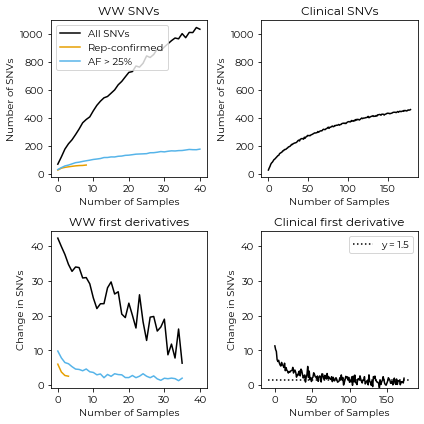

In [6]:
# plot wastewater versions
f, ax = plt.subplots(2,2,figsize=(6,6))

# ww plot & first derivative
[ax[0][0].plot(s.mean(axis=1), markersize=.2) \
 for i,s, in enumerate([snvs_ww_snvs, snvs_ww_rep_snvs, snvs_ww_snvs_AF25])]
w = 5
for i,s in enumerate([snvs_ww_snvs, snvs_ww_rep_snvs, snvs_ww_snvs_AF25]):    
    d1 = np.convolve(s.mean(axis=1)[1:]-s.mean(axis=1)[:-1], np.ones(w), 'valid') / w
    ax[1][0].plot(d1, markersize=.2)

# wastewater stylistic
ax[0][0].legend(['All SNVs', 'Rep-confirmed', 'AF > 25%'])   
ax[0][0].set_title('WW SNVs')
ax[1][0].set_title('WW first derivatives')
[ax[i][0].set_xlim([-2,42]) for i in range(2)]

# clinical consensus-level
s = snvs_snvs
ax[0][1].plot(s.mean(axis=1), 'k', markersize=.2)
d1 = np.convolve(s.mean(axis=1)[1:]-s.mean(axis=1)[:-1], np.ones(w), 'valid') / w
ax[1][1].plot(d1, 'k', markersize=.2)

# clinical stylistic
ax[1][1].set_ylim([0, ax[1][1].get_ylim()[1]])
ax[0][1].set_title('Clinical SNVs')
ax[1][1].set_title('Clinical first derivative')

[[ax[j][i].set_xlabel('Number of Samples') for i in range(2)] for j in range(2)]
[ax[0][i].set_ylabel('Number of SNVs') for i in range(2)]
[ax[1][i].set_ylabel('Change in SNVs') for i in range(2)]

# show that rate approaches 2
a = ax[1][1].plot(ax[1][1].get_xlim(), [1.5, 1.5], ':')
ax[1][1].legend(a, ['y = 1.5'])

# set equivalent ylims
[ax[i][1].set_ylim(ax[i][0].get_ylim()) for i in range(2)]

f.tight_layout()

file = 'fig/SUP_SNVs_per_sample.svg'
plt.savefig(file)
FileLink(file)

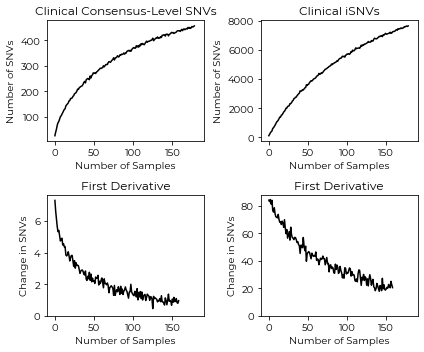

In [7]:
# plot derivatives for clinical (consensus-level & iSNVs)
f, ax = plt.subplots(2,2,figsize=(6,5))

w = 20 # moving window filter for first derivative
w2 = 50 # moving window filter for second derivative
for i,s in enumerate([snvs_snvs,snvs_isnvs]):
    # actual data
    ax[0][i].plot(s.mean(axis=1), 'k', markersize=.2)
    
    # first derivative
    d1 = np.convolve(s.mean(axis=1)[1:]-s.mean(axis=1)[:-1], np.ones(w), 'valid') / w
    ax[1][i].plot(d1, 'k', markersize=.2)
    ax[1][i].set_ylim([0, ax[1][i].get_ylim()[1]])
    
    # second derivative
    #d2 = np.convolve(d1[1:] - d1[:-1], np.ones(w2), 'valid') / w2
    #ax[2][i].plot(d2, 'k', markersize=.2)
    #ax[2][i].set_ylim([ax[2][i].get_ylim()[0], 0])
    
    [ax[j][i].set_xlim([-10,190]) for j in range(2)]
    [ax[j][i].set_xlabel('Number of Samples') for j in range(2)]
    ax[0][i].set_ylabel('Number of SNVs')
    ax[1][i].set_ylabel('Change in SNVs')


ax[0][0].set_title('Clinical Consensus-Level SNVs')
ax[0][1].set_title('Clinical iSNVs')
ax[1][0].set_title('First Derivative')
ax[1][1].set_title('First Derivative')

f.tight_layout()

# Lineages in wastewater: prelim, Freyja, B.1.429.1 zoom (fig 5; fig 6)

## Set up dictionaries to parse lineage-defining mutations

In [8]:
df_lineages = pd.read_csv('characteristic_nt_substitutions_tabular_2021-09-17.tsv', sep='\t', \
                          usecols=['lineage','gene','aa_sub','nt_sub'])

# fix a mistake in B.1.429.1
df_lineages['nt_sub'][5526]='G23593C'#'G23594T'

In [9]:
## create 2 dictionaries: dict_nt2lin & dict_lin2nt
# create a dictionary that ties from each nucleotide to which lineages would include it
dict_nt2lin = {k: [] for k in df_lineages.nt_sub.unique()}

# create a dictionary that ties from each lineage to which nucleotides are included
dict_lin2nt = {k: [] for k in df_lineages.lineage.unique()}

for i in range(len(df_lineages)):
    dict_nt2lin[df_lineages.nt_sub[i]].append(df_lineages.lineage[i])
    dict_lin2nt[df_lineages.lineage[i]].append(df_lineages.nt_sub[i])

In [10]:
# which lineages are completely not unique, and which more specific lineage might they be?: dict_lin2lin

# go from lineage, to its nt, to which lineages share all of those nts...
dict_lin2lin = {k: [] for k in dict_lin2nt.keys()}
for i, key in enumerate(dict_lin2lin.keys()):
    possible = []
    for n, nt in enumerate(dict_lin2nt[key]):
        if len(possible)==0:
            possible = set(dict_nt2lin[nt])
        else:
            possible = set(dict_nt2lin[nt]) & possible # intersection will progressively get smaller
    possible.remove(key) # remove self from list
    dict_lin2lin[key] = list(possible)
    
# update one of any set of 2 lineages that are equally defined, such that the link is made uni-directional
keys = list(dict_lin2lin.keys())
for i, k1 in enumerate(keys):
    for k2 in keys[i+1:]:
        if dict_lin2nt[k1] == dict_lin2nt[k2]:
            lins = set(dict_lin2lin[k1])
            lins.remove(k2)
            dict_lin2lin[k1] = list(lins)
            
# remove all keys with zero element
dict_lin2lin_no0 = dict_lin2lin.copy()
[dict_lin2lin_no0.pop(key, None) for key in [key for key in dict_lin2lin_no0.keys() \
                                             if len(dict_lin2lin_no0[key])==0]];

In [11]:
df_tmp = df_lineages.groupby('nt_sub',sort=False).count()
print(f'There are {len(df_tmp)} unique SNVs that help define lineages.')
print(f'Of these, {sum(df_tmp.lineage==1)} are present in only one lineage.')
print(f'There are {len(df_lineages.lineage.unique())} lineages, & {len(dict_lin2lin_no0)} are not unique')
#df_tmp.head(5)

There are 1572 unique SNVs that help define lineages.
Of these, 1041 are present in only one lineage.
There are 1358 lineages, & 466 are not unique


## Zoom into B.1.533 and B.1.350, as the two lineages that appear in wastewater but not in clinical

In [ ]:
# B.1.533 = sample CO_CMU_W0127
df = allel.vcf_to_dataframe('vcf/CO_CMU_W0127.align_to_ref.trimmed.vcf',\
                            fields=['POS','REF','ALT','DP','AF']).dropna(axis=1, how='all')
SNVs = [df.REF[i]+str(df.POS[i])+df.ALT_1[i] for i in range(len(df))]
print('B.1.533:      ', set(dict_lin2nt['B.1.533']))
print('Intersection: ', set(SNVs) & set(dict_lin2nt['B.1.533']))

In [ ]:
# B.1.350 = sample CO_CMU_W0031
df = allel.vcf_to_dataframe('vcf/CO_CMU_W0031.align_to_ref.trimmed.vcf',\
                            fields=['POS','REF','ALT','DP','AF']).dropna(axis=1, how='all')
SNVs = [df.REF[i]+str(df.POS[i])+df.ALT_1[i] for i in range(len(df))]
print('B.1.350:      ', set(dict_lin2nt['B.1.350']))
print('Intersection: ', set(SNVs) & set(dict_lin2nt['B.1.350']))

## Identify potential lineages in wastewater, using dictionaries

In [ ]:
### WITH THRESHOLDS! AF=.1, DP=100
# store in a separate df whether a given wastewater sample may contain vestiges of a given lineage
df_WW_lineages = pd.DataFrame(columns=snv_files, index=df_lineages.lineage.unique())
# to remove problematic sites (which shouldn't be defining for a lineage anyways... but to be safe)
df_prob = allel.vcf_to_dataframe('problematic_sites_sarsCov2.vcf', fields=['POS'])
# for each wastewater sample...
for ww in df_WW_lineages.columns:
    df = allel.vcf_to_dataframe(ww, fields=['POS','REF','ALT', 'DP', 'AF'])
    if df is not None:
        # remove problematic sites
        to_drop = np.concatenate([np.where(df.POS==df_prob.POS[i])[0] for i in range(len(df_prob))]).flat
        df = df.drop(to_drop, axis=0).reset_index()
        # pull out all SNVs
        SNVs = set([df.REF[i] + df.POS[i].astype('str') + df.ALT_1[i] for i in range(len(df)) if \
                   ((df.AF_1[i] > .25) & (df.DP[i] > 100))])
        # identify maximal set of possible lineages, using dict_nt2lin (i.e. at least 1 SNV from lineage)
        lineages = list(set(np.concatenate([dict_nt2lin[key] for key in SNVs if key in dict_nt2lin]).flat))
        # check for presence of all relevant SNVs of each lineage
        lineages = [l for l in lineages if len(set(dict_lin2nt[l]) & SNVs) == len(set(dict_lin2nt[l]))]
        # check remaining lineages for "overlap", i.e. remove lineage if later descendant lineage is present
        lineages = [l for l in lineages if len(set(dict_lin2lin[l]) & set(lineages)) == 0]
        # enter into df_WW_lineages
        df_WW_lineages[ww][lineages] = True
df_WW_lineages = df_WW_lineages.fillna(False)

# limit analysis to strains that do exist within the wastewater
df_WW_lineages = df_WW_lineages[df_WW_lineages.any(axis=1)]

# plot heatmap
f = plt.figure(figsize=[10,7])
sns.heatmap(df_WW_lineages, xticklabels=[re.search('W[0-9]{4}', x).group() for x in df_WW_lineages.columns], \
            yticklabels=df_WW_lineages.index, cbar=False)
plt.title('Which lineages might be present in wastewater samples');

In [ ]:
## Allowing for there to be mismatch between a lineage, i.e. one mutation can be missing
# store in a separate df whether a given wastewater sample may contain vestiges of a given lineage
df_WW_lineages = pd.DataFrame(columns=snv_files, index=df_lineages.lineage.unique())
# for each wastewater sample...
for ww in df_WW_lineages.columns:
    if ww != 'vcf/USA-CO-Broad_CMU-W0053-2021.align_to_ref.trimmed.vcf':
        # pull out all SNVs
        df = allel.vcf_to_dataframe(ww, fields=['POS','REF','ALT','DP','AF'])
        if df is not None:
            SNVs = set([df.REF[i] + df.POS[i].astype('str') + df.ALT_1[i] for i in range(len(df)) if \
                       ((df.AF_1[i] > .01) & (df.DP[i] > 320))])
            # identify maximal set of possible lineages, using dict_nt2lin (i.e. at least 1 SNV from lineage)
            lineages = list(set(np.concatenate([dict_nt2lin[key] for key in SNVs if key in dict_nt2lin]).flat))
            # check for presence of all relevant SNVs of each lineage
            lineages = [l for l in lineages if len(set(dict_lin2nt[l]) & SNVs) >= len(set(dict_lin2nt[l]))-1]
            # check remaining lineages for "overlap", i.e. remove lineage if later descendant lineage is present
            lineages = [l for l in lineages if len(set(dict_lin2lin[l]) & set(lineages)) == 0]
            # enter into df_WW_lineages
            df_WW_lineages[ww][lineages] = True
df_WW_lineages = df_WW_lineages.fillna(False)

# limit analysis to strains that do exist within the wastewater
df_WW_lineages = df_WW_lineages[df_WW_lineages.any(axis=1)]

# plot heatmap
f = plt.figure(figsize=[10,40])
sns.heatmap(df_WW_lineages, xticklabels=[re.search('W[0-9]{4}', x).group() for x in df_WW_lineages.columns], \
            yticklabels=df_WW_lineages.index)
plt.title('Which lineages might be present in wastewater samples');

## Identify potential lineages in wastewater, mutation by mutation for all wastewater samples

In [ ]:
def check_specific_lineage(lineage, snv_files, dict_lin2nt):
    # for each mutation of given lineage, & for each wastewater sample, show allele frequency in heatmap
    df_lin = pd.DataFrame(columns=snv_files, index=dict_lin2nt[lineage])
    # for each wastewater sample
    for ww in df_lin.columns:
        df = allel.vcf_to_dataframe(ww, fields=['POS','REF','ALT','AF'])
        if df is not None:
            # remove problematic sites
            #to_drop = np.concatenate([np.where(df.POS==df_prob.POS[i])[0] for i in range(len(df_prob))]).flat
            #df = df.drop(to_drop, axis=0).reset_index()
            # pull out all SNVs
            SNVs = df.REF + df.POS.astype('str') + df.ALT_1
            df_lin[ww][:] = [df.AF_1.loc[SNVs==s].values for s in df_lin.index]
            df_lin[ww][:] = [i[0] if len(i)>0 else 0 for i in df_lin[ww][:]]
    df_lin = df_lin.fillna(0)
            
    # plot heatmap
    f = plt.figure(figsize=[5,7])
    sns.heatmap(df_lin.transpose(), xticklabels=df_lin.index, \
                yticklabels=[re.search('W[0-9]{4}', y).group() for y in df_lin.columns])
    plt.title(f'Which mutations are present in which samples for lineage {lineage}');  

In [ ]:
check_specific_lineage('B.1.429.1', snv_files, dict_lin2nt)

## Set up relevant dataframes to parse Freyja results

In [4]:
## relevant data frames

# clinical metadata
df_meta = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df_meta.Test_day = [datetime.fromisoformat(d) for d in df_meta.Test_day]

# code to get new site names
df_code = pd.read_csv('1.4.22 CMU Compiled Data - WW to Hall Code.csv').rename(columns={'Buildings/Halls':'halls'})
dict_code = {}
for i in df_code['OLD Wastewater'].unique():
    dict_code[i] = df_code.Wastewater[df_code['OLD Wastewater'] == i].unique()[0]

# wastewater metadata
df_meta_ww = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
df_meta_ww.date_collect = [datetime.strptime(d, "%m/%d/%Y") for d in df_meta_ww.date_collect]
df_meta_ww.ID_ww = [df_code.Wastewater[df_code['OLD Wastewater'] == c].unique() for c in df_meta_ww.ID_ww]
df_meta_ww.ID_ww = [c[0] if len(c)>0 else pd.NA for c in df_meta_ww.ID_ww]

# freyja
df_freyja = pd.read_csv('aggregated_freyja_lineage_information_031422.tsv',sep='\t')
df_freyja['sample'] = ['CO_CMU_'+re.findall('W\d*',d)[0] for d in df_freyja['sample']]
df_freyja['dates'] = [df_meta_ww.date_collect[df_meta_ww['ID_broad'] == ww].values[0] for ww in df_freyja['sample']]

samples = !ls Freyja_bootstrap/* # add in bootstrap numbers from 5% quantile
df_freyja[['lineages_boot5','lineages_abundances_boot5']] = pd.NA, pd.NA
for i, s in enumerate(samples): # for each of the 40 available samples, show how dist changes over bootstrap...
    df = pd.read_csv(samples[i], index_col=0)
    loc = np.where(df_freyja['sample']=='CO_CMU_'+re.findall('W\d*',s)[0])[0]
    df_freyja.at[loc,'lineages_boot5'] = ','.join(df.columns)
    df_freyja.at[loc,'lineages_abundances_boot5'] = ','.join([str(d) for d in df[df.index==.05].values[0]])



In [5]:
# make df that's sample x lineage
lineages = sorted(list(set([i for sub in [l.split(",") for l in df_freyja.lineages.unique()] for i in sub])))
df_sample_lineage = pd.DataFrame(index=df_freyja['sample'], columns=lineages)
for i,s in enumerate(df_freyja['sample']): # per sample
    for j,l in enumerate(df_freyja['lineages'].loc[i].split(",")): # per lineage
        df_sample_lineage.at[s,l] = float((df_freyja['lineage_abundances'].loc[i].split(","))[j])

# slim down to just those lineages that are >3% prevalence in 5%-bootstrap-quantile of given sample
for i,s in enumerate(df_freyja['sample']): # per sample
    if isinstance(df_freyja['lineages_boot5'].loc[i],str):
        lins = [l for j,l in enumerate(df_freyja['lineages_boot5'].loc[i].split(","))\
               if float((df_freyja['lineages_abundances_boot5'].loc[i].split(","))[j]) >= .03] # per lineage
        for l in df_sample_lineage.columns:
            if l not in lins:
                df_sample_lineage.at[s,l] = pd.NA

# drop samples with lower than 30% genome coverage...
for s in df_meta_ww[df_meta_ww.coverage_percent < .30].ID_broad.values:
    if s in df_sample_lineage.index:
        df_sample_lineage = df_sample_lineage.drop(s, axis=0)

df_sample_lineage = df_sample_lineage.dropna(axis=1, how='all')

In [ ]:
df_sample_lineage.to_csv('tmp.csv')
FileLink('tmp.csv')

## Sanity check Freyja

In [32]:
# create df_ok dataframe for checking
df_ok = pd.DataFrame(columns=['Coverage','Main_Lineage','Percent_Lineage','SNVs','Missing_SNVs',\
                              'Num_Missing','Percent_Missing'], index=df_sample_lineage.index)
for ww in df_ok.index:
    df_ok.Coverage[ww] = df_meta_ww[df_meta_ww.ID_broad==ww].coverage_percent.values[0]
    
    d = allel.vcf_to_dataframe('vcf/'+ww+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT'])
    df_ok.SNVs[ww] = [set() if d is None else set(d.REF + d.POS.astype('str') + d.ALT_1) for d in [d]][0]
    
    if len(df_sample_lineage.loc[ww].dropna())==0:
        df_ok.Main_Lineage[ww], df_ok.Percent_Lineage[ww] = pd.NA, pd.NA
        df_ok.Missing_SNVs[ww], df_ok.Num_Missing[ww], df_ok.Percent_Missing[ww] = pd.NA, pd.NA, pd.NA
    else:
        df_ok.Main_Lineage[ww] = df_sample_lineage.columns[np.nanargmax(df_sample_lineage\
                                                                        .loc[ww].replace({pd.NA: np.nan}))]
        df_ok.Percent_Lineage[ww] = df_sample_lineage.loc[ww].max()
        df_ok.Missing_SNVs[ww] = set(dict_lin2nt[df_ok.Main_Lineage[ww]]) - df_ok.SNVs[ww]
        df_ok.Num_Missing[ww] = [len(set(dict_lin2nt[df_ok.Main_Lineage[ww]])), len(df_ok.Missing_SNVs[ww])]
        df_ok.Percent_Missing[ww] = df_ok.Num_Missing[ww][1] / df_ok.Num_Missing[ww][0] * 100

df_ok = df_ok.sort_values('Coverage', ascending=False)

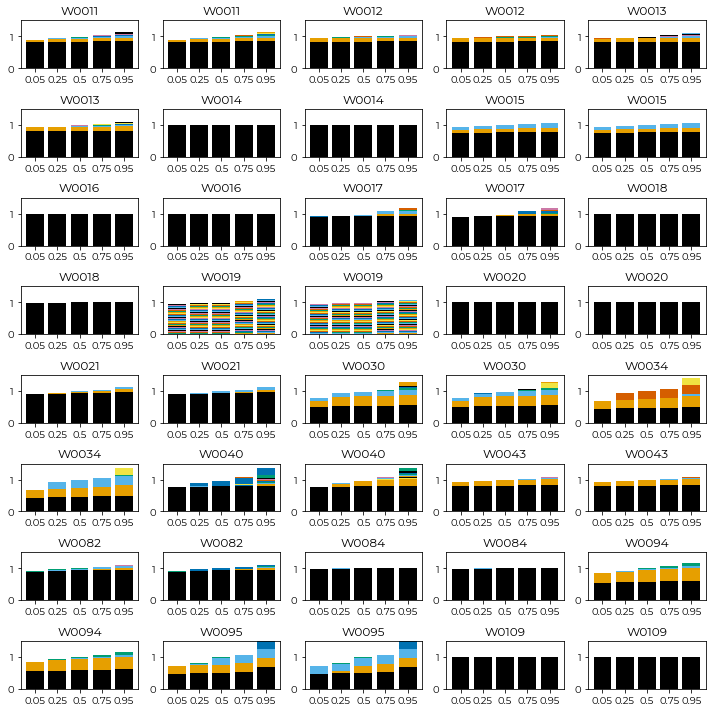

In [42]:
# let's look at the distribution at each bootstrap level for identified lineages across all samples
f, ax = plt.subplots(8,5,figsize=(10,10))
ax = ax.flatten()

samples = !ls Freyja_bootstrap/*
for i, a in enumerate(ax): # for each of the 40 available samples, show how dist changes over bootstrap...
    df = pd.read_csv(samples[i], index_col=0)
    for j, c in enumerate(df.columns): # go through all lineages
        a.bar([str(d) for d in df.index], df[c], bottom=df[df.columns[0:j]].sum(axis=1).values*(j!=0))
    a.set_ylim([0,1.5])
    a.set_title(re.findall('W\d*',samples[i])[0])
plt.tight_layout()

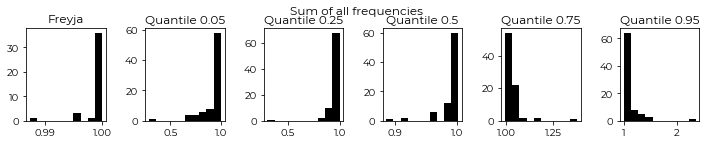

In [43]:
# distribution of sum of frequencies: compare freyja & compare bootstraps
f, ax = plt.subplots(1,6,figsize=(10,2))

ax[0].hist(np.array([sum([float(f) for f in l.split(',')]) for l in df_freyja.lineage_abundances]))
ax[0].set_title('Freyja')

samples = !ls Freyja_bootstrap/*
values = []
for i, s in enumerate(samples): # for each of the 40 available samples, show how dist changes over bootstrap...
    values.append(list(pd.read_csv(s, index_col=0).sum(axis=1).values))
plt.tight_layout()

for i, a in enumerate(ax[1:]):
    a.hist([values[j][i] for j in range(len(values))])
    a.set_title(f'Quantile {df.index[i]}')
    
plt.suptitle('Sum of all frequencies');

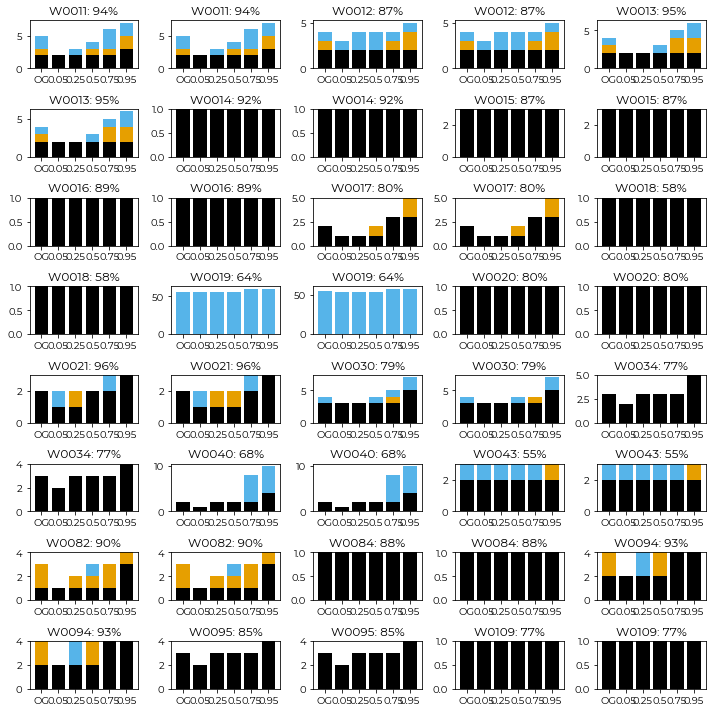

In [44]:
# how many lineages found if we cut off threshold at 1% v. 3% v. 5% at each quantile?

f, ax = plt.subplots(8,5,figsize=(10,10))
ax = ax.flatten()

# what did original output show?
freyja5, freyja3, freyja1 = [[sum([float(f)>=L for f in l.split(',')]) for l in df_freyja.lineage_abundances] \
                             for L in [.05, .03, .01]]

level5_quantile5 = []
# what does bootstrap show?
samples = !ls Freyja_bootstrap/*
for i, a in enumerate(ax): # for each of the 40 available samples, show relative # of samples
    # read in each sample & get # of lineages that would be kept via freyja bootstrap
    df = pd.read_csv(samples[i], index_col=0)
    level5, level3, level1 = [np.array([sum(df.loc[j].values>=l) for j in df.index]) for l in [.05, .03, .01]]
    level5_quantile5.append(level5[0])
    
    # how many lineages would be kept via freyja original output
    sam_name = re.findall("W\d*",samples[i])[0]
    f_loc = np.where([re.findall('W\d*',j)[0] == sam_name for j in df_freyja['sample']])[0][0]
    f5, f3, f1 = freyja5[f_loc], freyja3[f_loc], freyja1[f_loc]
    
    # plot
    a.bar(['OG'] + [str(d) for d in df.index], [f5]   +list(level5))
    a.bar(['OG'] + [str(d) for d in df.index], [f3-f5]+list(level3-level5), bottom=[f5]+list(level5))
    a.bar(['OG'] + [str(d) for d in df.index], [f1-f3]+list(level1-level3), bottom=[f3]+list(level3))
    seq_perc = df_meta_ww.coverage_percent[np.where([re.findall('W\d*',j)[0] == sam_name \
                                                     for j in df_meta_ww.ID_broad])[0]]
    a.set_title(f'{sam_name}: {int(seq_perc*100)}%')
plt.tight_layout()

## Peacock / B.1.429.1: # of samples with S:Q677H, and iSNV spread

In [41]:
count = 0
for i in df_ok.index:
    if 'G23593C' in df_ok.loc[i].SNVs:
        #print(df_sample_lineage['B.1.429.1'].loc[i])
        count+=1
print(f'{count} samples have the G23593C / S:Q677H mutation')

25 samples have the G23593C / S:Q677H mutation


In [49]:
# focus in on 4 weeks (Feb 15 to March 12)
df4 = df_freyja[df_freyja.dates >= datetime.strptime('2021-02-15','%Y-%m-%d')]
df4 = df4[df4.dates <= datetime.strptime('2021-03-12','%Y-%m-%d')]
print(f'# of ww samples in 4 week time span: {len(df4)}')
# how many have peacock at any abundance?
nPeacock = sum(["B.1.429.1" in d for d in df4.lineages])
print(f'# of peacock-containing samples: {nPeacock}')
# how many have peacock as majority lineage (i.e. first listed)
lin1st = np.array([d.split(',')[0] for d in df4.lineages])
nPeacock_first = sum(lin1st=="B.1.429.1")
print('# of peacock-majority samples (first listed): ', nPeacock_first)
# how many have peacock as the majority-lineage (i.e. greater than 50%)?
abu1st = np.array([float(d.split(',')[0]) for d in df4.lineage_abundances])
nPeacock_majority = sum(abu1st[lin1st=="B.1.429.1"] > 0.5)
print(f'# of peacock-majority samples (>50%): {nPeacock_majority}')
print(nPeacock_first/len(df4), nPeacock_majority/len(df4), nPeacock/len(df4))

# of ww samples in 4 week time span: 34
# of peacock-containing samples: 19
# of peacock-majority samples (first listed):  16
# of peacock-majority samples (>50%): 15
0.47058823529411764 0.4411764705882353 0.5588235294117647


In [ ]:
# go through each wastewater sample
AFs_His = []
AFs_Pro = []
#mut = []
for j, s in enumerate(snv_aa_files):
    df = allel.vcf_to_dataframe(s, fields=['POS','REF','ALT','QUAL','DP','AF','ANN'])
    
    if df is not None:
        # pull out relevant info for amino acid mutation
        df['pos'] = [re.findall('\d+',df.ANN[i].split('|')[-6]) for i in range(len(df))]
        df['pos'] = [d[0] if len(d) > 0 else '' for d in df.pos]
        df['gene'] = [df.ANN[i].split('|')[3] for i in range(len(df))]
        df['mut'] = [df.ANN[i].split('|')[-6] for i in range(len(df))]
        
        # isolate just S:Q677x
        df = df.drop(np.where([d!='677' for d in df.pos])[0])
        df = df.drop(np.where([d!='S' for d in df.gene])[0])
        print(df)
        if len(df)>1:
            AFs_His.append(df.iloc[np.where(['His' in d for d in df.mut])[0][0]].AF_1)
            AFs_Pro.append(df.iloc[np.where(['Pro' in d for d in df.mut])[0][0]].AF_1)
        elif len(df)==1:
            AFs_His.append(list(df.AF_1)[0]*('His' in df.mut))
            AFs_Pro.append(list(df.AF_1)[0]*('Pro' in df.mut))
        else:
            AFs_His.append(0)
            AFs_Pro.append(0)

In [ ]:
# go through each clinical sample
count = 0
for j, s in enumerate(snv_aa_individual):
    df = allel.vcf_to_dataframe(s, fields=['POS','REF','ALT','QUAL','DP','AF','ANN'])
    
    if df is not None:
        # pull out relevant info for amino acid mutation
        df['pos'] = [re.findall('\d+',df.ANN[i].split('|')[-6]) for i in range(len(df))]
        df['pos'] = [d[0] if len(d) > 0 else '' for d in df.pos]
        df['gene'] = [df.ANN[i].split('|')[3] for i in range(len(df))]
        df['mut'] = [df.ANN[i].split('|')[-6] for i in range(len(df))]
        
        # isolate just S:Q677x
        df = df.drop(np.where([d!='677' for d in df.pos])[0])
        df = df.drop(np.where([d!='S' for d in df.gene])[0])
        for i in range(len(df)):
            if df.mut.iloc[i] != 'p.Gln677His':
                count += 1
                print(s, df.AF_1.iloc[i], df.mut.iloc[i])
print('\n', count)

In [148]:
df_meta = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df_peacock = df_meta[df_meta.pango_lineage == 'B.1.429.1']

In [149]:
# for all peacock individuals, find corresponding vcf file
peacocks = [re.findall('\d{5}',d)[0] for d in list(df_peacock.Sequence_ID)]
peacocks_files,to_remove = [],[]
for i,p in enumerate(peacocks):
    loc = np.where([p in s for s in snv_individual])[0]
    if len(loc)!=0:
        peacocks_files.append(snv_individual[loc[0]])
    else:
        to_remove.append(p)
[peacocks.remove(i) for i in to_remove];

# pull out all SNVs and iSNVs for each individual
dict_snvs, dict_isnvs = dict(), dict()
for i,p in enumerate(peacocks_files):
    df = allel.vcf_to_dataframe(p, fields=['POS','REF','ALT','AF']).dropna(axis=1, how='all')
    df = df[df.AF_1>=.03].reset_index()
    SNVS = [df.REF[i]+str(df.POS[i])+df.ALT_1[i] for i in range(len(df))]
    dict_snvs[peacocks[i]] = [s for i,s in enumerate(SNVS) if df.AF_1[i]>=.5]
    dict_isnvs[peacocks[i]] = [s for i,s in enumerate(SNVS) if df.AF_1[i]<.5]

# which pairs have an iSNV present at consensus-level for someone else?
print('consensus-level')
for i,p in enumerate(peacocks): # for each individual...
    for j in range(len(peacocks)): # compare against all others...
        if i!=j:
            for s in dict_isnvs[p]: # look at each iSNV in first individual...
                if s in dict_snvs[peacocks[j]]: # and if it's at consensus-level elsewhere...
                    print('goes from person',p,'(isnv) then to',peacocks[j],'(snv), isnv/snv is',s)

consensus-level
goes from person 00217 (isnv) then to 00195 (snv), isnv/snv is C10615T
goes from person 00217 (isnv) then to 00200 (snv), isnv/snv is C10615T
goes from person 00286 (isnv) then to 00289 (snv), isnv/snv is A7990G
goes from person 00286 (isnv) then to 00290 (snv), isnv/snv is A7990G
goes from person 00286 (isnv) then to 00291 (snv), isnv/snv is A7990G
goes from person 00286 (isnv) then to 00296 (snv), isnv/snv is A7990G


In [150]:
# which pairs have an iSNV present as an iSNV for someone else?
print('intrahost')
for i,p in enumerate(peacocks): # for each individual...
    for j in range(len(peacocks)): # compare against all others...
        if i!=j:
            for s in dict_isnvs[p]: # look at each iSNV in first individual...
                if s in dict_isnvs[peacocks[j]]: # and if it's an iSNV elsewhere...
                    print(p,peacocks[j],s)

intrahost
00195 00194 T5260A
00195 00200 T5260A
00195 00217 T5260A
00195 00294 T5260A
00194 00195 T5260A
00194 00200 T5260A
00194 00217 T5260A
00194 00294 T5260A
00200 00195 T5260A
00200 00194 T5260A
00200 00217 T5260A
00200 00294 T5260A
00212 00220 A21650C
00212 00289 A21650C
00212 00290 A21650C
00212 00291 A21650C
00218 00245 G12419T
00218 00269 C29091T
00217 00195 T5260A
00217 00194 T5260A
00217 00200 T5260A
00217 00294 T5260A
00220 00212 A21650C
00220 00289 A21650C
00220 00290 A21650C
00220 00291 A21650C
00288 00286 G19086T
00226 00236 G20596T
00226 00239 G20596T
00226 00241 G20596T
00226 00244 G20596T
00226 00269 G20596T
00226 00283 G20596T
00226 00290 G20596T
00226 00291 G20596T
00222 00236 C29274T
00231 00245 G19582T
00236 00226 G20596T
00236 00222 C29274T
00236 00239 G20596T
00236 00241 G20596T
00236 00244 G20596T
00236 00244 C24213T
00236 00269 G20596T
00236 00283 G20596T
00236 00290 C635T
00236 00290 G20596T
00236 00291 G20596T
00232 00272 G7889T
00239 00226 G20596T
00239 002

## Analyzing the lineages & where they are, when

In [51]:
# how many lineages are detected clinically? wastewater? in common?
lin_ww = sorted(list(df_sample_lineage.columns))
lin_cl = sorted([x for x in df_meta.pango_lineage.unique() if (str(x)!='nan' and x!='None')])
lin_shared = sorted(list(set(lin_cl) & set(lin_ww)))

print(f'Total: There were {len(lin_cl)} clinical lineages, {len(lin_ww)} wastewater lineages,' + \
      f' and {len(lin_shared)} lineages in common')
print(f'The lineages in common were: {lin_shared}')

lin_cl_6weeks = df_meta[(df_meta.Test_day >= datetime.strptime("2021-02-09","%Y-%m-%d")) & \
                        (df_meta.Test_day <= datetime.strptime("2021-03-20","%Y-%m-%d"))]
lin_cl_6weeks = lin_cl_6weeks.pango_lineage.dropna().unique()
lin_shared_6weeks = list(set(lin_cl_6weeks) & set(lin_ww))

print(f'6 epi-weeks: There were {len(lin_cl_6weeks)} clinical lineages, {len(lin_ww)} wastewater lineages,' + \
      f' and {len(lin_shared_6weeks)} lineages in common')
print(f'The lineages in common were: {lin_shared_6weeks}')
print(f'The lineages never shared were: {set(lin_ww)-set(lin_shared)}')

Total: There were 20 clinical lineages, 8 wastewater lineages, and 6 lineages in common
The lineages in common were: ['B.1.1.519', 'B.1.126', 'B.1.2', 'B.1.234', 'B.1.429', 'B.1.429.1']
6 epi-weeks: There were 8 clinical lineages, 8 wastewater lineages, and 3 lineages in common
The lineages in common were: ['B.1.126', 'B.1.429.1', 'B.1.2']
The lineages never shared were: {'B.1.350', 'B.1.533'}


In [52]:
# dates of each wastewater site

# what was earliest date of each known clinical lineage?
dict_ww_LineageDate = dict()
for l in lin_ww:
    dict_ww_LineageDate[l] = min([df_freyja['dates'][df_freyja['sample']==s].values[0] \
                                  for s in df_sample_lineage[l].dropna().index])

# what was earliest date of each known wastewater lineage?
dict_cl_LineageDate = dict()
for l in lin_cl:
    dict_cl_LineageDate[l] = min(df_meta['Test_day'][df_meta['pango_lineage']==l].values)

# for each shared lineage, what were comparable dates?
earliest = ['WW' if dict_ww_LineageDate[l] < dict_cl_LineageDate[l] else 'CL' for l in lin_shared]
[print(f'Lineage: {l}, WW: {dict_ww_LineageDate[l]}, CL: {dict_cl_LineageDate[l]}, earliest: {earliest[lin_shared==l]}') \
 for l in lin_shared];

Lineage: B.1.1.519, WW: 2021-03-16T00:00:00.000000000, CL: 2021-01-29T00:00:00.000000000, earliest: CL
Lineage: B.1.126, WW: 2021-02-16T00:00:00.000000000, CL: 2021-02-15T00:00:00.000000000, earliest: CL
Lineage: B.1.2, WW: 2021-02-11T00:00:00.000000000, CL: 2020-10-30T00:00:00.000000000, earliest: CL
Lineage: B.1.234, WW: 2021-02-11T00:00:00.000000000, CL: 2021-02-02T00:00:00.000000000, earliest: CL
Lineage: B.1.429, WW: 2021-02-16T00:00:00.000000000, CL: 2021-01-18T00:00:00.000000000, earliest: CL
Lineage: B.1.429.1, WW: 2021-02-11T00:00:00.000000000, CL: 2021-01-27T00:00:00.000000000, earliest: CL


In [55]:
print('The two samples that were not seen clinically... which samples are they in, and at what abundance?\n')
for s in set(lin_ww)-set(lin_shared):
    print(df_sample_lineage[s].dropna())

The two samples that were not seen clinically... which samples are they in, and at what abundance?

sample
CO_CMU_W0031    0.034576
Name: B.1.350, dtype: object
sample
CO_CMU_W0127    0.073736
Name: B.1.533, dtype: object


## Look for individual storyline... (fig 6)

### df_relevant set up

In [56]:
# limit to 5 sites (2,3,4,10,11) which are just residential with no upstream -- compare wastewater v. clinical
sites = ['Site ' + str(n) for n in [2,3,4,10,11]]
df_relevant = df_meta_ww.dropna(subset=['ID_ww','date_sequenced']).reset_index(drop=True)
todrop = np.where([df_relevant.ID_ww[i] not in sites for i in range(len(df_relevant))])[0]
df_relevant = df_relevant.drop(todrop).reset_index(drop=True)
#df_relevant.head(2)

In [57]:
# add in lineages that were found clinically
df_relevant['lineages_cl'] = [[] for i in range(len(df_relevant))]
df_relevant['num_cl'] = [[] for i in range(len(df_relevant))]
df_relevant['num_cl_TOTAL'] = [[] for i in range(len(df_relevant))]
df_relevant['ID_cl'] = [[] for i in range(len(df_relevant))]

for i in range(len(df_relevant)):
    # limit to relevant halls
    halls = df_code.halls[df_code.Wastewater == df_relevant.ID_ww[i]].values
    df_tmp = df_meta.dropna(subset=['Residence_hall']).reset_index(drop=True)
    todrop = np.where([df_tmp.Residence_hall[j] not in halls for j in range(len(df_tmp))])[0]
    df_tmp = df_tmp.drop(todrop).reset_index(drop=True)
    
    # how many total clinical cases were there in those halls in time range
    date = df_relevant.date_collect[i]
    df_relevant['num_cl_TOTAL'].loc[i] = sum([(df_tmp.Test_day[j]<=date+timedelta(days=7)) & \
                                       (df_tmp.Test_day[j]>=date-timedelta(days=7)) for j in range(len(df_tmp))])
    
    # how many total sequenced clinical cases were there in those halls in time range
    df_tmp = df_tmp.dropna(subset=['pango_lineage']).reset_index(drop=True)
    locs = [(df_tmp.Test_day[j]<=date+timedelta(days=7)) & (df_tmp.Test_day[j]>=date-timedelta(days=7)) \
            for j in range(len(df_tmp))]
    df_relevant['num_cl'].loc[i] = sum(locs)
    df_relevant['ID_cl'].loc[i] = list(df_tmp.Sequence_ID[list(np.where(locs)[0])])
    
    # which lineages are known
    tokeep = np.where([(df_tmp.Test_day[j]<=date+timedelta(days=4)) & (df_tmp.Test_day[j]>=date-timedelta(days=7))\
                       for j in range(len(df_tmp))])[0]
    df_tmp = df_tmp.iloc[tokeep].reset_index(drop=True)
    df_relevant['lineages_cl'].loc[i] = df_tmp.pango_lineage.unique()
    
# add in lineages that were found in wastewater
df_relevant['lineages_ww'] = [[] for i in range(len(df_relevant))]
for i in range(len(df_relevant)):
    if df_relevant.ID_broad[i] in df_sample_lineage.index:
        lins = df_sample_lineage.loc[df_relevant.ID_broad[i]].dropna()
        df_relevant['lineages_ww'].loc[i] = list(lins.index[lins.values>.05])

df_relevant = df_relevant.sort_values('coverage_percent', ascending=False)

/home/jupyter/packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
#df_relevant[['ID_broad','ID_ww','date_collect','coverage_percent','numSNVs','lineages_cl','lineages_ww',\
#             'num_cl','num_cl_TOTAL']].sort_values(by=['ID_ww','date_collect'])

### focus in on B.1.429.1 (fig 6)

In [59]:
df_peacock = df_relevant[[['B.1.429.1'] == d for d in df_relevant.lineages_ww]]
df_peacock = df_peacock[['B.1.429.1' in d for d in df_peacock.lineages_cl]].reset_index(drop=True)

In [60]:
def plot_WW_CL_peacock(df_peacock, df_meta):
    # wastewater & clinical samples (only select clinical with relevant lineage)
    ww = list(df_peacock.ID_broad)
    cl = list(set([item for sublist in df_peacock.ID_cl for item in sublist]))
    
    # pull out vcf files for each wastewater sample & determine which SNVs to include (>25% for at least one)
    SNVs, POSs, AFs = [], [], []
    for w in ww:
        df_ww = allel.vcf_to_dataframe('vcf/'+w+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT','AF'])
        SNVs += [df_ww.REF.loc[i]+str(df_ww.POS.loc[i])+df_ww.ALT_1.loc[i] for i in range(len(df_ww))]
        POSs += [df_ww.POS.loc[i] for i in range(len(df_ww))]
        AFs += [df_ww.AF_1.loc[i] for i in range(len(df_ww))]
    SNVs = [SNVs[i] for i in range(len(SNVs)) if AFs[i] >= .25]
    POSs = [POSs[i] for i in range(len(SNVs)) if AFs[i] >= .25]
    tmp = np.array(SNVs)[np.argsort(POSs)]
    SNVs = []
    [SNVs.append(x) for x in tmp if x not in SNVs]

    # initialize heatmap with wastewater - index is sample name, columns are SNVs in wastewater
    df = pd.DataFrame(columns=SNVs)
    for w in ww:
        df_ww = allel.vcf_to_dataframe('vcf/'+w+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT','AF'])
        SNV = [df_ww.REF.loc[i]+str(df_ww.POS.loc[i])+df_ww.ALT_1.loc[i] for i in range(len(df_ww))]
        AF = [df_ww.AF_1.loc[i] for i in range(len(df_ww))]
        loc = re.findall('W\d+',w)[0] + ' , ' + \
            list(df_peacock[df_peacock.ID_broad==w].date_collect)[0].strftime("%Y-%m-%d")
        df.loc[loc] = [pd.NA for s in SNVs]
        for i, s in enumerate(SNV):
            if s in SNVs:
                df.at[loc,s] = AF[i]
                
    # add in clinical
    df_meta = df_meta.dropna(subset=['Sequence_ID']).reset_index(drop=True)
    for c in cl:
        df_cl = allel.vcf_to_dataframe('vcf/'+c.replace('/','-')+'.align_to_ref.trimmed.vcf', \
                                       fields=['POS','REF','ALT','AF'])
        SNVs_cl = [df_cl.REF.loc[i]+str(df_cl.POS.loc[i])+df_cl.ALT_1.loc[i] for i in range(len(df_cl))]
        perc_SNVs = int(len(set(SNVs)&set(SNVs_cl))/sum(df_cl.AF_1>.5)*100)
        num = str(int(re.findall('\d+',c)[0]))
        loc = 'Sample '+num + ' , ' + \
            df_meta.Test_day[np.where([num in d for d in df_meta.Sequence_ID])[0][0]].strftime("%Y-%m-%d")
        df.loc[loc] = [pd.NA for s in SNVs]
        for s in SNVs:
            if s in SNVs_cl:
                df.at[loc,s] = df_cl[np.array(SNVs_cl)==s].AF_1.values[0]
    
    return df.reindex(index=df.index[::-1]).astype(float), SNVs
    
    f = plt.figure(figsize=(10,2))
    df = df.reindex(index=df.index[::-1]).astype(float)
    sns.heatmap(df,linewidths=1, linecolor='white', cmap=sns.cm.rocket_r, xticklabels=SNVs, \
                cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1);
    #ax.set_title(f'Concordance of lineage: {df_relevant.lineages_cl.loc[n][0]}\n')

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/Peacock_WW.svg

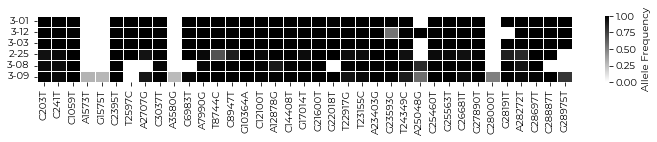

In [61]:
df, SNVs = plot_WW_CL_peacock(df_peacock, df_meta)

f = plt.figure(figsize=(10,2))
ax = sns.heatmap(df.iloc[[1,2,0,4,3,5]],linewidths=1, linecolor='white', cmap='gist_gray_r', xticklabels=SNVs, \
            cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1);
labels = [ax.get_yticklabels()[i].get_text()[-4:] for i in range(len(ax.get_yticklabels()))]
ax.set_yticklabels(labels)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,.25,.5,.75,1])
    
f.tight_layout()

file = 'fig/Peacock_WW.svg'
plt.savefig(file)
FileLink(file)


### B.1.126 - only one known clinical case, and one known wastewater sample

In [64]:
df_freyja[['B.1.126' in df_freyja.lineages[i] for i in range(len(df_freyja))]]

,sample,summarized_lineages,lineages,lineage_abundances,dates,lineages_boot5,lineages_abundances_boot5
3,CO_CMU_W0014,"Other,1.0000000000020066","B.1.126,B.1.14,B","0.997941,0.0010295,0.0010295",2021-02-16,"B.1.126,B.1.14,B","0.9961850262453636,0.0,0.0"


In [65]:
df_meta[['B.1.126' == df_meta.pango_lineage[i] for i in range(len(df_meta))]]

,barcode,Sequence_ID,test,Mavily,Sports_team,Additional_Sports_team,Lives_on_campus,Residence_hall,Sex,Class_Year,...,Faculty_or_Staff?,tested_days_after_symptoms,pango_lineage_OLD,pango_lineage,sample_Ct,assembly_fasta,assembly_length,GenBank_accession,Test_day,Test_day_of_week
1215,PBGSRV9T1,USA/CO-Broad_WarriorLab-00267/2021,pcr_warrior,NaN,NaN,NaN,No,NaN,M,Year C,...,No,NaN,B.1.126,B.1.126,17.715,gs://fc-76ab7e42-a2cf-4e95-b1c2-7a64874c9849/b...,29143.0,MW749914,2021-02-15,Monday


In [66]:
def plot_WW_CL_b1126(clin_sample, ww_sample):
    # pull out vcf files for wastewater sample
    df_ww = allel.vcf_to_dataframe('vcf/'+ww_sample+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT','AF'])
    SNV_w = np.array([df_ww.REF.loc[i]+str(df_ww.POS.loc[i])+df_ww.ALT_1.loc[i] for i in range(len(df_ww))])
    POS_w = np.array([df_ww.POS.loc[i] for i in range(len(df_ww))])
    AF_w = np.array([df_ww.AF_1.loc[i] for i in range(len(df_ww))])
    
    # pull out vcf file for clinical sample
    df_cl = allel.vcf_to_dataframe('vcf/'+clin_sample.replace('/','-')+'.align_to_ref.trimmed.vcf', \
                                    fields=['POS','REF','ALT','AF'])
    SNV_c = np.array([df_cl.REF.loc[i]+str(df_cl.POS.loc[i])+df_cl.ALT_1.loc[i] for i in range(len(df_cl))])
    POS_c = np.array([df_cl.POS.loc[i] for i in range(len(df_cl))])
    AF_c = np.array([df_cl.AF_1.loc[i] for i in range(len(df_cl))])

    # make list of SNVs that includes all unique SNVs
    POS = list(set(POS_c) | set(POS_w))
    SNV = [SNV_w[POS_w==p][0] if p in POS_w else SNV_c[POS_c==p][0] for p in POS]
    
    # initialize heatmap with wastewater - index is sample name, columns are SNVs in wastewater
    df = pd.DataFrame(columns=SNV)
    df.loc[ww_sample] = [pd.NA for s in SNV]
    df.loc[clin_sample] = [pd.NA for s in SNV]
    for s in SNV:
        if s in SNV_w:
            df.at[ww_sample,s] = AF_w[SNV_w==s]
        if s in SNV_c:
            df.at[clin_sample,s] = AF_c[SNV_c==s]
        
    return df.reindex(index=df.index[::-1]).astype(float), SNV

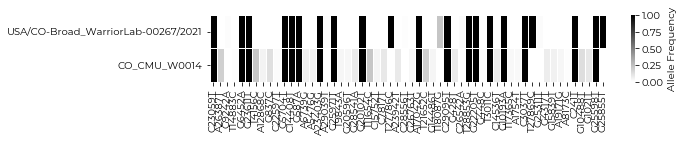

In [67]:
df, SNVs = plot_WW_CL_b1126('USA/CO-Broad_WarriorLab-00267/2021','CO_CMU_W0014')

f = plt.figure(figsize=(10,2))
ax = sns.heatmap(df,linewidths=1, linecolor='white', cmap='gist_gray_r', xticklabels=SNVs, \
            cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1);
#labels = [ax.get_yticklabels()[i].get_text()[-4:] for i in range(len(ax.get_yticklabels()))]
#ax.set_yticklabels(labels)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,.25,.5,.75,1])
    
f.tight_layout()

### old

#### "non-clean" samples (i.e. multiples in wastewater) v. clinical with one lineage

In [ ]:
# present in WW but not clean
df_relevant[['ID_broad','ID_ww','date_collect','coverage_percent','numSNVs',\
             'lineages_cl','lineages_ww','num_cl','ID_cl']].loc[[15,6]]
## NOTE: these two both have replicates available...

In [ ]:
def plot_WW_CL_comp_CLlin(n, df_relevant, df_meta):
    # wastewater & clinical samples (only select clinical with relevant lineage)
    ww = df_relevant.ID_broad.loc[n]
    cl = df_relevant.ID_cl.loc[n]

    # pull out vcf files for each one & make heatmap based off of it
    df_ww = allel.vcf_to_dataframe('vcf/'+ww+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT','AF'])
    SNVs = [df_ww.REF.loc[i]+str(df_ww.POS.loc[i])+df_ww.ALT_1.loc[i] for i in range(len(df_ww))]
    AFs = [df_ww.AF_1.loc[i] for i in range(len(df_ww))]
    SNVs = [SNVs[i] for i in range(len(SNVs)) if AFs[i] >= .25]
    AFs = np.array(AFs)[np.array(AFs) >= .25]

    # initialize heatmap with wastewater - index is sample name, columns are SNVs in wastewater
    df = pd.DataFrame(columns=SNVs)
    df.loc[re.findall('W\d+',ww)[0]] = AFs
    
    # add in clinical
    for c in cl:
        df_cl = allel.vcf_to_dataframe('vcf/'+c.replace('/','-')+'.align_to_ref.trimmed.vcf', \
                                       fields=['POS','REF','ALT','AF'])
        SNVs_cl = [df_cl.REF.loc[i]+str(df_cl.POS.loc[i])+df_cl.ALT_1.loc[i] for i in range(len(df_cl))]
        perc_SNVs = int(len(set(SNVs)&set(SNVs_cl))/sum(df_cl.AF_1>.5)*100)
        loc = 'Sample '+str(int(re.findall('\d+',c)[0]))+'\n'+str(perc_SNVs)+'% overlap'
        df.loc[loc] = [pd.NA for s in SNVs]
        for s in SNVs:
            if s in SNVs_cl:
                df[s].loc[loc] = df_cl[np.array(SNVs_cl)==s].AF_1.values

    f = plt.figure(figsize=(10,2))
    df = df.reindex(index=df.index[::-1])
    sns.heatmap(df,linewidths=1, linecolor='white', cmap=sns.cm.rocket_r, xticklabels=SNVs, \
                cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1);
    plt.title(f'Concordance of lineage: {df_relevant.lineages_cl.loc[n][0]}\n')

In [ ]:
plot_WW_CL_comp_CLlin(6, df_relevant, df_meta)

In [ ]:
plot_WW_CL_comp_CLlin(15, df_relevant, df_meta)

#### "clean" samples (i.e. one in wastewater) v. individuals with that lineage

In [ ]:
# clean
df_relevant[['ID_broad','ID_ww','date_collect','coverage_percent','numSNVs',\
             'lineages_cl','lineages_ww','num_cl','ID_cl']].loc[[3,17,13,16]]

In [ ]:
def plot_WW_CL_comp(n, df_relevant, df_meta):
    # wastewater & clinical samples (only select clinical with relevant lineage)
    ww = df_relevant.ID_broad.loc[n]
    cl = [l for l in df_relevant.ID_cl.loc[n] \
          if df_meta[df_meta.Sequence_ID==l].pango_lineage.values==df_relevant.lineages_ww.loc[n][0]]

    # pull out vcf files for each one & make heatmap based off of it
    df_ww = allel.vcf_to_dataframe('vcf/'+ww+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT','AF'])
    SNVs = [df_ww.REF.loc[i]+str(df_ww.POS.loc[i])+df_ww.ALT_1.loc[i] for i in range(len(df_ww))]
    AFs = [df_ww.AF_1.loc[i] for i in range(len(df_ww))]
    SNVs = [SNVs[i] for i in range(len(SNVs)) if AFs[i] >= .25]
    AFs = np.array(AFs)[np.array(AFs) >= .25]

    # initialize heatmap with wastewater - index is sample name, columns are SNVs in wastewater
    df = pd.DataFrame(columns=SNVs)
    df.loc[re.findall('W\d+',ww)[0]] = AFs

    # add in clinical
    for c in cl:
        df_cl = allel.vcf_to_dataframe('vcf/'+c.replace('/','-')+'.align_to_ref.trimmed.vcf', \
                                       fields=['POS','REF','ALT','AF'])
        SNVs_cl = [df_cl.REF.loc[i]+str(df_cl.POS.loc[i])+df_cl.ALT_1.loc[i] for i in range(len(df_cl))]
        perc_SNVs = int(len(set(SNVs)&set(SNVs_cl))/sum(df_cl.AF_1>.5)*100)
        loc = 'Sample '+str(int(re.findall('\d+',c)[0]))+'\n'+str(perc_SNVs)+'% overlap'
        df.loc[loc] = [pd.NA for s in SNVs]
        for s in SNVs:
            if s in SNVs_cl:
                df[s].loc[loc] = df_cl[np.array(SNVs_cl)==s].AF_1.values

    f = plt.figure(figsize=(10,2))
    df = df.reindex(index=df.index[::-1])
    sns.heatmap(df,linewidths=1, linecolor='white', cmap=sns.cm.rocket_r, xticklabels=SNVs, \
                cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1);
    plt.title(f'Concordance of lineage: {df_relevant.lineages_ww.loc[n][0]}\n')

In [ ]:
plot_WW_CL_comp(3, df_relevant, df_meta)

In [ ]:
plot_WW_CL_comp(17, df_relevant, df_meta)

In [ ]:
plot_WW_CL_comp(13, df_relevant, df_meta)

In [ ]:
plot_WW_CL_comp(16, df_relevant, df_meta)

#### for each sample, compare all individuals in that time frame & dorm

In [ ]:
## create version of function that takes all sequenced individuals in time frame & dorm, compared to wastewater
# maybe also add dates & sort clinical by date?
# and for the x axis, add in annotation that shows which gene the SNVs are in

In [ ]:
def plot_WW_CL_comp_AllClinical(n, df_relevant, df_meta, ax=[]):
    # wastewater & clinical samples
    ww = df_relevant.ID_broad.loc[n]
    cl = [l for l in df_relevant.ID_cl.loc[n]]

    # pull out vcf files for each one & make heatmap based off of it
    df_ww = allel.vcf_to_dataframe('vcf/'+ww+'.align_to_ref.trimmed.vcf', fields=['POS','REF','ALT','AF'])
    SNVs = [df_ww.REF.loc[i]+str(df_ww.POS.loc[i])+df_ww.ALT_1.loc[i] for i in range(len(df_ww))]
    AFs = [df_ww.AF_1.loc[i] for i in range(len(df_ww))]
    SNVs = [SNVs[i] for i in range(len(SNVs)) if AFs[i] >= .25]
    AFs = np.array(AFs)[np.array(AFs) >= .25]

    # initialize heatmap with wastewater - index is sample name, columns are SNVs in wastewater
    df = pd.DataFrame(columns=SNVs)
    df.loc[re.findall('W\d+',ww)[0]] = AFs

    # add in clinical
    for c in cl:
        df_cl = allel.vcf_to_dataframe('vcf/'+c.replace('/','-')+'.align_to_ref.trimmed.vcf', \
                                       fields=['POS','REF','ALT','AF'])
        SNVs_cl = [df_cl.REF.loc[i]+str(df_cl.POS.loc[i])+df_cl.ALT_1.loc[i] for i in range(len(df_cl))]
        perc_SNVs = int(len(set(SNVs)&set(SNVs_cl))/sum(df_cl.AF_1>.5)*100)
        loc = 'Sample '+str(int(re.findall('\d+',c)[0]))+'\n'+str(perc_SNVs)+'% overlap'
        df.loc[loc] = [pd.NA for s in SNVs]
        for s in SNVs:
            if s in SNVs_cl:
                df[s].loc[loc] = df_cl[np.array(SNVs_cl)==s].AF_1.values

    f = plt.figure(figsize=(10,2))
    df = df.reindex(index=df.index[::-1])
    ylabel = 'Sample '+ re.findall("W\d+",df_relevant.ID_broad[n])[0]
    if type(ax) == list:
        sns.heatmap(df,linewidths=1, linecolor='white', cmap=sns.cm.rocket_r, xticklabels=SNVs, \
                    cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1);
        plt.ylabel(ylabel);
    else:
        sns.heatmap(df,linewidths=1, linecolor='white', cmap=sns.cm.rocket_r, xticklabels=SNVs, \
                    cbar_kws={'label': 'Allele Frequency'}, vmin=0, vmax=1, ax=ax);
        ax.set_ylabel(ylabel);

In [ ]:
# plot
samples = [df_relevant.index[i] for i in range(len(df_relevant)) if (len(df_relevant.lineages_cl.iloc[i]) > 0) \
           and (len(df_relevant.lineages_ww.iloc[i]) > 0) and (df_relevant.lineages_ww.iloc[i] != ['B.1.429.1'])]

f, ax = plt.subplots(len(samples),1,figsize=(8,6))
for i, n in enumerate(samples):
    plot_WW_CL_comp_AllClinical(n, df_relevant, df_meta, ax=ax[i])
plt.tight_layout();

## Lineages detected in clinical v. wastewater per epi-week (fig 5)

In [69]:
# create matrix of lin_ww v. epi_weeks, 0 = neither, 1 = clinical, 2 = wastewater, 3 = both
lin_ww = sorted(list(df_sample_lineage.columns))
lin_cl = sorted([x for x in df_meta.pango_lineage.unique() if (str(x)!='nan' and x!='None')])
epi_weeks = [datetime.strptime('2021-02-07', '%Y-%m-%d') + timedelta(weeks=d) for d in range(6)]

# new df_freyja with same # of samples as df_sample_lineage
df_freyja2 = df_freyja.copy().set_index('sample')
df_freyja2 = df_freyja2.drop(list(set(df_freyja['sample']) - set(df_sample_lineage.index)), axis=0)

df_lin_weeks_presence = pd.DataFrame(index=lin_ww, columns=epi_weeks, data=0)
for d in epi_weeks:
    for l in lin_ww:
        cl = sum((df_meta.Test_day>=d) & (df_meta.Test_day<d+timedelta(weeks=1)) & (df_meta.pango_lineage==l)) > 0
        if l in lin_ww:
            ww = sum((df_freyja2.dates>=d) & (df_freyja2.dates<d+timedelta(weeks=1)) & \
                     list(~df_sample_lineage[l].isna())) > 0
        else:
            ww = 0
        df_lin_weeks_presence[d][l] += 1*cl + 2*ww

df_lin_weeks_presence = df_lin_weeks_presence[(df_lin_weeks_presence.T != 0).any()] # drop all-zero rows
df_lin_weeks_presence.sort_values(by=epi_weeks, axis=0, inplace=True, ascending=False) # sort by presence
#sns.heatmap(df_lin_weeks_presence, cmap=sns.cm.rocket_r)

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/3E_freyja_results.svg

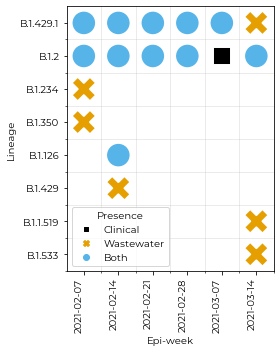

In [70]:
# as dotplot
# set up new dataframe
data = pd.DataFrame()
for w in epi_weeks:
    data = data.append(pd.DataFrame(data={'Epi-week':[w]*len(df_lin_weeks_presence), \
                                          'Lineage':df_lin_weeks_presence.index,\
                                          'Presence':df_lin_weeks_presence[w],\
                                          'Marker':df_lin_weeks_presence[w]}))
data.reset_index(drop=True, inplace=True)
data['Presence'].replace(range(4),[np.nan,'Clinical', 'Wastewater','Both'], inplace=True)
data['Marker'].replace(range(4),['none','top','bottom','full'], inplace=True)
data['Size'] = data.Presence.isna()

# plot
f, ax = plt.subplots(1,1,figsize=(4,5))
sns.scatterplot(data=data, x="Epi-week", y="Lineage", hue='Presence', hue_order=['Clinical', 'Wastewater','Both'],\
                legend=True, ax=ax, s=600, style='Presence')#, size='Size', sizes=(20,400))

# make aesthetic changes
plt.xticks(epi_weeks, rotation=90, ha = 'right');
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.grid(which='minor', alpha=.3)
plt.xlim([epi_weeks[0]-timedelta(3.5), epi_weeks[-1]+timedelta(3.5)])
plt.ylim([7.5, -.5])
locs,labels = plt.yticks()
f.tight_layout()

file = 'fig/3E_freyja_results.svg'
plt.savefig(file)
FileLink(file)

In [71]:
# create matrix of all_lin v. epi_weeks, 0 = neither, 1 = clinical, 2 = wastewater, 3 = both
lin_ww = sorted(list(df_sample_lineage.columns))
lin_cl = sorted([x for x in df_meta.pango_lineage.unique() if (str(x)!='nan' and x!='None')])
all_lin = set(lin_ww) | set(lin_cl)
epi_weeks = [datetime.strptime('2021-02-07', '%Y-%m-%d') + timedelta(weeks=d) for d in range(6)]

# new df_freyja with same # of samples as df_sample_lineage
df_freyja2 = df_freyja.copy().set_index('sample')
df_freyja2 = df_freyja2.drop(list(set(df_freyja['sample']) - set(df_sample_lineage.index)), axis=0)

df_lin_weeks_presence = pd.DataFrame(index=all_lin, columns=epi_weeks, data=0)
for d in epi_weeks:
    for l in all_lin:
        cl = sum((df_meta.Test_day>=d) & (df_meta.Test_day<d+timedelta(weeks=1)) & (df_meta.pango_lineage==l)) > 0
        if l in lin_ww:
            ww = sum((df_freyja2.dates>=d) & (df_freyja2.dates<d+timedelta(weeks=1)) & \
                     list(~df_sample_lineage[l].isna())) > 0
        else:
            ww = 0
        df_lin_weeks_presence[d][l] += 1*cl + 2*ww

df_lin_weeks_presence = df_lin_weeks_presence[(df_lin_weeks_presence.T != 0).any()] # drop all-zero rows
df_lin_weeks_presence.sort_values(by=epi_weeks, axis=0, inplace=True, ascending=False) # sort by presence
#sns.heatmap(df_lin_weeks_presence, cmap=sns.cm.rocket_r)

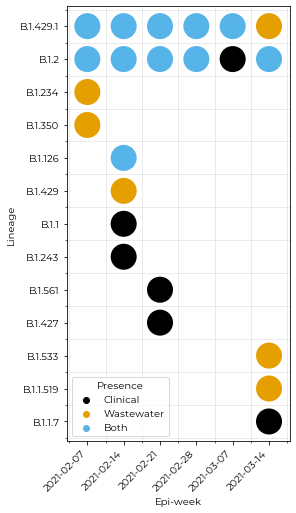

In [72]:
# as dotplot
# set up new dataframe
data = pd.DataFrame()
for w in epi_weeks:
    data = data.append(pd.DataFrame(data={'Epi-week':[w]*len(df_lin_weeks_presence), \
                                          'Lineage':df_lin_weeks_presence.index,\
                                          'Presence':df_lin_weeks_presence[w],\
                                          'Marker':df_lin_weeks_presence[w]}))
data.reset_index(drop=True, inplace=True)
data['Presence'].replace(range(4),[np.nan,'Clinical', 'Wastewater','Both'], inplace=True)
data['Marker'].replace(range(4),['none','top','bottom','full'], inplace=True)
data['Size'] = data.Presence.isna()

# plot
f, ax = plt.subplots(1,1,figsize=(4,8))
sns.scatterplot(data=data, x="Epi-week", y="Lineage", hue='Presence', hue_order=['Clinical', 'Wastewater','Both'],\
                legend=True, ax=ax, s=800)#, size='Size', sizes=(20,400))

# make aesthetic changes
plt.xticks(epi_weeks, rotation=45, ha = 'right');
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.grid(which='minor', alpha=.3)
plt.xlim([epi_weeks[0]-timedelta(4), epi_weeks[-1]+timedelta(4)])

locs,labels = plt.yticks()

# RT-qPCR viral titer analyses / comparisons (fig 5; ap-fig 3)

## Relevant data frames for later sections 

In [81]:
# relevant files: wastewater titers by site by day; code to connect ww sites to residential halls; clinical metadata
df_code = pd.read_csv('1.4.22 CMU Compiled Data - WW to Hall Code.csv').rename(columns={'Buildings/Halls':'halls'})
dict_code = {}
for i in df_code['OLD Wastewater'].unique():
    dict_code[i] = df_code.Wastewater[df_code['OLD Wastewater'] == i].unique()[0]

df_ww = pd.read_csv('1.4.21 CMU Compiled Data - WWxdate_pared down dates.csv')
df_ww.Date = [datetime.strptime(d, "%Y-%m-%d") for d in df_ww.Date]
df_ww = df_ww.rename(columns=dict_code)
df_ww = df_ww.reindex(columns=df_ww.columns[np.argsort([0 if d=='Date' else int(re.findall('\d+',d)[0]) for d in df_ww.columns])])

df_meta = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv', \
                      usecols=['Sequence_ID','Residence_hall','reason_for_testing_(random_or_reflexive)','Test_day'])
df_meta = df_meta.rename(columns={'reason_for_testing_(random_or_reflexive)':'Reason','Collection date':'Date'})
df_meta = df_meta.dropna(subset=['Residence_hall'])
df_meta.Test_day = [datetime.fromisoformat(d) for d in df_meta.Test_day]

df_meta_ww = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
df_meta_ww.date_collect = [datetime.strptime(d, "%m/%d/%Y") for d in df_meta_ww.date_collect]
df_meta_ww.ID_ww = [df_code.Wastewater[df_code['OLD Wastewater'] == c].unique() for c in df_meta_ww.ID_ww]
df_meta_ww.ID_ww = [c[0] if len(c)>0 else pd.NA for c in df_meta_ww.ID_ww]


In [82]:
# lists of relevant weeks, halls, and sites
weeks = [datetime.fromisoformat('2020-09-01') + timedelta(days=7*i) for i in range(35)] # which weeks to check
halls = sorted(df_meta.Residence_hall.unique())
sites = sorted(df_ww.columns)[1:]

# set up array to collect number of cases per week per hall
weeks_cases_halls = np.zeros([len(weeks), len(halls)])
for w in range(len(weeks)): # for each week...
    # pull out number of cases in each hall
    for h in range(len(halls)):
        a = (df_meta[df_meta.Residence_hall == halls[h]].Test_day >= weeks[w]).values*1
        b = (df_meta[df_meta.Residence_hall == halls[h]].Test_day < weeks[w]+timedelta(days=7)).values*1
        weeks_cases_halls[w,h] = sum(a+b==2)

In [83]:
# create data frame that mirrors df_ww, but with weekly case counts for each date & site
pd.options.mode.chained_assignment = None
df_weeklycases = pd.DataFrame(index=df_ww.index, columns=df_ww.columns)
df_weeklycases.Date = df_ww.Date
for ww in range(len(df_ww.columns)-1): # for each wastewater site
    h = [i for i, item in enumerate(halls) \
         if item in set(df_code[df_code.Wastewater == df_ww.columns[ww+1]].halls.values)] # pull out relevant halls
    for i, date in enumerate(df_ww.Date): # for each date
        d = np.where([((date - week).days < 7) & ((date - week).days >= 0) for week in weeks])[0]
        if (len(d)>0) & (len(h)>0):
            df_weeklycases[df_ww.columns[ww+1]].iloc[i] = weeks_cases_halls[d,h].sum()
pd.options.mode.chained_assignment = 'warn'

## Show setup: data collection by site by day (ap-fig 3)

In [84]:
# all surveilled samples
df = pd.DataFrame(columns=['Date','Site','Titer','N'])
for c in df_ww.drop(columns=['Date']).columns:
    df = df.append(df_ww[['Date',c]].dropna().rename(columns={c:'Titer'}))
    df.Site[pd.isna(df.Site)] = c
df.N = [int(re.findall('\d+',f)[0]) for f in df.Site]
df = df.sort_values(by='N')

# all sequenced samples
df2 = df_meta_ww[df_meta_ww.sequenced==True]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/home/jupyter/Viral-Genomics-Lab-private/edit/fig/SUP_wastewater_collection_all_samples.svg

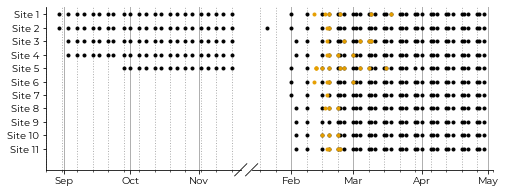

In [85]:
f = plt.figure(figsize=(8,3))
bax = brokenaxes(xlims=((datetime.strptime('2020-08-24','%Y-%m-%d'), datetime.strptime('2020-11-20','%Y-%m-%d')),\
                        (datetime.strptime('2021-01-14','%Y-%m-%d'), datetime.strptime('2021-05-03','%Y-%m-%d')))\
                 , wspace=.05)

bax.plot(df.Date, df.Site, '.')
bax.plot(df2.date_collect, df2.ID_ww, '.','r')
for i in [0,1]:
    bax.axs[i].xaxis.set_minor_locator(WeekdayLocator(byweekday=0, interval=1))
    bax.axs[i].xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=8))
    bax.axs[i].xaxis.set_major_locator(MonthLocator())
    bax.axs[i].xaxis.set_major_formatter(DateFormatter('%b'))
    bax.axs[i].grid(visible=True, which='minor', axis='x', linestyle=':', linewidth=1)
    bax.axs[i].grid(visible=True, which='major', axis='x', linestyle='-', linewidth=1)
bax.axs[0].set_yticks(range(11));
[bax.axs[i].invert_yaxis() for i in [0,1]];

file = 'fig/SUP_wastewater_collection_all_samples.svg'
plt.savefig(file)
FileLink(file)

In [86]:
len(df.Date)

479

## Compare case count & viral titer for each semester / site (fig 5; ap-fig 3)

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/3A_titer_v_cases.svg

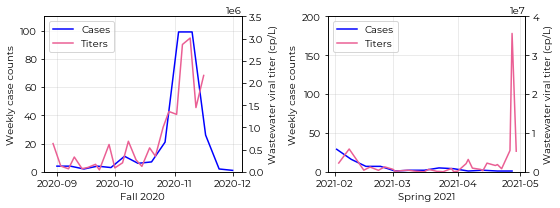

In [87]:
# SUMMARY PLOT

f, ax = plt.subplots(1,2,figsize=(8,3))
ax2 = [a.twinx() for a in ax]

# colors
Ccases = '#0000ff'
Ctiter = '#ea5f94'

# Fall
touse1 = np.where([w > datetime(2020,12,1,0,0) for w in weeks])[0][0]
touse2 = np.where([w > datetime(2021,2,1,0,0) for w in df_ww.Date])[0][0]
a = ax[0].plot(weeks[:touse1], weeks_cases_halls.sum(axis=1)[:touse1], color=Ccases)
b = ax2[0].plot(df_ww.Date[:touse2-2], np.nanmean(df_ww.drop(columns=['Date']),axis=1)[:touse2-2], \
                color=Ctiter)#, ls=':')

ax[0].set_ylim([0,110])
ax2[0].set_ylim([0,3.5e6])
ax[0].legend(a+b,['Cases','Titers'], loc='upper left')

# Spring
touse1 = np.where([w > datetime(2021,2,1,0,0) for w in weeks])[0][0]
touse2 = np.where([(w > datetime(2021,2,1,0,0)) for w in df_ww.Date])[0]
a = ax[1].plot(weeks[touse1:], weeks_cases_halls.sum(axis=1)[touse1:], color=Ccases)
b = ax2[1].plot(df_ww.Date[touse2], np.nanmean(df_ww.drop(columns=['Date']),axis=1)[touse2], \
                color=Ctiter)#, ls=':')

ax[1].set_ylim([0,200])
ax2[1].set_ylim([0,4e7])
ax[1].legend(a+b,['Cases','Titers'], loc='upper left')

# prettify plot
x = ['Fall 2020','Spring 2021']
for i, ax in enumerate(ax):
    ax.set_xlabel(x[i])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.set_ylabel('Weekly case counts')
    ax.grid(alpha=.3)
    ax2[i].set_ylabel('Wastewater viral titer (cp/L)')
f.tight_layout()
plt.savefig('fig/3A_titer_v_cases.svg')
FileLink('fig/3A_titer_v_cases.svg')

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/SUP_fall_wastewater_titers_cases.svg

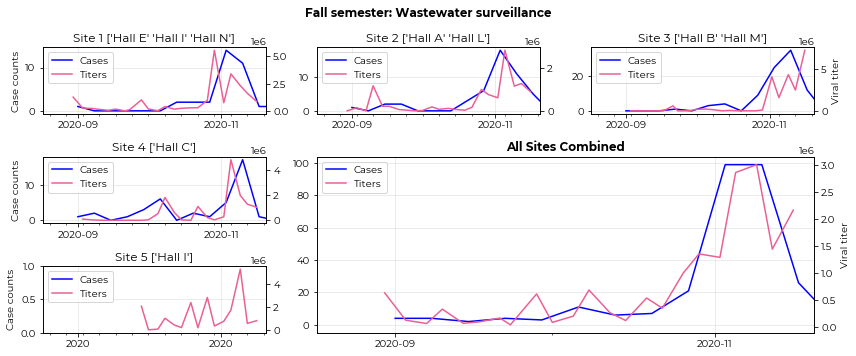

In [88]:
# same plot, but just fall
touse1 = np.where([w > datetime(2020,12,31,0,0) for w in weeks])[0][0]
touse2 = np.where([w > datetime(2020,12,31,0,0) for w in df_ww.Date])[0][0]

# set up special axes
f = plt.figure()
f.set_figheight(5)
f.set_figwidth(12)

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=1)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), colspan=1)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2), colspan=1)
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,0), colspan=1)
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,0), colspan=1)
ax6 = plt.subplot2grid(shape=(3,3), loc=(1,1), colspan=2, rowspan=2)

ax = [ax1, ax2, ax3, ax4, ax5, ax6]
ax2 = [a.twinx() for a in ax]

# colors
Ccases = '#0000ff'
Ctiter = '#ea5f94'

# plot by wastewater site
for ww in range(5): # for each wastewater site
    # plot number of cases per week per halls in wastewater site (NEED TO USE DF_CODE TO DO SO!!!)
    h = [i for i, item in enumerate(halls) if item in set(df_code[df_code.Wastewater == df_ww.columns[ww+1]].halls.values)]
    if (len(h) > 0) & ~(('Hall I' in np.array(halls)[h]) & (len(h) == 1)):
        a = ax[ww].plot(weeks[:touse1], weeks_cases_halls[:touse1,h].sum(axis=1),color=Ccases)
    
    # plot viral titer for wastewater site
    b = ax2[ww].plot(df_ww.Date[:touse2], df_ww[df_ww.columns[ww+1]][:touse2],color=Ctiter)

    # plot descriptions
    ax[ww].set_title(f'{df_ww.columns[ww+1]} {np.array(halls)[h]}')
    
    # major ticks every 2 months; minor ticks every month
    ax[ww].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax[ww].xaxis.set_minor_locator(mdates.DayLocator(interval=7))
    
    ax[ww].set_xlim([datetime(2020,8,17,0,0),datetime(2020,11,20,0,0)])
    ax[ww].grid(alpha=.3)
    ax[ww].legend(a+b,['Cases','Titers'], loc='upper left')
    
# plot a compilation of all wastewater sites
a=ax[5].plot(weeks[:touse1], weeks_cases_halls.sum(axis=1)[:touse1], color=Ccases)
b=ax2[5].plot(df_ww.Date[:touse2], np.nanmean(df_ww.drop(columns=['Date']),axis=1)[:touse2], color=Ctiter)
ax[5].set_title('All Sites Combined', fontweight='bold')
ax[5].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax[5].xaxis.set_minor_locator(mdates.MonthLocator())
ax[5].set_xlim([datetime(2020,8,17,0,0),datetime(2020,11,20,0,0)])
ax[5].grid(alpha=.3)
ax[5].legend(a+b,['Cases','Titers'], loc='upper left')

# y axis labels
ax[0].set_ylabel('Case counts')
ax[3].set_ylabel('Case counts')
ax[4].set_ylabel('Case counts')

ax2[2].set_ylabel('Viral titer')
ax2[5].set_ylabel('Viral titer');

f.suptitle('Fall semester: Wastewater surveillance', fontweight='bold')
f.tight_layout()

file = 'fig/SUP_fall_wastewater_titers_cases.svg'
plt.savefig(file)
FileLink(file)


/home/jupyter/Viral-Genomics-Lab-private/edit/fig/SUP_spring_wastewater_titers_cases.svg

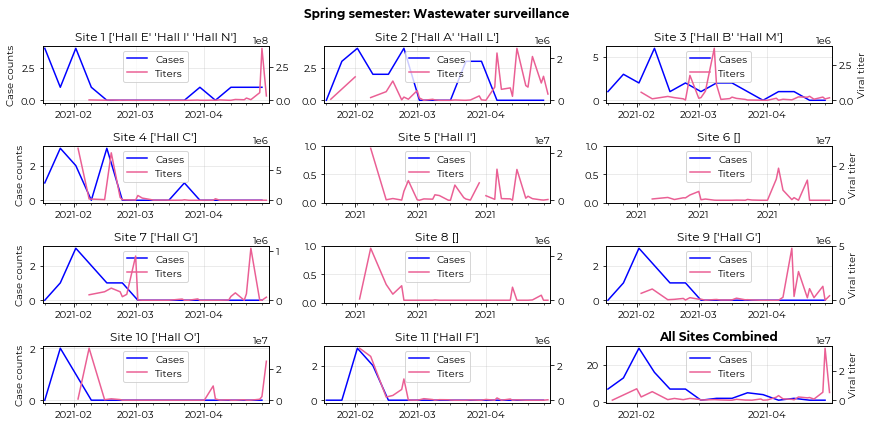

In [89]:
# same plot, but just spring

touse1 = np.where([w > datetime(2021,1,18,0,0) for w in weeks])[0][0]
touse2 = np.where([w > datetime(2021,1,18,0,0) for w in df_ww.Date])[0]

# colors
Ccases = '#0000ff'
Ctiter = '#ea5f94'

# plot by wastewater site
f, ax = plt.subplots(4,3,figsize=(12,6))
ax = ax.flatten()
ax2 = [a.twinx() for a in ax]
for ww in range(len(df_ww.columns)-1): # for each wastewater site
    # plot number of cases per week per halls in wastewater site (NEED TO USE DF_CODE TO DO SO!!!)
    h = [i for i, item in enumerate(halls) if item in set(df_code[df_code.Wastewater == df_ww.columns[ww+1]].halls.values)]
    if (len(h) > 0) & ~(('Hall I' in np.array(halls)[h]) & (len(h) == 1)):
        a=ax[ww].plot(weeks[touse1:], weeks_cases_halls[touse1:,h].sum(axis=1), color=Ccases)
    
    # plot viral titer for wastewater site
    b=ax2[ww].plot(df_ww.Date[touse2], df_ww[df_ww.columns[ww+1]][touse2], color=Ctiter)
    ax2[ww].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    # plot descriptions
    ax[ww].set_title(f'{df_ww.columns[ww+1]} {np.array(halls)[h]}')
    
    # major ticks every 2 months; minor ticks every month
    ax[ww].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[ww].xaxis.set_minor_locator(mdates.DayLocator(interval=7))
    
    ax[ww].set_xlim([datetime(2021,1,18,0,0),datetime(2021,4,30,0,0)])
    ax[ww].grid(alpha=.3)
    ax[ww].legend(a+b,['Cases','Titers'], loc='upper center')
    
# plot a compilation of all wastewater sites
ax[11].plot(weeks[touse1:], weeks_cases_halls.sum(axis=1)[touse1:], color=Ccases)
ax2[11].plot(df_ww.Date[touse2], np.nanmean(df_ww.drop(columns=['Date']),axis=1)[touse2], color=Ctiter)
ax[11].set_title('All Sites Combined', fontweight='bold')
ax[11].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax[11].xaxis.set_minor_locator(mdates.MonthLocator())

ax[11].set_xlim([datetime(2021,1,18,0,0),datetime(2021,4,30,0,0)])
ax[11].grid(alpha=.3)
ax[11].legend(a+b,['Cases','Titers'], loc='upper center')


# y axis labels
[ax[i].set_ylabel('Case counts') for i in [0,3,6,9]]
[ax2[i].set_ylabel('Viral titer') for i in [2,5,8,11]]

f.suptitle('Spring semester: Wastewater surveillance', fontweight='bold')
f.tight_layout()

file = 'fig/SUP_spring_wastewater_titers_cases.svg'
plt.savefig(file)
FileLink(file)

## Correlation heatmap, correlation box & whisker, Spearman (fig 5)

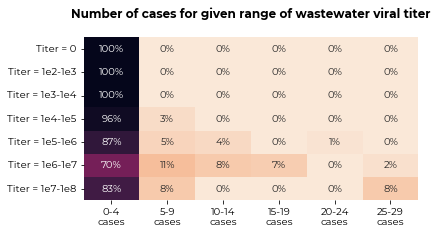

In [90]:
# likelihood of case count based on wastewater viral titer...

to_drop = ['Date','Site 5']

# isolation dorm (total case count = # of students who tested positive 1-10 days before a wastewater sample)
cases = df_meta.reset_index().rename(columns={'index':'x'}).groupby('Test_day').count().x
isolation_count = [cases[((d-cases.index).days <= 10 ) & ((d-cases.index).days > 0)].sum() for d in df_ww.Date]

cases = np.array(list(df_weeklycases.drop(columns=to_drop).fillna(0).values.flatten()) +\
                 list(np.array(isolation_count)))
titer = np.array(list(df_ww.drop(columns=to_drop).values.flatten()) + list(df_ww['Site 5']))
#cases = np.array(df_weeklycases.drop(columns=to_drop).fillna(0).values.flatten())
#titer = np.array(df_ww.drop(columns=to_drop).values.flatten())

gap = 5
case_groups = np.arange(0,6)*gap

heatmap = np.zeros((7,len(case_groups)))

# for viral titer = 0
to_use = (titer == 0)
#print(sum(to_use==1))
heatmap[0,:] = ([((cases[to_use] >= c) & (cases[to_use] < c+gap)).sum() for c in case_groups])

# for each order of magnitude of viral titer, collect # of cases that fall into groups of 10
range_to_test = np.arange(2,8)
for n in range_to_test:
    to_use = (titer >= np.power(10,n)) & (titer < np.power(10,n+1))
    #print(sum(to_use==1))
    heatmap[n-1,:] = [((cases[to_use] >= c) & (cases[to_use] < c+gap)).sum() for c in case_groups]
heatmap = np.array([heatmap[i,:]*100/heatmap[i,:].sum() for i in range(len(heatmap))])

#f = plt.figure(figsize=(24,6))
f = plt.figure(figsize=(6,3))
names = [[str(int(heatmap[i,j]))+'%' for j in range(heatmap.shape[1])] for i in range(heatmap.shape[0])]
ax = sns.heatmap(heatmap, xticklabels=[f'{i}-{i+gap-1}\ncases' for i in case_groups], \
                 yticklabels=['Titer = 0']+[f'Titer = 1e{i}-1e{i+1}' for i in range_to_test], \
                 cmap=sns.color_palette('rocket_r',n_colors=100), annot=names, fmt = '', cbar=False);
ax.set_title('Number of cases for given range of wastewater viral titer\n', fontweight='bold');


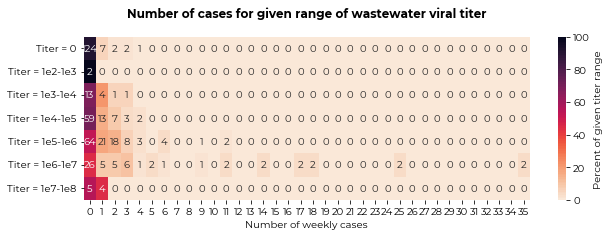

In [91]:
# likelihood of case count based on wastewater viral titer...

to_drop = ['Date','Site 5']

cases = np.array(df_weeklycases.drop(columns=to_drop).fillna(0).values.flatten())
titer = np.array(df_ww.drop(columns=to_drop).values.flatten())

gap = 1
case_groups = np.arange(0,36)*gap

heatmap = np.zeros((7,len(case_groups)))

# for viral titer = 0
to_use = (titer == 0)
#print(sum(to_use==1))
heatmap[0,:] = ([((cases[to_use] >= c) & (cases[to_use] < c+gap)).sum() for c in case_groups])

# for each order of magnitude of viral titer, collect # of cases that fall into groups of 10
range_to_test = np.arange(2,8)
for n in range_to_test:
    to_use = (titer >= np.power(10,n)) & (titer < np.power(10,n+1))
    #print(sum(to_use==1))
    heatmap[n-1,:] = [((cases[to_use] >= c) & (cases[to_use] < c+gap)).sum() for c in case_groups]
heatmap_percent = np.array([heatmap[i,:]*100/heatmap[i,:].sum() for i in range(len(heatmap))])

#f = plt.figure(figsize=(24,6))
f = plt.figure(figsize=(10,3))
#names = [[str(int(heatmap_percent[i,j])) for j in range(heatmap.shape[1])] for i in range(heatmap.shape[0])]
names = [[str(int(heatmap[i,j])) for j in range(heatmap.shape[1])] for i in range(heatmap.shape[0])]
ax = sns.heatmap(heatmap_percent, xticklabels=[f'{i}' for i in case_groups], \
                 yticklabels=['Titer = 0']+[f'Titer = 1e{i}-1e{i+1}' for i in range_to_test], \
                 cmap=sns.color_palette('rocket_r',n_colors=100), annot=names, fmt = '', cbar=True, \
                 cbar_kws={'label': 'Percent of given titer range'});
ax.set_title('Number of cases for given range of wastewater viral titer\n', fontweight='bold');
ax.set_xlabel('Number of weekly cases');

In [93]:
# data frame that has cases, titers, and log cases (-1 if 0 cases)
to_drop = ['Date','Site 5']
cases = np.array(df_weeklycases.drop(columns=to_drop).fillna(0).values.flatten())
titer = np.array(df_ww.drop(columns=to_drop).values.flatten())

df_new = pd.DataFrame({'Cases':cases,'Titer':titer,\
                       'Log_Cases':np.log2(cases, out=np.zeros_like(cases)-1, where=(cases!=0))})
df_new = df_new.dropna().reset_index(drop=True)
df_new['Log_Cases_Floored'] = [np.floor(a) for a in df_new.Log_Cases]
df_new = df_new.astype({'Cases': 'int32'})

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/4B_summary_cases_V_titer.svg

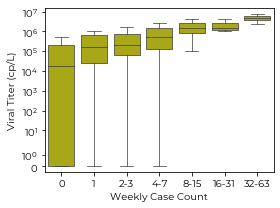

In [94]:
# final plot
f,ax = plt.subplots(1,1,figsize=(4,3))
sns.boxplot(x=df_new['Log_Cases_Floored'], y=df_new['Titer'], fliersize=0, color='y', linewidth=.7)

ax.set_yscale('symlog')
ax.set_ylim([-.5,1.5e7])
ax.set_ylabel('Viral Titer (cp/L)')
ax.set_xlabel('Weekly Case Count')
xticks = ['0','1'] + [str(2**(a+1))+'-'+str(2**(a+2)-1) for a in range(len(df_new.Log_Cases_Floored.unique())-2)]
#xticks = ['0','1'] + [str(2**(a+1))+'+' for a in range(len(df_new.Log_Cases_Floored.unique())-2)]
ax.set_xticklabels(xticks, rotation=0);

f.tight_layout()

file = 'fig/4B_summary_cases_V_titer.svg'
plt.savefig(file)
FileLink(file)

In [97]:
stats.spearmanr(cases, titer, nan_policy='omit')

SpearmanrResult(correlation=0.39884976728009247, pvalue=6.906041724457369e-18)

## Fisher test to see if cases & titer rise together

In [100]:
def fisher_cases_titer(df_weeklycases, df_ww, nweeks=30, start=datetime.strptime('2020-08-30','%Y-%m-%d'),\
                      ww_sites=list(set(np.arange(1,12))-set([5,6,8]))):
    # establish empty data frames in which to input weekly case counts & weekly average viral titer
    df_cases_byweek = pd.DataFrame(index=[start+timedelta(days=7*i) \
                                          for i in range(nweeks)], columns=['Site '+str(w) for w in ww_sites])
    df_titer_byweek = df_cases_byweek.copy()

    # input weekly case counts & average viral titer
    for t in df_cases_byweek.index: # for each day (i.e. start of week)
        for hall in df_cases_byweek.columns: # for each hall
            df_cases_byweek[hall].loc[t] = np.nansum(df_weeklycases[hall][(df_weeklycases.Date>=t) \
                                                                     & (df_weeklycases.Date<t+timedelta(days=7))])
            df_titer_byweek[hall].loc[t] = np.nanmean(df_ww[hall][(df_ww.Date>=t) & (df_ww.Date<t+timedelta(days=7))])

    # for each interval between two weeks, put the increase/decrease value, Nan if at least 1 Nan value
    vals_cases = np.zeros((nweeks-1)*len(df_cases_byweek.columns))
    vals_titer = np.zeros((nweeks-1)*len(df_cases_byweek.columns))
    for i,hall in enumerate(df_cases_byweek.columns):
        vals_cases[np.arange((nweeks-1)*i,(nweeks-1)*(i+1))] = [df_cases_byweek[hall][t]-df_cases_byweek[hall][t+1] \
                                                                for t in range(nweeks-1)]
        vals_titer[np.arange((nweeks-1)*i,(nweeks-1)*(i+1))] = [df_titer_byweek[hall][t]-df_titer_byweek[hall][t+1] \
                                                                for t in range(nweeks-1)]

    # remove any locations that are nan for either set (only nans in vals_titer)
    vals_cases = vals_cases[~np.isnan(vals_titer)]
    vals_titer = vals_titer[~np.isnan(vals_titer)]
    # remove any locations that are 0 for either set (only zeros in vals_cases)
    vals_titer = vals_titer[vals_cases!=0]
    vals_cases = vals_cases[vals_cases!=0]

    # represent decreases as -1, and increases as +1
    vals_cases = [1 if v>0 else -1 for v in vals_cases]
    vals_titer = [1 if v>0 else -1 for v in vals_titer]

    # create 2x2 table and conduct fisher's exact test
    data = [[0,0],[0,0]]
    for i in range(len(vals_cases)):
        if (vals_cases[i]==-1) & (vals_titer[i]==-1):
            data[0][0]+=1
        elif (vals_cases[i]==-1) & (vals_titer[i]==1):
            data[0][1]+=1
        elif (vals_cases[i]==1) & (vals_titer[i]==-1):
            data[1][0]+=1
        elif (vals_cases[i]==1) & (vals_titer[i]==1):
            data[1][1]+=1
    
    return data, stats.fisher_exact(data)

In [101]:
# run for all weeks -- including April!!
nweeks = 60
start = datetime.strptime('2020-08-30','%Y-%m-%d')
tmp = fisher_cases_titer(df_weeklycases, df_ww, nweeks, start)
print('All data points', tmp)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


All data points ([[22, 13], [16, 26]], (2.75, 0.040247177797657664))


# Cts for clinical v. Cts for wastewater (ap-fig 10)

## clinical v. wastewater (ap-fig 10)

In [102]:
df = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
CT_clinical = df.dropna(subset=['GenBank_accession']).sample_Ct
df = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
CT_wastewater = df.Ct.dropna()

/home/jupyter/Viral-Genomics-Lab-private/edit/fig/SUP_CT_clinical_V_wastewater.svg

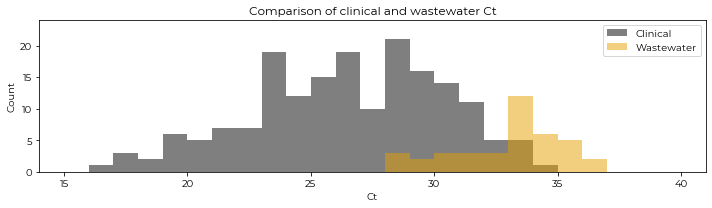

In [103]:
plt.figure(figsize=(10,3))
plt.hist(CT_clinical, alpha=.5, bins=range(40), label='Clinical')
plt.hist(CT_wastewater, alpha=.5, bins=range(40), label='Wastewater')
plt.legend()
plt.xlabel('Ct')
plt.ylabel('Count')
plt.ylim([0,24])
plt.xlim([14,41])
plt.title('Comparison of clinical and wastewater Ct')
plt.tight_layout()

stats.ranksums(CT_clinical, CT_wastewater)

file = 'fig/SUP_CT_clinical_V_wastewater.svg'
plt.savefig(file)
FileLink(file)

In [104]:
df = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df.columns

Index(['barcode', 'Sequence_ID', 'test', 'Mavily', 'Sports_team',
       'Additional_Sports_team', 'Lives_on_campus', 'Residence_hall', 'Sex',
       'Class_Year', 'Year', 'has_duplicate_record',
       'Known_source_of_exposure', 'reason_for_testing_(random_or_reflexive)',
       'Returned to Campus', 'Practice Started', 'Test Date', 'Symptom Onset',
       'Travel', 'Employed?', 'Faculty_or_Staff?',
       'tested_days_after_symptoms', 'pango_lineage_OLD', 'pango_lineage',
       'sample_Ct', 'assembly_fasta', 'assembly_length', 'GenBank_accession',
       'Test_day', 'Test_day_of_week'],
      dtype='object')

## genome coverage v. Ct

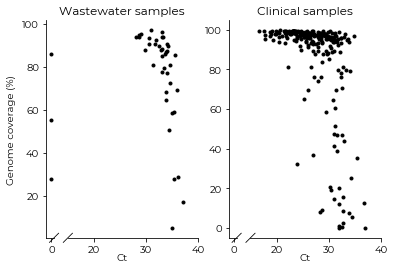

In [105]:
sps = GridSpec(1,2)

# plot genome coverage v. Ct for wastewater
df = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
bax1 = brokenaxes(xlims=((-1,.5),(15,40)), hspace=.05, subplot_spec=sps[0])
bax1.plot(df.Ct, df.coverage_percent*100, '.')
bax1.set_title('Wastewater samples')
bax1.set_ylabel('Genome coverage (%)')

# plot genome coverage v. Ct for clinical
df = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
bax2 = brokenaxes(xlims=((-1,.5),(15,40)), hspace=.05, subplot_spec=sps[1])
TOTAL_BP = 29903
bax2.plot(df.sample_Ct, df.assembly_length/TOTAL_BP*100, '.')
bax2.set_title('Clinical samples')

[bax.set_xlabel('Ct') for bax in [bax1, bax2]];

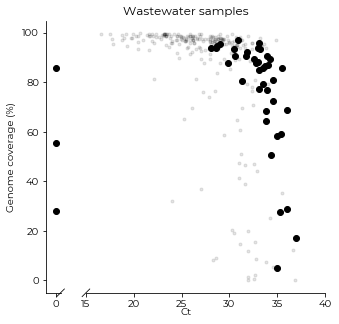

In [106]:
f = plt.figure(figsize=(5,5))

# plot genome coverage v. Ct for clinical
df = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
bax1 = brokenaxes(xlims=((-1,.5),(15,40)), hspace=.05)
TOTAL_BP = 29903
bax1.plot(df.sample_Ct, df.assembly_length/TOTAL_BP*100, 'k.', alpha=.1)
bax1.set_title('Clinical samples')

# plot genome coverage v. Ct for wastewater
df = pd.read_csv('CMU all wastewater - Real Summary (5).csv')
bax1.plot(df.Ct, df.coverage_percent*100, 'o')
bax1.set_title('Wastewater samples')
bax1.set_ylabel('Genome coverage (%)')
bax1.set_xlabel('Ct');

# add 95% genome coverage shading (submission threshold)

# Genomic distance v. Contact tracing (ap-fig 2)

In [107]:
df_meta = pd.read_csv('CMU_Broad Metadata Sharing - Metadata_all_cases_2020_2021.csv')
df_meta.Test_day = [datetime.strptime(date, '%Y-%m-%d') for date in df_meta.Test_day]
df_meta['CMU_ID'] = [re.findall(r'\d+',s)[0] if type(s)!=float else pd.NA for s in df_meta.Sequence_ID]

## Pull and clean contact list

In [117]:
# contact list
df_contact = pd.read_csv('Broad data - positives with contacts - DEIDENTIFIED.csv')
df_contact = df_contact.rename(columns={'Unnamed: 1': 'contacts'}).drop(columns='Unnamed: 2')

# Number of contacts (separate by spaces, pull out number in 0th position)
df_contact['tmp'] = [df_contact.contacts[i].split() for i in range(len(df_contact))]
df_contact['N'] = [df_contact.tmp[i][0] for i in range(len(df_contact))]

# Number of positives (separate by spaces, pull out number in 2nd position)
df_contact['P'] = [x[2] if len(x)>2 else '0' for x in df_contact.tmp]

# There are three rows where there is a '-' that messes up the above logic, so fixing that...
df_contact.at[df_contact.P=='-','P'] = [t[3] for t in df_contact[df_contact.P=='-'].tmp]

# List of positives (find that which is within parentheses & turn into array)
df_contact['IDs'] = [s[s.find("(")+1:s.find(")")].split(', ') if '(' in s else pd.NA for s in df_contact.contacts]

# Cast N and P to integer
df_contact = df_contact.astype({'N': 'int32', 'P': 'int32'})

df_contact.head(3)

,barcode,contacts,tmp,N,P,IDs
0,PBGL3ARPP,0 Contacts,"[0, Contacts]",0,0,<NA>
1,PBCTRAG3D,0 Contacts,"[0, Contacts]",0,0,<NA>
2,PBVQ83QV8,0 Contacts,"[0, Contacts]",0,0,<NA>


In [118]:
# are there barcodes that appear to be mis-typed?
mistyped = set()
for i,j in enumerate(df_contact[df_contact.P!=0].IDs):
    for ID in j:
        if ID not in list(df_meta.barcode):
            mistyped.add(ID)
mistyped = list(mistyped)
print('There are',len(mistyped),'mistyped samples')
print('Fixing...')

# find most similar barcode to the mistyped barcode...
dict_real_IDs = {}
for ID in mistyped:
    dict_real_IDs[ID] = df_meta.barcode[np.argmax([SequenceMatcher(None,ID,b).ratio() for b in df_meta.barcode])]
#dict_real_IDs
for i,j in enumerate(df_contact[df_contact.P!=0].IDs):
    for k,ID in enumerate(j):
        if ID not in list(df_meta.barcode):
            df_contact[df_contact.P!=0].IDs.iloc[i][k]=dict_real_IDs[ID]
            
# are there barcodes that appear to be mis-typed?
mistyped2 = set()
for i,j in enumerate(df_contact[df_contact.P!=0].IDs):
    for ID in j:
        if ID not in list(df_meta.barcode):
            mistyped2.add(ID)
print('There are',len(mistyped2),'mistyped samples')

There are 31 mistyped samples
Fixing...
There are 0 mistyped samples


In [119]:
df_contact = df_contact.drop(['tmp'], axis=1)
file = 'Broad data - positives with contacts - DEIDENTIFIED_corrected.csv'
df_contact.to_csv(file)
FileLink(file)

/home/jupyter/Viral-Genomics-Lab-private/edit/Broad data - positives with contacts - DEIDENTIFIED_corrected.csv

In [120]:
# let's limit contact list to time frame: Fall 2020 (August 17–November 20) and Spring 2021 (January 18–April 30)
df_contact['date'] = [df_meta[df_meta.barcode==df_contact.barcode[s]].Test_day.values for s in range(len(df_contact))]
df_contact = df_contact.drop(np.where(df_contact.date<np.datetime64('2020-08-17'))[0]).reset_index(drop=True)
df_contact = df_contact.drop(np.where(df_contact.date>np.datetime64('2021-04-30'))[0]).reset_index(drop=True)
df_contact = df_contact.drop(np.where(np.array(df_contact.date>np.datetime64('2020-11-20'))*1 + \
                                      np.array(df_contact.date<np.datetime64('2021-01-18'))*1 == 2\
                                     )[0]).reset_index(drop=True)

In [122]:
df_contact.head(3)

,barcode,contacts,N,P,IDs,date
0,PBLV1TDS4,5 contacts; 0 positives,5,0,<NA>,[2020-08-26T00:00:00.000000000]
1,PBG3S6JCG,3 contacts; 0 positives,3,0,<NA>,[2020-08-27T00:00:00.000000000]
2,PBJLCH1R2,3 contacts; 0 positives,3,0,<NA>,[2020-08-28T00:00:00.000000000]


## Contact list basic stats

In [123]:
print(df_contact.N.mean(), df_contact.P.mean())
print(df_contact.N[df_contact.N!=0].mean(), df_contact.P[df_contact.N!=0].mean())
print(df_contact.N.max(), df_contact.P.max())
print(df_contact.N.median(), df_contact.P.median())

1.9424977538185086 0.49595687331536387
3.0027777777777778 0.7666666666666667
24 9
1.0 0.0


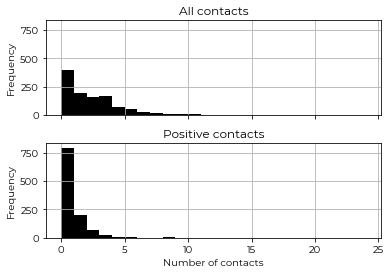

In [124]:
ax = df_contact.hist(column=['N','P'], sharex=True, sharey=True, bins=range(25), layout=(2,1))
ax[0][0].set_title('All contacts')
ax[1][0].set_title('Positive contacts')
[ax[i][0].set_ylabel('Frequency') for i in range(2)]
ax[1][0].set_xlabel('Number of contacts');

In [125]:
print('# of individuals in list', len(df_contact))
print('# of individuals who reported close contacts:',sum(df_contact.N > 0))
print('This is %: ', sum(df_contact.N > 0)/len(df_contact))
print('# of individuals who reported *positive* close contacts',sum(df_contact.P > 0))

# of individuals in list 1113
# of individuals who reported close contacts: 720
This is %:  0.6469002695417789
# of individuals who reported *positive* close contacts 319


## Pull and clean genomic distance

In [126]:
df_SNPdist_list = pd.read_csv('all_CMU_seq_dists.tsv', sep='\t', names=['seq1','seq2','dist'])
df_SNPdist_list.head(2)

,seq1,seq2,dist
0,NC_045512.2,CO_CMU_00004,23
1,NC_045512.2,CO_CMU_00007,25


In [127]:
# put into matrix format

# pull out all sequence names
seqs = list(set(df_SNPdist_list.seq1.unique()) | set(df_SNPdist_list.seq2.unique()))

# set up new dataframe
df_SNPdist = pd.DataFrame(columns=seqs, index=seqs)
for i in range(len(df_SNPdist_list)):
    df_SNPdist.at[df_SNPdist_list.seq1[i], df_SNPdist_list.seq2[i]] = df_SNPdist_list.dist[i]
    df_SNPdist.at[df_SNPdist_list.seq2[i], df_SNPdist_list.seq1[i]] = df_SNPdist_list.dist[i]

# rename NC_045512.2 to 'ref', and rename all CMU sequences to barcode
# use metadata to switch from 5-number code to barcode
names = ['ref' if s=='NC_045512.2' else re.findall(r'\d+',s)[0] for s in df_SNPdist.columns] # 5-number code
tocheck = list(df_meta.CMU_ID.dropna())
names = [df_meta.barcode[df_meta.CMU_ID==s].values[0] if s in tocheck else s for s in names] #nb=no barcode

df_SNPdist.columns = names
df_SNPdist.index = names

# drop columns and rows that don't have a barcode (these were improperly included)
todrop = np.array(names)[np.where([len(n)==5 for n in names])[0]]
df_SNPdist = df_SNPdist.drop(todrop, axis=0).drop(todrop,axis=1)

In [128]:
df_SNPdist.head(2)

,PBK3TNUB9,PB9TMJFG4,PBRWDH6EV,PBKLDG5NM,PBMU7S335,PBV5QLQ41,PBWC55NBC,PBSVN64H7,PBF7R11Q4,PBB8PNJDF,...,PBCVJCMW2,PBWQG496D,PB5TT98DM,PBQA2Q4Q1,PB92GTM6E,PB7RRA67N,PBRGFMCRL,PBT9RSCC2,PBE7VSG42,PBR9F5H13
PBK3TNUB9,NaN,19,24,34,6,13,20,12,6,12,...,18,29,2,18,9,16,18,16,18,34
PB9TMJFG4,19,NaN,29,41,5,20,27,19,9,18,...,25,37,2,3,9,18,25,20,7,42


## What % of SNP distance = x are present in contact tracing? (ap-fig 2)

In [130]:
# pull out pairs for each snp distance, and have in dictionary (key is the distance)
dict_dist = dict()
dists_all_pairs = np.zeros(80)
for i in range(len(df_SNPdist)): # iterate through all pairs above the diagonal of the matrix
    for j in range(i+1,len(df_SNPdist)):
        # pull out the barcodes being compared, and the distance between them
        I, J = df_SNPdist.columns[i], df_SNPdist.columns[j]
        dist, pair = df_SNPdist[I][J], I+','+J 
        # add dist to dists_all_pairs
        dists_all_pairs[dist] += 1
        # if the key for that distance already exists, append new pair to it
        if dist in dict_dist.keys():
            dict_dist[dist].append(pair)
        # if key for that distance doesn't exist, make new key
        else:
            dict_dist[dist] = [pair]

In [138]:
# pull out all positives that have other positive contacts & who are themselves sequenced
tmp = df_contact.dropna(subset=['IDs'])
todrop = []
[todrop.append(b) for b in tmp.barcode if b not in df_SNPdist.columns];
tmp.index = tmp.barcode
tmp = tmp.drop(todrop, axis=0)

# run through all positives, and see the genomic distance of relevant pairs (available via genomic sequencing)
dists = np.zeros(80)
pairs = []
print('Printing out close-contact pairs that have distance >10 SNVs...')
for i in tmp.index: # positive
    for j in tmp.IDs[i]: # positive contacts
        if j in df_SNPdist.columns: # positive, sequenced contacts
            if j+i not in pairs:
                dists[df_SNPdist[i][j]] += 1
            pairs.append(i+j)
            # pop out any large-distance pairs
            if df_SNPdist[i][j] > 10:
                print(i,j, df_SNPdist[i][j])

Printing out close-contact pairs that have distance >10 SNVs...
PBKQ8WNVN PB9KLKALQ 44
PB6EV7CEV PB9KLKALQ 44


In [139]:
print('Note that of the above 3 individuals, their test dates & lineages are:')
print('PB9KLKALQ: 2/02/21 - B.1.429.1')
print('PBKQ8WNVN: 1/27/21 - B.1.2')
print('PB6EV7CEV: 1/28/21 - B.1.2')

Note that of the above 3 individuals, their test dates & lineages are:
PB9KLKALQ: 2/02/21 - B.1.429.1
PBKQ8WNVN: 1/27/21 - B.1.2
PB6EV7CEV: 1/28/21 - B.1.2


In [133]:
display(tmp.loc[['PBKQ8WNVN','PB6EV7CEV']])
display(df_contact[df_contact.barcode=='PB7TPL7UG'])
display(df_contact[df_contact.barcode=='PB9KLKALQ'])

,barcode,contacts,N,P,IDs,date
barcode,,,,,,
PBKQ8WNVN,PBKQ8WNVN,"3 contacts; 2 positives (PB7TPL7UG, PB9KLKALQ)",3,2,"[PB7TPL7UG, PB9KLKALQ]",[2021-01-27T00:00:00.000000000]
PB6EV7CEV,PB6EV7CEV,"3 contacts; 2 positives (PB7TPL7UG, PB9KLKALQ)",3,2,"[PB7TPL7UG, PB9KLKALQ]",[2021-01-28T00:00:00.000000000]


,barcode,contacts,N,P,IDs,date
896,PB7TPL7UG,1 contact; 0 positive,1,0,<NA>,[2021-01-28T00:00:00.000000000]


,barcode,contacts,N,P,IDs,date
925,PB9KLKALQ,0 contacts,0,0,<NA>,[2021-02-02T00:00:00.000000000]


In [134]:
print(f'There are only {int(sum(dists))} pairs where both were sequenced & pair is present in contact tracing.')
print(f'Of these, {int(len(pairs)-sum(dists))} pairs both identified the other individual.')

There are only 29 pairs where both were sequenced & pair is present in contact tracing.
Of these, 11 pairs both identified the other individual.


/home/jupyter/Viral-Genomics-Lab-private/edit/fig/SUP_contact_tracing_pairs.svg

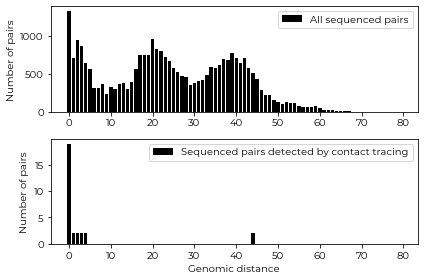

In [135]:
f,ax = plt.subplots(2,1)
ax[0].bar(range(len(dists_all_pairs)), dists_all_pairs, label='All sequenced pairs')
ax[1].bar(range(len(dists)), dists, label='Sequenced pairs detected by contact tracing');
ax[1].set_xlabel('Genomic distance')
[ax[i].set_ylabel('Number of pairs') for i in range(2)]
[ax[i].legend() for i in range(2)]

f.tight_layout()

file = 'fig/SUP_contact_tracing_pairs.svg'
plt.savefig(file)
FileLink(file)

In [136]:
n=3
print(f'{(sum(dists[0:3])/sum(dists)*100)}% of contact-tracing pairs had SNV distance < {3}')
print(f'{(dists[0]/sum(dists)*100)}% of contact-tracing pairs had SNV distance == 0')


print(f'{(sum(dists_all_pairs[0:3])/sum(dists_all_pairs)*100)}% of all pairs had SNV distance < {3}')


79.3103448275862% of contact-tracing pairs had SNV distance < 3
65.51724137931035% of contact-tracing pairs had SNV distance == 0
10.418410041841005% of all pairs had SNV distance < 3


## What % of individuals were presumably identified via contact tracing?

In [140]:
df_meta.head(2)

,barcode,Sequence_ID,test,Mavily,Sports_team,Additional_Sports_team,Lives_on_campus,Residence_hall,Sex,Class_Year,...,tested_days_after_symptoms,pango_lineage_OLD,pango_lineage,sample_Ct,assembly_fasta,assembly_length,GenBank_accession,Test_day,Test_day_of_week,CMU_ID
0,PBGL3ARPP,NaN,pcr,NaN,NaN,NaN,No,NaN,F,Year C,...,-,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-27,Monday,<NA>
1,PBCTRAG3D,NaN,pcr,NaN,NaN,NaN,No,NaN,F,Year B,...,-,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28,Tuesday,<NA>


In [141]:
# find all positive individuals who 1) are listed as contact, 2) tested 1-4 days after the first person

# let's make a dictionary that sorts these individuals by how many days after person #1 they tested
dict_pos_lag = {}

# go through each positive person who listed positive contacts...
df_pos = df_contact[df_contact.P!=0].reset_index()
for i in range(len(df_pos)):
    # for each individual listed as a positive contact...
    for j,ID in enumerate(df_pos.IDs[i]):
        # find lag time between the two individuals
        lag = (df_meta[df_meta.barcode==df_pos.barcode[i]].Test_day.iat[0] - df_meta[df_meta.barcode==ID].Test_day.iat[0]).days
        # insert 2nd individual into dictionary
        if lag in dict_pos_lag.keys():
            dict_pos_lag[lag].add(ID)
        else:
            dict_pos_lag[lag] = set([ID])

In [142]:
n = set([])
for key in range(14):
    n = n.union(dict_pos_lag[key])
    print(f'{key} days after: {len(dict_pos_lag[key])} tested positive')
print(f'Total # of unique individuals: {len(n)}')
print(f'Percent of all positive cases: {len(n)/1113*100:.1f}%')

0 days after: 87 tested positive
1 days after: 31 tested positive
2 days after: 29 tested positive
3 days after: 19 tested positive
4 days after: 10 tested positive
5 days after: 10 tested positive
6 days after: 7 tested positive
7 days after: 7 tested positive
8 days after: 1 tested positive
9 days after: 3 tested positive
10 days after: 2 tested positive
11 days after: 1 tested positive
12 days after: 3 tested positive
13 days after: 2 tested positive
Total # of unique individuals: 159
Percent of all positive cases: 14.3%


In [143]:
n = set([])
for key in range(1,8):
    n = n.union(dict_pos_lag[key])
    print(f'{key} days after: {len(dict_pos_lag[key])} tested positive')
print(f'Total # of unique individuals: {len(n)}')
print(f'Percent of all positive cases: {len(n)/1113*100:.1f}%')

# Were these individuals included during our limited Fall & Spring semester testing?
not_in_time_frame = set([])
for x in n:
    date = df_meta.Test_day[df_meta.barcode == x].values[0]
    if date < np.datetime64('2020-08-17'):
        not_in_time_frame = not_in_time_frame.union(x)
    elif date > np.datetime64('2021-04-30'):
        not_in_time_frame = not_in_time_frame.union(x)
    elif date < np.datetime64('2021-01-18'):
        if date > np.datetime64('2020-11-20'):
            not_in_time_frame = not_in_time_frame.union(x)
print(f'Total # of unique individuals, in time frame: {len(n)-len(not_in_time_frame)}')

1 days after: 31 tested positive
2 days after: 29 tested positive
3 days after: 19 tested positive
4 days after: 10 tested positive
5 days after: 10 tested positive
6 days after: 7 tested positive
7 days after: 7 tested positive
Total # of unique individuals: 93
Percent of all positive cases: 8.4%
Total # of unique individuals, in time frame: 93


In [144]:
n = set([])
for key in dict_pos_lag.keys():
    n = n.union(dict_pos_lag[key])
print(f'Total # of unique individuals: {len(n)}')
print(f'Percent of all positive cases: {len(n)/1113*100:.1f}%')

Total # of unique individuals: 304
Percent of all positive cases: 27.3%
